# 数据采集

In [2]:
import praw
import json
import time
from datetime import datetime

# 连接 Reddit API
reddit_read_only = praw.Reddit(
    client_id="QGSd14g9qqmmd06ht8b0Ww",
    client_secret="a4uCvm8JFRgTt25h9hM5dgfg7GgtWw",
    user_agent="CAO Chaofan",
    username="Bruce_Chunkyia",
    password="f87921653"
)

# 保险公司列表
insurance_companies = ["AXA", "Manulife", "Prudential", "AIA", "Sun Life"]

# 保险相关的 Subreddit
subreddits = ["insurance", "insurance_claims", "healthinsurance", "insuretech", "lifeinsurance"]

# 关键词扩展（针对保险行业常见讨论点）
keywords = [
    "insurance", "policy", "claim", "denied claim", "premium", "customer service", 
    "fraud", "scam", "renewal", "hidden fees", "support", "pricing", "coverage"
]

# 存储结果
results = []

# **1. 遍历 subreddit 并基于关键词+公司名搜索**
for subreddit_name in subreddits:
    subreddit = reddit_read_only.subreddit(subreddit_name)
    print(f"Searching in r/{subreddit_name}...")

    for company in insurance_companies:
        for keyword in keywords:
            search_query = f"{company} {keyword}"  # 组合关键词搜索
            print(f"Searching for '{search_query}' in r/{subreddit_name}...")

            try:
                for submission in subreddit.search(search_query, limit=70):  # 每个搜索最多获取 50 条
                    print(f"Title: {submission.title}")
                    print(f"URL: {submission.url}")
                    print(f"Score: {submission.score}")
                    print(f"Number of Comments: {submission.num_comments}")
                    print(f"Created at: {submission.created_utc}")
                    print("-" * 50)

                    # **转换时间戳为可读日期**
                    created_at = datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S')

                    # **存储帖子数据**
                    post_data = {
                        "subreddit": subreddit_name,
                        "company": company,
                        "title": submission.title,
                        "url": submission.url,
                        "score": submission.score,
                        "num_comments": submission.num_comments,
                        "created_utc": created_at,
                        "content": submission.selftext,
                        "comments": []
                    }

                    # **获取评论**
                    submission.comments.replace_more(limit=5)  # 限制展开的评论层数
                    for comment in submission.comments.list():
                        post_data["comments"].append({
                            "author": comment.author.name if comment.author else "[deleted]",
                            "body": comment.body,
                            "score": comment.score
                        })

                    results.append(post_data)
                    time.sleep(1)  # 控制请求频率，避免超时

            except Exception as e:
                print(f"Error occurred while searching '{search_query}': {e}")

# **2. 直接抓取 Subreddit 的热门/新帖子**
for subreddit_name in subreddits:
    subreddit = reddit_read_only.subreddit(subreddit_name)
    print(f"Fetching top posts from r/{subreddit_name}...")

    try:
        for submission in subreddit.top(limit=50):  # 抓取该 subreddit 50 条最热门帖子
            print(f"Title: {submission.title}")
            print(f"URL: {submission.url}")
            print(f"Score: {submission.score}")
            print(f"Number of Comments: {submission.num_comments}")
            print(f"Created at: {submission.created_utc}")
            print("-" * 50)

            created_at = datetime.utcfromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S')

            post_data = {
                "subreddit": subreddit_name,
                "company": "Unknown",  # 由于非关键词搜索，可能无法直接识别保险公司
                "title": submission.title,
                "url": submission.url,
                "score": submission.score,
                "num_comments": submission.num_comments,
                "created_utc": created_at,
                "content": submission.selftext,
                "comments": []
            }

            submission.comments.replace_more(limit=5)
            for comment in submission.comments.list():
                post_data["comments"].append({
                    "author": comment.author.name if comment.author else "[deleted]",
                    "body": comment.body,
                    "score": comment.score
                })

            results.append(post_data)
            time.sleep(1)

    except Exception as e:
        print(f"Error occurred while fetching top posts in r/{subreddit_name}: {e}")

# **3. 保存数据**
with open("reddit_insurance_reviews.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=4, ensure_ascii=False)

print(f"Total posts collected: {len(results)}")
print("Results saved to 'reddit_insurance_reviews.json'.")


Searching in r/insurance...
Searching for 'AXA insurance' in r/insurance...
Title: AXA INSURANCE IS UNETHICAL
URL: https://www.reddit.com/r/Insurance/comments/lffhi2/axa_insurance_is_unethical/
Score: 0
Number of Comments: 10
Created at: 1612801725.0
--------------------------------------------------
Title: Travel Insurance Denied My Claim After Ski Accident – Feeling Cheated
URL: https://www.reddit.com/r/Insurance/comments/1i8whr8/travel_insurance_denied_my_claim_after_ski/
Score: 0
Number of Comments: 5
Created at: 1737728583.0
--------------------------------------------------
Title: Travel Insurance recommendations UK
URL: https://www.reddit.com/r/Insurance/comments/1itv9il/travel_insurance_recommendations_uk/
Score: 0
Number of Comments: 0
Created at: 1740046384.0
--------------------------------------------------
Title: UK dental insurance 
URL: https://www.reddit.com/r/Insurance/comments/1gzwxme/uk_dental_insurance/
Score: 1
Number of Comments: 0
Created at: 1732576241.0
-------

Title: I'm getting shafted for insurance for a new Golf GTI
URL: https://www.reddit.com/r/Insurance/comments/6p9cm3/im_getting_shafted_for_insurance_for_a_new_golf/
Score: 0
Number of Comments: 8
Created at: 1500912437.0
--------------------------------------------------
Title: (UK) Multi-Car Insurance Policies
URL: https://www.reddit.com/r/Insurance/comments/eksgnh/uk_multicar_insurance_policies/
Score: 2
Number of Comments: 0
Created at: 1578307312.0
--------------------------------------------------
Searching for 'AXA claim' in r/insurance...
Title: Travel Insurance Denied My Claim After Ski Accident – Feeling Cheated
URL: https://www.reddit.com/r/Insurance/comments/1i8whr8/travel_insurance_denied_my_claim_after_ski/
Score: 0
Number of Comments: 5
Created at: 1737728583.0
--------------------------------------------------
Title: Travel Insurance recommendations UK
URL: https://www.reddit.com/r/Insurance/comments/1itv9il/travel_insurance_recommendations_uk/
Score: 0
Number of Comment

Title: State Farm denied my diminished value claim - is this legal?
URL: https://www.reddit.com/r/Insurance/comments/1gbcof4/state_farm_denied_my_diminished_value_claim_is/
Score: 0
Number of Comments: 65
Created at: 1729802091.0
--------------------------------------------------
Title: Part 2 of my GF claim got denied because I was there at the time of theft
URL: https://www.reddit.com/r/Insurance/comments/1degl2s/part_2_of_my_gf_claim_got_denied_because_i_was/
Score: 17
Number of Comments: 93
Created at: 1718223886.0
--------------------------------------------------
Title: Landlords' Tree Fell on My motorcycles. Private adjuster is denying claim.
URL: https://www.reddit.com/r/Insurance/comments/17gl4ve/landlords_tree_fell_on_my_motorcycles_private/
Score: 76
Number of Comments: 128
Created at: 1698284252.0
--------------------------------------------------
Title: Roof damage from Hurricane Milton, claim denied - FL. Any adjusters input?
URL: https://www.reddit.com/r/Insurance/commen

Title: I Was told my claim will be denied
URL: https://www.reddit.com/r/Insurance/comments/1aeavkb/i_was_told_my_claim_will_be_denied/
Score: 40
Number of Comments: 63
Created at: 1706574320.0
--------------------------------------------------
Title: Denied Claim Due to Tenant in home
URL: https://www.reddit.com/r/Insurance/comments/1i26obz/denied_claim_due_to_tenant_in_home/
Score: 0
Number of Comments: 14
Created at: 1736972225.0
--------------------------------------------------
Title: Will progressive denied claim
URL: https://www.reddit.com/r/Insurance/comments/1i70db1/will_progressive_denied_claim/
Score: 0
Number of Comments: 13
Created at: 1737512564.0
--------------------------------------------------
Title: USAA Claim for diminished value denied - California
URL: https://www.reddit.com/r/Insurance/comments/1f59d4g/usaa_claim_for_diminished_value_denied_california/
Score: 0
Number of Comments: 36
Created at: 1725060512.0
--------------------------------------------------
Title

Title: Progressive customer service rep just told me that having Auto and Home together with them only saves me money on my Auto premium and has no effect on my Homeowners premium. Can anyone verify that this is true?
URL: https://www.reddit.com/r/Insurance/comments/1hsz8ad/progressive_customer_service_rep_just_told_me/
Score: 0
Number of Comments: 19
Created at: 1735943966.0
--------------------------------------------------
Title: Customer service workers- is anyone feeling incredibly overwhelmed with calls about premium increases?
URL: https://www.reddit.com/r/Insurance/comments/y2ulh2/customer_service_workers_is_anyone_feeling/
Score: 121
Number of Comments: 110
Created at: 1665654745.0
--------------------------------------------------
Title: I work in lender placed insurance for vehicles (customer service, just helping people get it reversed / avoid it etc.) and I had a customer basically try to equate their homeowner's policy that covered "everything in the home, and garage" to 

Title: Anyone worked for Lemonade as a licensed rep or in customer service?
URL: https://www.reddit.com/r/Insurance/comments/zxdjdd/anyone_worked_for_lemonade_as_a_licensed_rep_or/
Score: 6
Number of Comments: 5
Created at: 1672244054.0
--------------------------------------------------
Title: What are some situational questions asked for the sales and customer service agent position in insurance?
URL: https://www.reddit.com/r/Insurance/comments/oe1nnq/what_are_some_situational_questions_asked_for_the/
Score: 1
Number of Comments: 21
Created at: 1625467998.0
--------------------------------------------------
Title: My provider told me I can go through some process with my health insurance to give permission to a family member to handle claims, billing, admin issues etc. with Anthem on my behalf. Anthem customer service said they can't. Does anyone know what my provider is talking about?
URL: https://www.reddit.com/r/Insurance/comments/ypbf2l/my_provider_told_me_i_can_go_through_some_pr

Title: Problem with Blue Shield? Tell customer service you want to file a Grievance.
URL: https://www.reddit.com/r/Insurance/comments/2makfc/problem_with_blue_shield_tell_customer_service/
Score: 12
Number of Comments: 1
Created at: 1415980907.0
--------------------------------------------------
Title: Allstate/National General is undervaluing my totaled car with a bogus “conditional adjustment” 
URL: https://www.reddit.com/r/Insurance/comments/1i2v2dt/allstatenational_general_is_undervaluing_my/
Score: 0
Number of Comments: 24
Created at: 1737050620.0
--------------------------------------------------
Title: I’m so sick of angry callers
URL: https://www.reddit.com/r/Insurance/comments/10s5khl/im_so_sick_of_angry_callers/
Score: 134
Number of Comments: 119
Created at: 1675383306.0
--------------------------------------------------
Title: Auto Insurers Penalize Female Widows!
URL: https://www.reddit.com/r/Insurance/comments/1hy5sot/auto_insurers_penalize_female_widows/
Score: 0
Number o

Title: First Time Insurance Buyer
URL: https://www.reddit.com/r/Insurance/comments/1gzmhbf/first_time_insurance_buyer/
Score: 1
Number of Comments: 1
Created at: 1732551173.0
--------------------------------------------------
Title:  Schedule Modifier in Workers' Compensation Quote – Is a 50% Discount Legitimate?
URL: https://www.reddit.com/r/Insurance/comments/1fkuc79/schedule_modifier_in_workers_compensation_quote/
Score: 2
Number of Comments: 7
Created at: 1726777954.0
--------------------------------------------------
Title: Better to use tree service brought in by insurance co. to do an estimate? 
URL: https://www.reddit.com/r/Insurance/comments/1g606lv/better_to_use_tree_service_brought_in_by/
Score: 1
Number of Comments: 3
Created at: 1729195889.0
--------------------------------------------------
Title: Auto Insurance - Rental car options
URL: https://www.reddit.com/r/Insurance/comments/1bnfm97/auto_insurance_rental_car_options/
Score: 5
Number of Comments: 17
Created at: 17113

Title: Watch out for GetSafe Insurance App or hellogetsafe.com!
URL: https://www.reddit.com/r/Insurance/comments/ldn0jp/watch_out_for_getsafe_insurance_app_or/
Score: 1
Number of Comments: 1
Created at: 1612575877.0
--------------------------------------------------
Title: The young man who shares my house crashed his car and died yesterday, what do I do now(in NY)?
URL: https://www.reddit.com/r/Insurance/comments/7nlsin/the_young_man_who_shares_my_house_crashed_his_car/
Score: 20
Number of Comments: 6
Created at: 1514890906.0
--------------------------------------------------
Title: Product Liability Question
URL: https://www.reddit.com/r/Insurance/comments/5vpkwx/product_liability_question/
Score: 1
Number of Comments: 7
Created at: 1487843585.0
--------------------------------------------------
Title: Globe Life and Accident Insurance any good? Looking for Term Life
URL: https://www.reddit.com/r/Insurance/comments/10u3gn/globe_life_and_accident_insurance_any_good/
Score: 6
Number of

Title: Trip Interruption Manulife [Canada]
URL: https://www.reddit.com/r/Insurance/comments/gutzq6/trip_interruption_manulife_canada/
Score: 0
Number of Comments: 2
Created at: 1591048537.0
--------------------------------------------------
Title: Dental insurance
URL: https://www.reddit.com/r/Insurance/comments/bpk5i0/dental_insurance/
Score: 0
Number of Comments: 0
Created at: 1558051569.0
--------------------------------------------------
Searching for 'Manulife denied claim' in r/insurance...
Title: Insurance asked to provide disposal receipt
URL: https://www.reddit.com/r/Insurance/comments/1iovrb4/insurance_asked_to_provide_disposal_receipt/
Score: 2
Number of Comments: 1
Created at: 1739486500.0
--------------------------------------------------
Title: Allstate denied my claim because their policyholder cannot be reached. Damage was $11,000 to my trailer
URL: https://www.reddit.com/r/Insurance/comments/1gqmjpg/allstate_denied_my_claim_because_their/
Score: 638
Number of Comments:

Title: Claim denied saying laptop broke due to wear and tear. Can I appeal?
URL: https://www.reddit.com/r/Insurance/comments/1g27y50/claim_denied_saying_laptop_broke_due_to_wear_and/
Score: 0
Number of Comments: 41
Created at: 1728761687.0
--------------------------------------------------
Title: Theft claim denied 
URL: https://www.reddit.com/r/Insurance/comments/1hwye4c/theft_claim_denied/
Score: 0
Number of Comments: 24
Created at: 1736378961.0
--------------------------------------------------
Title: What is the point of insurance when I can't use it???? Company denied insurance for filing claim.
URL: https://www.reddit.com/r/Insurance/comments/12dm2h9/what_is_the_point_of_insurance_when_i_cant_use_it/
Score: 55
Number of Comments: 128
Created at: 1680791360.0
--------------------------------------------------
Title: Delivery driver damaged my car, and their insurance denied my claim
URL: https://www.reddit.com/r/Insurance/comments/1hfwk57/delivery_driver_damaged_my_car_and_their/


Title: These home insurance companies denied the most claims
URL: https://www.reddit.com/r/Insurance/comments/1i26bq1/these_home_insurance_companies_denied_the_most/
Score: 0
Number of Comments: 8
Created at: 1736971310.0
--------------------------------------------------
Title: Adjustor Denying Claim Due to Door Dash
URL: https://www.reddit.com/r/Insurance/comments/1gvpo6m/adjustor_denying_claim_due_to_door_dash/
Score: 0
Number of Comments: 16
Created at: 1732109849.0
--------------------------------------------------
Title: State Farm denying claim due to waiting or cooling period and agent miscommunication
URL: https://www.reddit.com/r/Insurance/comments/1isi7rm/state_farm_denying_claim_due_to_waiting_or/
Score: 1
Number of Comments: 3
Created at: 1739899775.0
--------------------------------------------------
Title: Hit By A Shopping Cart - Can Insurance Deny Claim?
URL: https://www.reddit.com/r/Insurance/comments/1g98vc4/hit_by_a_shopping_cart_can_insurance_deny_claim/
Score: 1
N

Title: What to do when adjuster hasn't responded to attempts at communication for a month and claims customer service refuses to give you the name and contact of a manager?
URL: https://www.reddit.com/r/Insurance/comments/1db9rqh/what_to_do_when_adjuster_hasnt_responded_to/
Score: 2
Number of Comments: 20
Created at: 1717872364.0
--------------------------------------------------
Title: Geico Customer Service Is Unreachable ??
URL: https://www.reddit.com/r/Insurance/comments/1bjzirq/geico_customer_service_is_unreachable/
Score: 9
Number of Comments: 29
Created at: 1711000400.0
--------------------------------------------------
Title: Lemonade insurance customer service number??
URL: https://www.reddit.com/r/Insurance/comments/1gafpvo/lemonade_insurance_customer_service_number/
Score: 0
Number of Comments: 4
Created at: 1729703136.0
--------------------------------------------------
Title: Am I crazy, or is this All State quote insanely high? Also - interesting customer service chat w/ 

Title: Rant: I Coin the Term "Studied Incompetence" to Describe the way Customer Service Representatives of my Health Care Insurer Handle Calls.
URL: https://www.reddit.com/r/Insurance/comments/ofxzkh/rant_i_coin_the_term_studied_incompetence_to/
Score: 0
Number of Comments: 3
Created at: 1625711446.0
--------------------------------------------------
Title: how to work through depression while in customer service job
URL: https://www.reddit.com/r/Insurance/comments/ly0vmw/how_to_work_through_depression_while_in_customer/
Score: 1
Number of Comments: 4
Created at: 1614908205.0
--------------------------------------------------
Title: Auto Damage Adjuster jobs WITHOUT Customer Service Surveys?
URL: https://www.reddit.com/r/Insurance/comments/hi0x5i/auto_damage_adjuster_jobs_without_customer/
Score: 2
Number of Comments: 7
Created at: 1593441163.0
--------------------------------------------------
Title: Service to lookup customers current auto insurance policy?
URL: https://www.reddit.c

Title: Progressive app Accident Response function
URL: https://www.reddit.com/r/Insurance/comments/1f992sn/progressive_app_accident_response_function/
Score: 13
Number of Comments: 39
Created at: 1725495802.0
--------------------------------------------------
Title: Rodent damage claim denied 
URL: https://www.reddit.com/r/Insurance/comments/1ghh7s9/rodent_damage_claim_denied/
Score: 0
Number of Comments: 31
Created at: 1730498677.0
--------------------------------------------------
Title: Progressive added my brother to my policy without my consent, what can I do?
URL: https://www.reddit.com/r/Insurance/comments/1hnxkg5/progressive_added_my_brother_to_my_policy_without/
Score: 0
Number of Comments: 20
Created at: 1735359185.0
--------------------------------------------------
Title: Does current Tesla insurance fully cover new Jeep?
URL: https://www.reddit.com/r/Insurance/comments/1ira5b5/does_current_tesla_insurance_fully_cover_new_jeep/
Score: 0
Number of Comments: 10
Created at: 17

Title: Anyone with well funded IUL that works?
URL: https://www.reddit.com/r/Insurance/comments/ugdkyb/anyone_with_well_funded_iul_that_works/
Score: 1
Number of Comments: 6
Created at: 1651451986.0
--------------------------------------------------
Title: Totalled car, settlement includes fake prices from a dealership
URL: https://www.reddit.com/r/Insurance/comments/lsh62j/totalled_car_settlement_includes_fake_prices_from/
Score: 0
Number of Comments: 8
Created at: 1614287884.0
--------------------------------------------------
Title: [22, MO, US] Shopping for car insurance, progressive is significantly lower than any other quote why?
URL: https://www.reddit.com/r/Insurance/comments/fdp10j/22_mo_us_shopping_for_car_insurance_progressive/
Score: 13
Number of Comments: 11
Created at: 1583378542.0
--------------------------------------------------
Title: What are folks experience with pay-by-mile insurance plans?
URL: https://www.reddit.com/r/Insurance/comments/j9wezz/what_are_folks_expe

Title: Insurance Claim Denied - Looking for advice
URL: https://www.reddit.com/r/Insurance/comments/12xvxfn/insurance_claim_denied_looking_for_advice/
Score: 19
Number of Comments: 11
Created at: 1682369353.0
--------------------------------------------------
Title: Short Term Disability (pregnancy related)
URL: https://www.reddit.com/r/Insurance/comments/1559mlv/short_term_disability_pregnancy_related/
Score: 2
Number of Comments: 6
Created at: 1689902945.0
--------------------------------------------------
Title: Need to figure out how to apply for life insurance for myself?
URL: https://www.reddit.com/r/Insurance/comments/127674x/need_to_figure_out_how_to_apply_for_life/
Score: 1
Number of Comments: 7
Created at: 1680227032.0
--------------------------------------------------
Title: Question about upgrading my Term Life Insurance Policy
URL: https://www.reddit.com/r/Insurance/comments/yhr6lq/question_about_upgrading_my_term_life_insurance/
Score: 4
Number of Comments: 11
Created at:

Title: Unique situation: Received two death benefit checks for the policy amount
URL: https://www.reddit.com/r/Insurance/comments/44bcft/unique_situation_received_two_death_benefit/
Score: 2
Number of Comments: 0
Created at: 1454686972.0
--------------------------------------------------
Searching for 'Prudential policy' in r/insurance...
Title: Life insurance Policy 1925
URL: https://www.reddit.com/r/Insurance/comments/1htjw9e/life_insurance_policy_1925/
Score: 2
Number of Comments: 25
Created at: 1736012978.0
--------------------------------------------------
Title: Cash out Ma's life insurance policy and invest it or double down?
URL: https://www.reddit.com/r/Insurance/comments/1iljfrb/cash_out_mas_life_insurance_policy_and_invest_it/
Score: 1
Number of Comments: 3
Created at: 1739120747.0
--------------------------------------------------
Title: LTD Denial- Need Advice :/
URL: https://www.reddit.com/r/Insurance/comments/1i1cizo/ltd_denial_need_advice/
Score: 0
Number of Comments: 2

Title: [NJ, 35y/o] Forgot to mention key health history info in term life application
URL: https://www.reddit.com/r/Insurance/comments/7nnk1l/nj_35yo_forgot_to_mention_key_health_history_info/
Score: 2
Number of Comments: 3
Created at: 1514911476.0
--------------------------------------------------
Title: Insurance + Investment, in one policy. Is it a common product nowadays? What is the risk on applying it? (Indonesian Insurance)
URL: https://www.reddit.com/r/Insurance/comments/6n1b6j/insurance_investment_in_one_policy_is_it_a_common/
Score: 3
Number of Comments: 4
Created at: 1499949156.0
--------------------------------------------------
Title: Will (legal) medical cannabis change my 20 year term life insurance rate?
URL: https://www.reddit.com/r/Insurance/comments/7uf6se/will_legal_medical_cannabis_change_my_20_year/
Score: 1
Number of Comments: 2
Created at: 1517449351.0
--------------------------------------------------
Title: Ready to get term life insurance - but not sure how t

Title: [NJ, 35y/o] Forgot to mention key health history info in term life application
URL: https://www.reddit.com/r/Insurance/comments/7nnk1l/nj_35yo_forgot_to_mention_key_health_history_info/
Score: 2
Number of Comments: 3
Created at: 1514911476.0
--------------------------------------------------
Title: Engine was destroyed by Take 5, State Farm denied my claim. What’s next?
URL: https://www.reddit.com/r/Insurance/comments/1i346m2/engine_was_destroyed_by_take_5_state_farm_denied/
Score: 0
Number of Comments: 140
Created at: 1737074840.0
--------------------------------------------------
Title: Sold a home, pile burst a day after selling, buyers insurance is trying to deny the claim
URL: https://www.reddit.com/r/Insurance/comments/1icemvh/sold_a_home_pile_burst_a_day_after_selling_buyers/
Score: 45
Number of Comments: 84
Created at: 1738104181.0
--------------------------------------------------
Title: State Farm denied my claim bcuz my boyfriend was driving. (CT) Can I win an appeal?

Title: I was rear ended by 2 vehicles. Car behind me uninsured the second one denied my claim 
URL: https://www.reddit.com/r/Insurance/comments/1dtu4xy/i_was_rear_ended_by_2_vehicles_car_behind_me/
Score: 19
Number of Comments: 51
Created at: 1719947785.0
--------------------------------------------------
Title: I got rear ended and other party denied my claim
URL: https://www.reddit.com/r/Insurance/comments/1gc61u3/i_got_rear_ended_and_other_party_denied_my_claim/
Score: 2
Number of Comments: 33
Created at: 1729893907.0
--------------------------------------------------
Title: Claim denied! Need advice! 
URL: https://www.reddit.com/r/Insurance/comments/1hpxpkr/claim_denied_need_advice/
Score: 1
Number of Comments: 22
Created at: 1735593336.0
--------------------------------------------------
Title: Asking for an old lady friend. Water leak in the bathroom wall went undetected for a long time. Damage is extensive to the only bathroom in the house. Insurance company denied the claim on 

Title: Is it legal for a company (mediation in this instance, if it matters) to say something is free of charge thenturn around after the claim is denied and charge ~$2k?
URL: https://www.reddit.com/r/Insurance/comments/1iu19la/is_it_legal_for_a_company_mediation_in_this/
Score: 2
Number of Comments: 2
Created at: 1740065755.0
--------------------------------------------------
Title: Travel Insurance Denied My Claim After Ski Accident – Feeling Cheated
URL: https://www.reddit.com/r/Insurance/comments/1i8whr8/travel_insurance_denied_my_claim_after_ski/
Score: 0
Number of Comments: 5
Created at: 1737728583.0
--------------------------------------------------
Title: Auto Claim Denied for being Brake Checked
URL: https://www.reddit.com/r/Insurance/comments/17vvecv/auto_claim_denied_for_being_brake_checked/
Score: 3
Number of Comments: 65
Created at: 1700060245.0
--------------------------------------------------
Title: Can an insurance company deny claims if you driven over the estimated M

Title: Am I crazy, or is this All State quote insanely high? Also - interesting customer service chat w/ screenshots, inquiring about the high premium
URL: https://www.reddit.com/r/Insurance/comments/16mcrv3/am_i_crazy_or_is_this_all_state_quote_insanely/
Score: 2
Number of Comments: 31
Created at: 1695084605.0
--------------------------------------------------
Title: Customer service and satisfaction
URL: https://www.reddit.com/r/Insurance/comments/1d9knh9/customer_service_and_satisfaction/
Score: 1
Number of Comments: 3
Created at: 1717686955.0
--------------------------------------------------
Title: Insurance customer service assistant 
URL: https://www.reddit.com/r/Insurance/comments/1cx0kb1/insurance_customer_service_assistant/
Score: 0
Number of Comments: 4
Created at: 1716270018.0
--------------------------------------------------
Title: Does or has anyone worked at State Farm that would or would not recommend working there? I'm thinking of applying to customer service or under

Title: Service to lookup customers current auto insurance policy?
URL: https://www.reddit.com/r/Insurance/comments/dounbe/service_to_lookup_customers_current_auto/
Score: 8
Number of Comments: 7
Created at: 1572376595.0
--------------------------------------------------
Title: Which car insurance company provides the best customer service and care?
URL: https://www.reddit.com/r/Insurance/comments/6t84dx/which_car_insurance_company_provides_the_best/
Score: 5
Number of Comments: 12
Created at: 1502540105.0
--------------------------------------------------
Title: FirstEnroll, Insurance X LLC, healthcare marketplace impersonation fraud. Any advice?
URL: https://www.reddit.com/r/Insurance/comments/19asbzh/firstenroll_insurance_x_llc_healthcare/
Score: 44
Number of Comments: 147
Created at: 1705694760.0
--------------------------------------------------
Title: Auto Adjusters of Reddit! What makes you the best at resolving claims quickly and maintaining excellent customer service?
URL: http

Title: Is insurance a completely soul sucking career / job to get into?
URL: https://www.reddit.com/r/Insurance/comments/1cl2yjr/is_insurance_a_completely_soul_sucking_career_job/
Score: 7
Number of Comments: 55
Created at: 1714946999.0
--------------------------------------------------
Title: Insurance: A Necessary Evil or a Modern-Day Scam?
URL: https://www.reddit.com/r/Insurance/comments/1ibauui/insurance_a_necessary_evil_or_a_modernday_scam/
Score: 0
Number of Comments: 11
Created at: 1737989565.0
--------------------------------------------------
Searching for 'Prudential fraud' in r/insurance...
Searching for 'Prudential scam' in r/insurance...
Title: I might be the victim of an insurance scam. Need advice.
URL: https://www.reddit.com/r/Insurance/comments/moc5kx/i_might_be_the_victim_of_an_insurance_scam_need/
Score: 4
Number of Comments: 4
Created at: 1618085744.0
--------------------------------------------------
Title: Insurance + Investment, in one policy. Is it a common prod

Title: What are folks experience with pay-by-mile insurance plans?
URL: https://www.reddit.com/r/Insurance/comments/j9wezz/what_are_folks_experience_with_paybymile/
Score: 1
Number of Comments: 9
Created at: 1602527062.0
--------------------------------------------------
Title: Rental Property Management Company wants to be added as “Additional Insured” - Is this normal?
URL: https://www.reddit.com/r/Insurance/comments/ih4r0d/rental_property_management_company_wants_to_be/
Score: 2
Number of Comments: 7
Created at: 1598467600.0
--------------------------------------------------
Title: 21 years old, never had my license, grandparents going to help buy me a car and I'm trying to get insurance that doesn't cost me $700. Help?!
URL: https://www.reddit.com/r/Insurance/comments/3lkoi1/21_years_old_never_had_my_license_grandparents/
Score: 4
Number of Comments: 18
Created at: 1442681121.0
--------------------------------------------------
Title: Things to ask from the insurer on your first vi

Title: Doing an internship at AIA Insurance at the end of year, what's your go to literature?
URL: https://www.reddit.com/r/Insurance/comments/6p6pmv/doing_an_internship_at_aia_insurance_at_the_end/
Score: 1
Number of Comments: 1
Created at: 1500878631.0
--------------------------------------------------
Searching for 'AIA claim' in r/insurance...
Title: BPI AIA life protect health direct or Sun life fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/1iwny08/bpi_aia_life_protect_health_direct_or_sun_life/
Score: 1
Number of Comments: 0
Created at: 1740353762.0
--------------------------------------------------
Title: TERM INSURANCE CLAIM
URL: https://www.reddit.com/r/Insurance/comments/1cwkfe6/term_insurance_claim/
Score: 0
Number of Comments: 2
Created at: 1716224288.0
--------------------------------------------------
Title: Builder Without Insurance - 9 Months!
URL: https://www.reddit.com/r/Insurance/comments/1551ufa/builder_without_insurance_9_months/
Score:

Title: Over a period of two months last year, Cigna doctors denied over 300,000 requests for payments using a system that allows its doctors to instantly reject a claim on medical grounds without opening the patient file, spending an average of 1.2 seconds on each case.
URL: https://www.reddit.com/r/Insurance/comments/12alpbn/over_a_period_of_two_months_last_year_cigna/
Score: 216
Number of Comments: 88
Created at: 1680531115.0
--------------------------------------------------
Title: Insurance claim denied by at-fault party
URL: https://www.reddit.com/r/Insurance/comments/1gtp4rd/insurance_claim_denied_by_atfault_party/
Score: 0
Number of Comments: 37
Created at: 1731881416.0
--------------------------------------------------
Title: Claim denied!! Help!
URL: https://www.reddit.com/r/Insurance/comments/1bkwkqw/claim_denied_help/
Score: 0
Number of Comments: 88
Created at: 1711105373.0
--------------------------------------------------
Title: Why are health insurance claims denied?
URL:

Title: Auto Accident Claim Denied next steps?
URL: https://www.reddit.com/r/Insurance/comments/1i1wo1o/auto_accident_claim_denied_next_steps/
Score: 0
Number of Comments: 10
Created at: 1736945415.0
--------------------------------------------------
Title: Can insurance deny my claim for autobody work?
URL: https://www.reddit.com/r/Insurance/comments/1hzx5pv/can_insurance_deny_my_claim_for_autobody_work/
Score: 0
Number of Comments: 9
Created at: 1736716447.0
--------------------------------------------------
Title: Mechanic Fraud and Denied Auto Insurance Claim
URL: /r/legaladvice/comments/1ipqcvf/mechanic_fraud_and_denied_auto_insurance_claim/
Score: 1
Number of Comments: 5
Created at: 1739584089.0
--------------------------------------------------
Title: Help with denied claims - Cigna 
URL: https://www.reddit.com/r/Insurance/comments/1i2rvis/help_with_denied_claims_cigna/
Score: 1
Number of Comments: 9
Created at: 1737042528.0
--------------------------------------------------
Titl

Title: How much customer service is involved as an Underwriter Technical Assistant?
URL: https://www.reddit.com/r/Insurance/comments/1i0r877/how_much_customer_service_is_involved_as_an/
Score: 1
Number of Comments: 0
Created at: 1736808974.0
--------------------------------------------------
Title: What to do when adjuster hasn't responded to attempts at communication for a month and claims customer service refuses to give you the name and contact of a manager?
URL: https://www.reddit.com/r/Insurance/comments/1db9rqh/what_to_do_when_adjuster_hasnt_responded_to/
Score: 0
Number of Comments: 20
Created at: 1717872364.0
--------------------------------------------------
Title: Geico Customer Service Is Unreachable ??
URL: https://www.reddit.com/r/Insurance/comments/1bjzirq/geico_customer_service_is_unreachable/
Score: 9
Number of Comments: 29
Created at: 1711000400.0
--------------------------------------------------
Title: Lemonade insurance customer service number??
URL: https://www.red

Title: Statefarm won't let me pay the revised bill of $272.They want $605 and cancelation date is upcoming midnight. 
URL: https://www.reddit.com/r/Insurance/comments/1i4haf0/statefarm_wont_let_me_pay_the_revised_bill_of/
Score: 25
Number of Comments: 70
Created at: 1737234064.0
--------------------------------------------------
Title: Rant: I Coin the Term "Studied Incompetence" to Describe the way Customer Service Representatives of my Health Care Insurer Handle Calls.
URL: https://www.reddit.com/r/Insurance/comments/ofxzkh/rant_i_coin_the_term_studied_incompetence_to/
Score: 0
Number of Comments: 3
Created at: 1625711446.0
--------------------------------------------------
Title: how to work through depression while in customer service job
URL: https://www.reddit.com/r/Insurance/comments/ly0vmw/how_to_work_through_depression_while_in_customer/
Score: 1
Number of Comments: 4
Created at: 1614908205.0
--------------------------------------------------
Title: Auto Damage Adjuster jobs W

Title: Angry and rude customers
URL: https://www.reddit.com/r/Insurance/comments/10xygep/angry_and_rude_customers/
Score: 60
Number of Comments: 123
Created at: 1675958820.0
--------------------------------------------------
Title: Progressive app Accident Response function
URL: https://www.reddit.com/r/Insurance/comments/1f992sn/progressive_app_accident_response_function/
Score: 13
Number of Comments: 39
Created at: 1725495802.0
--------------------------------------------------
Title: Rodent damage claim denied 
URL: https://www.reddit.com/r/Insurance/comments/1ghh7s9/rodent_damage_claim_denied/
Score: 0
Number of Comments: 31
Created at: 1730498677.0
--------------------------------------------------
Title: Progressive added my brother to my policy without my consent, what can I do?
URL: https://www.reddit.com/r/Insurance/comments/1hnxkg5/progressive_added_my_brother_to_my_policy_without/
Score: 0
Number of Comments: 20
Created at: 1735359185.0
--------------------------------------

Title: Type R Insurance
URL: https://www.reddit.com/r/Insurance/comments/13aajue/type_r_insurance/
Score: 0
Number of Comments: 2
Created at: 1683427850.0
--------------------------------------------------
Title: Shady Insurance Company - Release Form
URL: https://www.reddit.com/r/Insurance/comments/f2ha27/shady_insurance_company_release_form/
Score: 10
Number of Comments: 23
Created at: 1581463771.0
--------------------------------------------------
Title: Anyone with well funded IUL that works?
URL: https://www.reddit.com/r/Insurance/comments/ugdkyb/anyone_with_well_funded_iul_that_works/
Score: 1
Number of Comments: 6
Created at: 1651451986.0
--------------------------------------------------
Title: Totalled car, settlement includes fake prices from a dealership
URL: https://www.reddit.com/r/Insurance/comments/lsh62j/totalled_car_settlement_includes_fake_prices_from/
Score: 0
Number of Comments: 8
Created at: 1614287884.0
--------------------------------------------------
Title: [22

Title: Fiancé forgot he had dental insurance
URL: https://www.reddit.com/r/Insurance/comments/bsn9n3/fiancé_forgot_he_had_dental_insurance/
Score: 3
Number of Comments: 4
Created at: 1558737050.0
--------------------------------------------------
Title: Critical Illness Insurance
URL: https://www.reddit.com/r/Insurance/comments/e9yznm/critical_illness_insurance/
Score: 1
Number of Comments: 1
Created at: 1576210708.0
--------------------------------------------------
Title: what is the reasonable price for a young person?
URL: https://www.reddit.com/r/Insurance/comments/7gmwdp/what_is_the_reasonable_price_for_a_young_person/
Score: 0
Number of Comments: 3
Created at: 1512054123.0
--------------------------------------------------
Title: Gerber life insurance policy that would mature at 18, told I owe thousands after I didn't cash it at 18.
URL: https://www.reddit.com/r/Insurance/comments/1f5tvwr/gerber_life_insurance_policy_that_would_mature_at/
Score: 628
Number of Comments: 124
Creat

Title: Need a life insurance policy for a 79 year old woman.
URL: https://www.reddit.com/r/Insurance/comments/1ipu1se/need_a_life_insurance_policy_for_a_79_year_old/
Score: 0
Number of Comments: 6
Created at: 1739595309.0
--------------------------------------------------
Title: How on earth does whole life insurance generate profits?
URL: https://www.reddit.com/r/Insurance/comments/1i9e9bb/how_on_earth_does_whole_life_insurance_generate/
Score: 1
Number of Comments: 8
Created at: 1737776592.0
--------------------------------------------------
Title: Term Life Insurance for high BMI
URL: https://www.reddit.com/r/Insurance/comments/1hdjg4n/term_life_insurance_for_high_bmi/
Score: 1
Number of Comments: 13
Created at: 1734116277.0
--------------------------------------------------
Title: just found out my dad had a 60k life insurance policy after his passing a year later (metlife)
URL: https://www.reddit.com/r/Insurance/comments/1i3jl79/just_found_out_my_dad_had_a_60k_life_insurance/
Scor

Title: MetLife cancelled our policy without telling us. 
URL: https://www.reddit.com/r/Insurance/comments/1hgt182/metlife_cancelled_our_policy_without_telling_us/
Score: 217
Number of Comments: 161
Created at: 1734493723.0
--------------------------------------------------
Title: My Whole Life Insurance Policy is a scam! Now what?
URL: https://www.reddit.com/r/Insurance/comments/1fpq80v/my_whole_life_insurance_policy_is_a_scam_now_what/
Score: 95
Number of Comments: 152
Created at: 1727333996.0
--------------------------------------------------
Title: Scammed by life insurance policy
URL: https://www.reddit.com/r/Insurance/comments/1id3qjc/scammed_by_life_insurance_policy/
Score: 32
Number of Comments: 75
Created at: 1738182539.0
--------------------------------------------------
Title: Life Insurance policy loans I didn’t know I am responsible for. 
URL: https://www.reddit.com/r/Insurance/comments/1f8tkls/life_insurance_policy_loans_i_didnt_know_i_am/
Score: 21
Number of Comments: 50


Title: I am a caregiver to a disabled parent looking to get a life insurance policy, some advice please.
URL: https://www.reddit.com/r/Insurance/comments/1ffo8k6/i_am_a_caregiver_to_a_disabled_parent_looking_to/
Score: 1
Number of Comments: 4
Created at: 1726209417.0
--------------------------------------------------
Title: Looking for advice on what to do with my Whole Life policy.
URL: https://www.reddit.com/r/Insurance/comments/1evqxs9/looking_for_advice_on_what_to_do_with_my_whole/
Score: 1
Number of Comments: 6
Created at: 1724034733.0
--------------------------------------------------
Title: So we found my grandmother’s (deceased) safety deposit box and we found a bunch of old life insurance policies she took out for my mom aunt and uncle from Massachusetts indemnity and life insurance company. What can we do about that? 
URL: https://www.reddit.com/r/Insurance/comments/1e43x4c/so_we_found_my_grandmothers_deceased_safety/
Score: 0
Number of Comments: 9
Created at: 1721072137.0
--

Title: Does My Life Insurance Policy Offer Lump Sum Payout?
URL: https://www.reddit.com/r/Insurance/comments/1azzgss/does_my_life_insurance_policy_offer_lump_sum/
Score: 1
Number of Comments: 2
Created at: 1708896413.0
--------------------------------------------------
Title: Received notification about being a beneficiary on my uncles life insurance policy
URL: https://www.reddit.com/r/Insurance/comments/1bcfgys/received_notification_about_being_a_beneficiary/
Score: 1
Number of Comments: 2
Created at: 1710193714.0
--------------------------------------------------
Title: Is there a way to find out if someone has fraudulently taken a life-insurance policy out in your name?
URL: https://www.reddit.com/r/Insurance/comments/16demk4/is_there_a_way_to_find_out_if_someone_has/
Score: 2
Number of Comments: 13
Created at: 1694189269.0
--------------------------------------------------
Title: Savings account or whole life insurance policy
URL: https://www.reddit.com/r/Insurance/comments/1bed1s

Title: sun life sun fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/17m2s8r/sun_life_sun_fit_and_well_advantage_10/
Score: 1
Number of Comments: 5
Created at: 1698929473.0
--------------------------------------------------
Title: How do I know if somebody has taken a Life Insurance claim out on me
URL: https://www.reddit.com/r/Insurance/comments/18nvyuq/how_do_i_know_if_somebody_has_taken_a_life/
Score: 1
Number of Comments: 2
Created at: 1703189191.0
--------------------------------------------------
Title: Update on claim for total loss of 18 year old Toyota  Land Cruiser.  Stand your ground if you know your vehicle is being undervalued! 
URL: https://www.reddit.com/r/Insurance/comments/1hafjyd/update_on_claim_for_total_loss_of_18_year_old/
Score: 461
Number of Comments: 71
Created at: 1733766435.0
--------------------------------------------------
Title: I got into an accident exactly a year ago. Insurance says I’m at fault now and they are going to pay ou

Title: Please help me with my disability claim (Colonial Life)
URL: https://www.reddit.com/r/Insurance/comments/lx48tt/please_help_me_with_my_disability_claim_colonial/
Score: 2
Number of Comments: 3
Created at: 1614805288.0
--------------------------------------------------
Title: Deceased husband leaves life insurance 100 % to wife of 30 yrs as 1st beneficiary. Wife survives him, but terminally ill and hasn't yet been well enough to file and claim life insurance.
URL: https://www.reddit.com/r/Insurance/comments/bwsd21/deceased_husband_leaves_life_insurance_100_to/
Score: 33
Number of Comments: 7
Created at: 1559673950.0
--------------------------------------------------
Title: Question about How Life Insurance Policy Claims are Handled
URL: https://www.reddit.com/r/Insurance/comments/ivx0g4/question_about_how_life_insurance_policy_claims/
Score: 4
Number of Comments: 4
Created at: 1600537072.0
--------------------------------------------------
Title: Claiming a life insurance policy 

Title: Life Insurance claim denied - Need advice
URL: https://www.reddit.com/r/Insurance/comments/1cgg1sk/life_insurance_claim_denied_need_advice/
Score: 2
Number of Comments: 3
Created at: 1714439112.0
--------------------------------------------------
Title: How can I find out if someone claimed a life insurance policy on a dead relative?
URL: https://www.reddit.com/r/Insurance/comments/1b1q94b/how_can_i_find_out_if_someone_claimed_a_life/
Score: 1
Number of Comments: 4
Created at: 1709075585.0
--------------------------------------------------
Title: MetLife Group Accident Claim Denied Due to Cannabinoids in Hospital Urine Screen
URL: https://www.reddit.com/r/Insurance/comments/16z44in/metlife_group_accident_claim_denied_due_to/
Score: 5
Number of Comments: 12
Created at: 1696368619.0
--------------------------------------------------
Title: Can a condition not listed in question of life insurance application trigger claim denial?
URL: https://www.reddit.com/r/Insurance/comments/1am

Title: Looking for a plan B if my Workmans Comp claim is denied.
URL: https://www.reddit.com/r/Insurance/comments/a6043l/looking_for_a_plan_b_if_my_workmans_comp_claim_is/
Score: 0
Number of Comments: 1
Created at: 1544751514.0
--------------------------------------------------
Title: I slammed my finger in friend's car door and broke it. My health insurance paid my bills at first but just denied my claim (7 months later) & told me to talk to auto insurance. Who covers my bills? How might this play out?
URL: https://www.reddit.com/r/Insurance/comments/2sol4a/i_slammed_my_finger_in_friends_car_door_and_broke/
Score: 13
Number of Comments: 6
Created at: 1421451461.0
--------------------------------------------------
Title: Phoenix man says wife's $200K life insurance policy claim denied.
URL: https://www.reddit.com/r/Insurance/comments/2msplo/phoenix_man_says_wifes_200k_life_insurance_policy/
Score: 1
Number of Comments: 6
Created at: 1416424233.0
----------------------------------------

Title: Looking for the current responsible company for two life insurance policies
URL: https://www.reddit.com/r/Insurance/comments/39b7ut/looking_for_the_current_responsible_company_for/
Score: 3
Number of Comments: 6
Created at: 1433952312.0
--------------------------------------------------
Title: BPI AIA life protect health direct or Sun life fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/1iwny08/bpi_aia_life_protect_health_direct_or_sun_life/
Score: 1
Number of Comments: 0
Created at: 1740353762.0
--------------------------------------------------
Title: SunLife Fit n Well
URL: https://www.reddit.com/r/Insurance/comments/1ivhfc2/sunlife_fit_n_well/
Score: 1
Number of Comments: 0
Created at: 1740226448.0
--------------------------------------------------
Title: I worked for a large Auto Insurance Company, here is everything you need to know.
URL: https://www.reddit.com/r/Insurance/comments/1ic075k/i_worked_for_a_large_auto_insurance_company_here/
Score: 

Title: I Am About to Explode – Insurance Companies Are Out of Control!
URL: https://www.reddit.com/r/Insurance/comments/1inxx3u/i_am_about_to_explode_insurance_companies_are_out/
Score: 0
Number of Comments: 47
Created at: 1739384963.0
--------------------------------------------------
Title: Please help! Parents bought whole life insurance and seems like they're paying premiums their 'whole life'
URL: https://www.reddit.com/r/Insurance/comments/7q930m/please_help_parents_bought_whole_life_insurance/
Score: 11
Number of Comments: 7
Created at: 1515895963.0
--------------------------------------------------
Title: Lapse in car insurance coverage without a vehicle - why am I penalized? 
URL: https://www.reddit.com/r/Insurance/comments/1hpde7o/lapse_in_car_insurance_coverage_without_a_vehicle/
Score: 25
Number of Comments: 50
Created at: 1735527749.0
--------------------------------------------------
Title: Help!! Life Insurance Premium out of budget. UK
URL: https://www.reddit.com/r/Insu

Title: Intellectuals of Reddit, what would happen if?
URL: https://www.reddit.com/r/Insurance/comments/1i24569/intellectuals_of_reddit_what_would_happen_if/
Score: 0
Number of Comments: 15
Created at: 1736965795.0
--------------------------------------------------
Title: Insurance: A Necessary Evil or a Modern-Day Scam?
URL: https://www.reddit.com/r/Insurance/comments/1ibauui/insurance_a_necessary_evil_or_a_modernday_scam/
Score: 0
Number of Comments: 11
Created at: 1737989565.0
--------------------------------------------------
Title: Husband laid off due to downsizing, lost his life and spousal life through work...what next?
URL: https://www.reddit.com/r/Insurance/comments/1hqgew5/husband_laid_off_due_to_downsizing_lost_his_life/
Score: 1
Number of Comments: 16
Created at: 1735657276.0
--------------------------------------------------
Title: Should life insurance companies use genetic data?
URL: https://www.reddit.com/r/Insurance/comments/1g1a3p5/should_life_insurance_companies_use_

Title: Working under a State Farm agent?
URL: https://www.reddit.com/r/Insurance/comments/1ckiwzy/working_under_a_state_farm_agent/
Score: 5
Number of Comments: 30
Created at: 1714882726.0
--------------------------------------------------
Title: How to break into the Insurance Career?
URL: https://www.reddit.com/r/Insurance/comments/1em95cf/how_to_break_into_the_insurance_career/
Score: 1
Number of Comments: 18
Created at: 1723029478.0
--------------------------------------------------
Title: USAA spent a lot of time being completely off grid & making us wait….
URL: https://www.reddit.com/r/Insurance/comments/1hfag7e/usaa_spent_a_lot_of_time_being_completely_off/
Score: 0
Number of Comments: 1
Created at: 1734320898.0
--------------------------------------------------
Title: I think I might have gotten scammed by UShealth
URL: https://www.reddit.com/r/Insurance/comments/1gm83r8/i_think_i_might_have_gotten_scammed_by_ushealth/
Score: 1
Number of Comments: 5
Created at: 1731032926.0
---

Title: Can you add my deductible to my tab?
URL: https://www.reddit.com/r/Insurance/comments/y38p9v/can_you_add_my_deductible_to_my_tab/
Score: 41
Number of Comments: 33
Created at: 1665691955.0
--------------------------------------------------
Title: Scared I'm not smart enough to work in insurance
URL: https://www.reddit.com/r/Insurance/comments/12jxy4o/scared_im_not_smart_enough_to_work_in_insurance/
Score: 7
Number of Comments: 26
Created at: 1681331226.0
--------------------------------------------------
Title: Questions about Life insurance with pre-existing condition(s)
URL: https://www.reddit.com/r/Insurance/comments/1bfia1f/questions_about_life_insurance_with_preexisting/
Score: 1
Number of Comments: 5
Created at: 1710520788.0
--------------------------------------------------
Title: State Farm are taking forever with my refund. 
URL: https://www.reddit.com/r/Insurance/comments/1ciidzz/state_farm_are_taking_forever_with_my_refund/
Score: 0
Number of Comments: 1
Created at: 17

Title: Frivolous lawsuit for a minor fender bender | How do I proceed
URL: https://www.reddit.com/r/Insurance/comments/1iotdi7/frivolous_lawsuit_for_a_minor_fender_bender_how/
Score: 12
Number of Comments: 27
Created at: 1739480271.0
--------------------------------------------------
Title: INSURANCE FRAUD INVESTIGATOR AT MY DOOR?!
URL: https://www.reddit.com/r/Insurance/comments/1gxfck6/insurance_fraud_investigator_at_my_door/
Score: 69
Number of Comments: 27
Created at: 1732301774.0
--------------------------------------------------
Title: Is this fraud or just shady?
URL: https://www.reddit.com/r/Insurance/comments/18cvdv7/is_this_fraud_or_just_shady/
Score: 38
Number of Comments: 98
Created at: 1701955012.0
--------------------------------------------------
Title: How do I commit fraud?
URL: https://www.reddit.com/r/Insurance/comments/uzpbep/how_do_i_commit_fraud/
Score: 416
Number of Comments: 63
Created at: 1653750736.0
--------------------------------------------------
Title: Da

Title: Online car insurance quote 
URL: https://www.reddit.com/r/Insurance/comments/1borc79/online_car_insurance_quote/
Score: 0
Number of Comments: 1
Created at: 1711507837.0
--------------------------------------------------
Title: Minor Accident, No injuries. Driver of other car claiming injuries + 2 extra passegners!
URL: https://www.reddit.com/r/Insurance/comments/1bi1ndo/minor_accident_no_injuries_driver_of_other_car/
Score: 1
Number of Comments: 1
Created at: 1710795282.0
--------------------------------------------------
Title: Traditional Insurance and Cost-sharing delima
URL: https://www.reddit.com/r/Insurance/comments/1ae6oeo/traditional_insurance_and_costsharing_delima/
Score: 1
Number of Comments: 0
Created at: 1706563531.0
--------------------------------------------------
Title: Catalytic converter stolen
URL: https://www.reddit.com/r/Insurance/comments/tqle4o/catalytic_converter_stolen/
Score: 2
Number of Comments: 19
Created at: 1648507385.0
---------------------------

Title: AO Globe Life scam
URL: https://www.reddit.com/r/Insurance/comments/1hb20gn/ao_globe_life_scam/
Score: 1
Number of Comments: 2
Created at: 1733838160.0
--------------------------------------------------
Title: I've had my life insurance since I was 18, starting to feel like a scam, should I cancel? I've had this for 12 years!
URL: https://www.reddit.com/r/Insurance/comments/1dnsv9g/ive_had_my_life_insurance_since_i_was_18_starting/
Score: 0
Number of Comments: 6
Created at: 1719275077.0
--------------------------------------------------
Title: John Hancock life insurance claim - is this their scam?
URL: https://www.reddit.com/r/Insurance/comments/1drh8g1/john_hancock_life_insurance_claim_is_this_their/
Score: 5
Number of Comments: 4
Created at: 1719684611.0
--------------------------------------------------
Title: Is getting life insurance with world system builders / world financial group a scam or worth it? 
URL: https://www.reddit.com/r/Insurance/comments/1arxk7n/is_getting_l

Title: Assurant (Geico) are straight up criminals
URL: https://www.reddit.com/r/Insurance/comments/zqbafl/assurant_geico_are_straight_up_criminals/
Score: 0
Number of Comments: 49
Created at: 1671502466.0
--------------------------------------------------
Title: Life- please advise whole life vs term
URL: https://www.reddit.com/r/Insurance/comments/1cc302i/life_please_advise_whole_life_vs_term/
Score: 1
Number of Comments: 8
Created at: 1713977013.0
--------------------------------------------------
Title: Anyone heard of PlanRight financial? Are they a scam??
URL: https://www.reddit.com/r/Insurance/comments/19axz8u/anyone_heard_of_planright_financial_are_they_a/
Score: 1
Number of Comments: 15
Created at: 1705709014.0
--------------------------------------------------
Title: How badly did I get scammed by this insurance agency? And how do I get   myself out of this predicament?
URL: https://www.reddit.com/r/Insurance/comments/1dt7268/how_badly_did_i_get_scammed_by_this_insurance/
Scor

Searching for 'Sun Life renewal' in r/insurance...
Title: BPI AIA life protect health direct or Sun life fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/1iwny08/bpi_aia_life_protect_health_direct_or_sun_life/
Score: 1
Number of Comments: 0
Created at: 1740353762.0
--------------------------------------------------
Title: SunLife Fit n Well
URL: https://www.reddit.com/r/Insurance/comments/1ivhfc2/sunlife_fit_n_well/
Score: 1
Number of Comments: 0
Created at: 1740226448.0
--------------------------------------------------
Title: MetLife cancelled our policy without telling us. 
URL: https://www.reddit.com/r/Insurance/comments/1hgt182/metlife_cancelled_our_policy_without_telling_us/
Score: 217
Number of Comments: 161
Created at: 1734493723.0
--------------------------------------------------
Title: sun life sun fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/17m2s8r/sun_life_sun_fit_and_well_advantage_10/
Score: 1
Number of Comments: 5

Title: Sun MaxiLink 100 Policy cancellation
URL: https://www.reddit.com/r/Insurance/comments/1hjxhw5/sun_maxilink_100_policy_cancellation/
Score: 1
Number of Comments: 0
Created at: 1734870244.0
--------------------------------------------------
Title: Geico Customer Service Is Unreachable ??
URL: https://www.reddit.com/r/Insurance/comments/1bjzirq/geico_customer_service_is_unreachable/
Score: 10
Number of Comments: 29
Created at: 1711000400.0
--------------------------------------------------
Title: Reducing policy coverage on my vehicles through Farmers
URL: https://www.reddit.com/r/Insurance/comments/17odya5/reducing_policy_coverage_on_my_vehicles_through/
Score: 17
Number of Comments: 39
Created at: 1699197100.0
--------------------------------------------------
Title: Insurance didn’t go through
URL: https://www.reddit.com/r/Insurance/comments/1gvcp34/insurance_didnt_go_through/
Score: 0
Number of Comments: 3
Created at: 1732062769.0
-----------------------------------------------

Title: If State Farm sucks, who do you use?
URL: https://www.reddit.com/r/Insurance/comments/15vimfp/if_state_farm_sucks_who_do_you_use/
Score: 4
Number of Comments: 27
Created at: 1692457478.0
--------------------------------------------------
Title: Wife’s health insurance is ending due to her being let go, can I get a new policy before hers ends? (See comment)
URL: https://www.reddit.com/r/Insurance/comments/1dhzx9j/wifes_health_insurance_is_ending_due_to_her_being/
Score: 2
Number of Comments: 4
Created at: 1718635772.0
--------------------------------------------------
Title:  Car insurance lapse 
URL: https://www.reddit.com/r/Insurance/comments/1bnsbyq/car_insurance_lapse/
Score: 7
Number of Comments: 10
Created at: 1711408507.0
--------------------------------------------------
Title: How to renew homeowners insurance that is in my late mother's name?
URL: https://www.reddit.com/r/Insurance/comments/1dcotlp/how_to_renew_homeowners_insurance_that_is_in_my/
Score: 2
Number of Comm

Title: For those who work in insurance, what type/field of insurance do you work in?
URL: https://www.reddit.com/r/Insurance/comments/1em2ftv/for_those_who_work_in_insurance_what_typefield_of/
Score: 3
Number of Comments: 11
Created at: 1723003737.0
--------------------------------------------------
Title: If you have an Unum Retained Asset Account (for death benefits payout) and site doesn't work...
URL: https://www.reddit.com/r/Insurance/comments/1cgb0ag/if_you_have_an_unum_retained_asset_account_for/
Score: 18
Number of Comments: 19
Created at: 1714426049.0
--------------------------------------------------
Title: Water Mitigation Company is going to ruin me
URL: https://www.reddit.com/r/Insurance/comments/1dzeobp/water_mitigation_company_is_going_to_ruin_me/
Score: 3
Number of Comments: 13
Created at: 1720561972.0
--------------------------------------------------
Title: Is state farm a good place to be a life insurance agent?
URL: https://www.reddit.com/r/Insurance/comments/1g8ded

Title: Any input is appreciated; Aunt had a aneurysm, we are now full time care giver no one is helping us with further steps.
URL: https://www.reddit.com/r/Insurance/comments/13wpp4o/any_input_is_appreciated_aunt_had_a_aneurysm_we/
Score: 15
Number of Comments: 18
Created at: 1685547743.0
--------------------------------------------------
Title: Negotiating pain/suffering tips? (MN)
URL: https://www.reddit.com/r/Insurance/comments/1arh5b3/negotiating_painsuffering_tips_mn/
Score: 0
Number of Comments: 3
Created at: 1708008672.0
--------------------------------------------------
Title: Is a Nonprofit Legally Bound to Honor Its Promise of Providing Life Insurance to Incapacitated Members Exempt from Dues?
URL: https://www.reddit.com/r/Insurance/comments/195vyqk/is_a_nonprofit_legally_bound_to_honor_its_promise/
Score: 0
Number of Comments: 4
Created at: 1705174187.0
--------------------------------------------------
Title: Seeking Advice: Transitioning Sales Support, and Marketing Exper

Title: Manulife vs SunLife
URL: https://www.reddit.com/r/Insurance/comments/pf1p81/manulife_vs_sunlife/
Score: 1
Number of Comments: 3
Created at: 1630398530.0
--------------------------------------------------
Title: Whole Life is a bad deal for most people most of the time. Do insurance companies make a ton of money on these policies? If so, why hasn't competition brought Whole Life prices down as it does for other insurance?
URL: https://www.reddit.com/r/Insurance/comments/5qagqz/whole_life_is_a_bad_deal_for_most_people_most_of/
Score: 6
Number of Comments: 20
Created at: 1485441397.0
--------------------------------------------------
Title: What is a decent price for life insurance for two people? F, 27 & M, 31
URL: https://www.reddit.com/r/Insurance/comments/gpeq73/what_is_a_decent_price_for_life_insurance_for_two/
Score: 0
Number of Comments: 5
Created at: 1590275375.0
--------------------------------------------------
Title: What’s the most reasonable price insurance? ( whole li

Title: LexisNexis has wrong information on my CLUE report, and they are so inefficient!
URL: https://www.reddit.com/r/Insurance/comments/1i07srn/lexisnexis_has_wrong_information_on_my_clue/
Score: 1
Number of Comments: 2
Created at: 1736749254.0
--------------------------------------------------
Title: Veteran need help with car insurance claim
URL: https://www.reddit.com/r/Insurance/comments/17ubgby/veteran_need_help_with_car_insurance_claim/
Score: 0
Number of Comments: 53
Created at: 1699884633.0
--------------------------------------------------
Title: Bogus claim? Insurance Co & CCC One say Tesla's Free Unlimited Supercharging is a dealer promo and does not increase value of the vehicle
URL: https://www.reddit.com/r/Insurance/comments/1fkp1sk/bogus_claim_insurance_co_ccc_one_say_teslas_free/
Score: 0
Number of Comments: 14
Created at: 1726763294.0
--------------------------------------------------
Title: UW vs actuary (EU)
URL: https://www.reddit.com/r/Insurance/comments/1hzs7nr/u

Title: I need advice on down closing 
URL: https://www.reddit.com/r/Insurance/comments/1elmerk/i_need_advice_on_down_closing/
Score: 2
Number of Comments: 1
Created at: 1722962083.0
--------------------------------------------------
Searching for 'Sun Life coverage' in r/insurance...
Title: sun life sun fit and well advantage 10
URL: https://www.reddit.com/r/Insurance/comments/17m2s8r/sun_life_sun_fit_and_well_advantage_10/
Score: 1
Number of Comments: 5
Created at: 1698929473.0
--------------------------------------------------
Title: Sun life dental insurance MAC schedule
URL: https://www.reddit.com/r/Insurance/comments/13wn6pj/sun_life_dental_insurance_mac_schedule/
Score: 1
Number of Comments: 4
Created at: 1685541773.0
--------------------------------------------------
Title: Manulife vs SunLife
URL: https://www.reddit.com/r/Insurance/comments/pf1p81/manulife_vs_sunlife/
Score: 1
Number of Comments: 3
Created at: 1630398530.0
--------------------------------------------------
Titl

Title: LTC plus life insurance coverage check please. Can't tell if I'm getting a bad deal.
URL: https://www.reddit.com/r/Insurance/comments/olom3e/ltc_plus_life_insurance_coverage_check_please/
Score: 1
Number of Comments: 2
Created at: 1626465157.0
--------------------------------------------------
Title: Possibly the biggest fuck up of my adult life. COBRA coverage has been cancelled due to late payment. Spouse has MS. I have gone into panic mode and need guidance.
URL: https://www.reddit.com/r/Insurance/comments/3gf8lq/possibly_the_biggest_fuck_up_of_my_adult_life/
Score: 6
Number of Comments: 21
Created at: 1439177263.0
--------------------------------------------------
Title: Does increasing or adding life coverage restart the contestability period for insurance?
URL: https://www.reddit.com/r/Insurance/comments/kqmnc6/does_increasing_or_adding_life_coverage_restart/
Score: 1
Number of Comments: 2
Created at: 1609808175.0
--------------------------------------------------
Title: L

Title: My wife cannot get life insurance
URL: https://www.reddit.com/r/Insurance/comments/1ib07k9/my_wife_cannot_get_life_insurance/
Score: 3
Number of Comments: 15
Created at: 1737953549.0
--------------------------------------------------
Title: Theft Claim Help
URL: https://www.reddit.com/r/Insurance/comments/1ggph60/theft_claim_help/
Score: 10
Number of Comments: 34
Created at: 1730409833.0
--------------------------------------------------
Title: Someone hit my car while i was in the store.
URL: https://www.reddit.com/r/Insurance/comments/1iqyrw9/someone_hit_my_car_while_i_was_in_the_store/
Score: 0
Number of Comments: 16
Created at: 1739730398.0
--------------------------------------------------
Title: First time car buyer's question about insurance
URL: https://www.reddit.com/r/Insurance/comments/1gcvjmw/first_time_car_buyers_question_about_insurance/
Score: 1
Number of Comments: 35
Created at: 1729978577.0
--------------------------------------------------
Title: Insurer unwill

Error occurred while searching 'Prudential premium': received 404 HTTP response
Searching for 'Prudential customer service' in r/insurance_claims...
Error occurred while searching 'Prudential customer service': received 404 HTTP response
Searching for 'Prudential fraud' in r/insurance_claims...
Error occurred while searching 'Prudential fraud': received 404 HTTP response
Searching for 'Prudential scam' in r/insurance_claims...
Error occurred while searching 'Prudential scam': received 404 HTTP response
Searching for 'Prudential renewal' in r/insurance_claims...
Error occurred while searching 'Prudential renewal': received 404 HTTP response
Searching for 'Prudential hidden fees' in r/insurance_claims...
Error occurred while searching 'Prudential hidden fees': received 404 HTTP response
Searching for 'Prudential support' in r/insurance_claims...
Error occurred while searching 'Prudential support': received 404 HTTP response
Searching for 'Prudential pricing' in r/insurance_claims...
Erro

Title: United keeps denying my claims. I’m up to my ears in medical debt and I make close to nothing. Wtf do I do?
URL: https://www.reddit.com/r/HealthInsurance/comments/1i8epgx/united_keeps_denying_my_claims_im_up_to_my_ears/
Score: 71
Number of Comments: 68
Created at: 1737668030.0
--------------------------------------------------
Title: Aetna denied my claim as "out of network" when doctor was definitely in-network
URL: https://www.reddit.com/r/HealthInsurance/comments/1hyuh4f/aetna_denied_my_claim_as_out_of_network_when/
Score: 76
Number of Comments: 58
Created at: 1736596988.0
--------------------------------------------------
Title: Large claim denied for treatment of child's head injury 
URL: https://www.reddit.com/r/HealthInsurance/comments/1fan1x0/large_claim_denied_for_treatment_of_childs_head/
Score: 48
Number of Comments: 101
Created at: 1725649256.0
--------------------------------------------------
Title: Denied claim for 4 day hospital stay for 6month old. 
URL: https:/

Title: Readmission to ER 3 times in 1 month - will insurance deny any claims?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iha121/readmission_to_er_3_times_in_1_month_will/
Score: 2
Number of Comments: 12
Created at: 1738645032.0
--------------------------------------------------
Title: BCBS denying claims; saying I haven't paid premium and have another insurance provider
URL: https://www.reddit.com/r/HealthInsurance/comments/1incfy7/bcbs_denying_claims_saying_i_havent_paid_premium/
Score: 3
Number of Comments: 10
Created at: 1739315596.0
--------------------------------------------------
Title: Aetna denied my annual visit claims
URL: https://www.reddit.com/r/HealthInsurance/comments/1h8wff7/aetna_denied_my_annual_visit_claims/
Score: 0
Number of Comments: 21
Created at: 1733589770.0
--------------------------------------------------
Title: Insurance Claimed Denied but EOB says $0
URL: https://www.reddit.com/r/HealthInsurance/comments/1fckd3j/insurance_claimed_denied_but_eo

Title: We're Denying your Appeal, But Paying Your Claim Anyway
URL: https://www.reddit.com/r/HealthInsurance/comments/1inrszx/were_denying_your_appeal_but_paying_your_claim/
Score: 1
Number of Comments: 2
Created at: 1739369837.0
--------------------------------------------------
Title: In-network dental office repeatedly submitted claim with incorrect provider information 15 months.  Finally submitted correctly outside 1 year timely filing window, resulting in a denied claim.
URL: https://www.reddit.com/r/HealthInsurance/comments/1hyj2sx/innetwork_dental_office_repeatedly_submitted/
Score: 4
Number of Comments: 6
Created at: 1736554213.0
--------------------------------------------------
Title: Denied claim missed the appeal deadline
URL: https://www.reddit.com/r/HealthInsurance/comments/1hxmlkb/denied_claim_missed_the_appeal_deadline/
Score: 1
Number of Comments: 6
Created at: 1736455066.0
--------------------------------------------------
Title: Portal shows claim denied but I calle

Title: Anyone here have a Cigna individual EPO plan? Thinking of choosing their plan for 2023. Reviews online complain about bait and switch, constant denial for authorizations, and bad customer service. What’s your experience been like?
URL: https://www.reddit.com/r/HealthInsurance/comments/zkmudt/anyone_here_have_a_cigna_individual_epo_plan/
Score: 4
Number of Comments: 7
Created at: 1670907401.0
--------------------------------------------------
Title: Health Insurance Swiss Cheese method of preventing service
URL: https://www.reddit.com/r/HealthInsurance/comments/1hynlz7/health_insurance_swiss_cheese_method_of/
Score: 157
Number of Comments: 73
Created at: 1736568307.0
--------------------------------------------------
Title: Cigna denied my claim. I'm calling customer service. What do I need to know?
URL: https://www.reddit.com/r/HealthInsurance/comments/vs40ik/cigna_denied_my_claim_im_calling_customer_service/
Score: 2
Number of Comments: 2
Created at: 1657044060.0
--------------

Title: Hospital not submitting claims to insurance company
URL: https://www.reddit.com/r/HealthInsurance/comments/1ho6bn4/hospital_not_submitting_claims_to_insurance/
Score: 15
Number of Comments: 27
Created at: 1735394780.0
--------------------------------------------------
Title: Pardon my French, but how the f do I qualify for Medicaid (VA)?
URL: https://www.reddit.com/r/HealthInsurance/comments/1hcnpi9/pardon_my_french_but_how_the_f_do_i_qualify_for/
Score: 8
Number of Comments: 30
Created at: 1734017764.0
--------------------------------------------------
Title: Was met with a $700 copay after getting my prescription free for months
URL: https://www.reddit.com/r/HealthInsurance/comments/1i6sslt/was_met_with_a_700_copay_after_getting_my/
Score: 23
Number of Comments: 20
Created at: 1737492300.0
--------------------------------------------------
Title: Made my binder payment still no cards 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hp6pog/made_my_binder_payment_still_n

Title: How to avoid out of network surgery charges preemptively
URL: https://www.reddit.com/r/HealthInsurance/comments/e7gcdx/how_to_avoid_out_of_network_surgery_charges/
Score: 3
Number of Comments: 25
Created at: 1575736337.0
--------------------------------------------------
Title: Health Insurance - Advice Needed
URL: https://www.reddit.com/r/HealthInsurance/comments/habdyo/health_insurance_advice_needed/
Score: 1
Number of Comments: 17
Created at: 1592337324.0
--------------------------------------------------
Title: First time getting health insurance - European in US
URL: https://www.reddit.com/r/HealthInsurance/comments/bfiw97/first_time_getting_health_insurance_european_in_us/
Score: 4
Number of Comments: 15
Created at: 1555805405.0
--------------------------------------------------
Title: Trying to figure out if I should get a PPO or HMO in advance of a specific surgery (CA)
URL: https://www.reddit.com/r/HealthInsurance/comments/4vnxsh/trying_to_figure_out_if_i_should_get_a_p

Title: Did an Anthem dental insurance customer service agent just flat out lie to me?
URL: https://www.reddit.com/r/HealthInsurance/comments/1cz0gg6/did_an_anthem_dental_insurance_customer_service/
Score: 4
Number of Comments: 11
Created at: 1716490265.0
--------------------------------------------------
Title: united healthcare denied back surgery christmas eve 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hlzwkh/united_healthcare_denied_back_surgery_christmas/
Score: 821
Number of Comments: 84
Created at: 1735129827.0
--------------------------------------------------
Title: UnitedHealthcare Website and customer service line are down ! 
URL: https://www.reddit.com/r/HealthInsurance/comments/1e7xw2w/unitedhealthcare_website_and_customer_service/
Score: 1
Number of Comments: 5
Created at: 1721488431.0
--------------------------------------------------
Title: confused by an email I received from customer service
URL: https://www.reddit.com/r/HealthInsurance/comments/13eu64z/c

Title: My experience/review with Surest (Bind) Health Insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/12535jd/my_experiencereview_with_surest_bind_health/
Score: 194
Number of Comments: 125
Created at: 1680039260.0
--------------------------------------------------
Title: Beware of TVP Health/First Health Network Vitamin Patch Plan – Potential Scam Alert!
URL: https://www.reddit.com/r/HealthInsurance/comments/1c829jq/beware_of_tvp_healthfirst_health_network_vitamin/
Score: 30
Number of Comments: 92
Created at: 1713546725.0
--------------------------------------------------
Title: I've worked in health insurance for 6 years... Where are some places to go to from here?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iwjluc/ive_worked_in_health_insurance_for_6_years_where/
Score: 10
Number of Comments: 25
Created at: 1740342353.0
--------------------------------------------------
Title: Anthem CarelonRx Mail in Pharmacy Delay?
URL: https://www.reddit.com/r/HealthI

Title: Total plan concepts - Claim Administrator
URL: https://www.reddit.com/r/HealthInsurance/comments/1icb9zj/total_plan_concepts_claim_administrator/
Score: 2
Number of Comments: 11
Created at: 1738095765.0
--------------------------------------------------
Title: How long do you spend on the phone with insurance? It costs us $95B/wk - how to avoid a bad company.
URL: https://www.reddit.com/r/HealthInsurance/comments/1irwlsk/how_long_do_you_spend_on_the_phone_with_insurance/
Score: 0
Number of Comments: 8
Created at: 1739830625.0
--------------------------------------------------
Title: First time having a surgical procedure with insurance, I have questions
URL: https://www.reddit.com/r/HealthInsurance/comments/1il4kei/first_time_having_a_surgical_procedure_with/
Score: 3
Number of Comments: 9
Created at: 1739068455.0
--------------------------------------------------
Searching for 'Manulife fraud' in r/healthinsurance...
Searching for 'Manulife scam' in r/healthinsurance...
Searchi

Title: Aetna denied my claim as "out of network" when doctor was definitely in-network
URL: https://www.reddit.com/r/HealthInsurance/comments/1hyuh4f/aetna_denied_my_claim_as_out_of_network_when/
Score: 75
Number of Comments: 58
Created at: 1736596988.0
--------------------------------------------------
Title: Large claim denied for treatment of child's head injury 
URL: https://www.reddit.com/r/HealthInsurance/comments/1fan1x0/large_claim_denied_for_treatment_of_childs_head/
Score: 50
Number of Comments: 101
Created at: 1725649256.0
--------------------------------------------------
Title: Denied claim for 4 day hospital stay for 6month old. 
URL: https://www.reddit.com/r/HealthInsurance/comments/1gi0z2i/denied_claim_for_4_day_hospital_stay_for_6month/
Score: 55
Number of Comments: 72
Created at: 1730566749.0
--------------------------------------------------
Title: Is it true that in USA, people who get health insurance through an employer have no rights to sue the insurance company 

Title: Aetna denied my annual visit claims
URL: https://www.reddit.com/r/HealthInsurance/comments/1h8wff7/aetna_denied_my_annual_visit_claims/
Score: 0
Number of Comments: 21
Created at: 1733589770.0
--------------------------------------------------
Title: Insurance Claimed Denied but EOB says $0
URL: https://www.reddit.com/r/HealthInsurance/comments/1fckd3j/insurance_claimed_denied_but_eob_says_0/
Score: 4
Number of Comments: 34
Created at: 1725869722.0
--------------------------------------------------
Title: $15,000 patient responsibility, claim denied - "not medically necessary"
URL: https://www.reddit.com/r/HealthInsurance/comments/1dv9xng/15000_patient_responsibility_claim_denied_not/
Score: 10
Number of Comments: 43
Created at: 1720107718.0
--------------------------------------------------
Title: Fidelis denied claim
URL: https://www.reddit.com/r/HealthInsurance/comments/1ic0kkc/fidelis_denied_claim/
Score: 0
Number of Comments: 11
Created at: 1738067760.0
--------------------

Title: Denied claim missed the appeal deadline
URL: https://www.reddit.com/r/HealthInsurance/comments/1hxmlkb/denied_claim_missed_the_appeal_deadline/
Score: 1
Number of Comments: 6
Created at: 1736455066.0
--------------------------------------------------
Title: Portal shows claim denied but I called and they said it's still processing?
URL: https://www.reddit.com/r/HealthInsurance/comments/1ipgc3j/portal_shows_claim_denied_but_i_called_and_they/
Score: 1
Number of Comments: 1
Created at: 1739555245.0
--------------------------------------------------
Title: Advice on denied hospital claim BCBS HMO
URL: https://www.reddit.com/r/HealthInsurance/comments/1icjmkr/advice_on_denied_hospital_claim_bcbs_hmo/
Score: 2
Number of Comments: 3
Created at: 1738118191.0
--------------------------------------------------
Title: Where do I see my denied claims?  How are these even tracked?
URL: https://www.reddit.com/r/HealthInsurance/comments/1haarux/where_do_i_see_my_denied_claims_how_are_these/
S

Title: Cigna denied my claim. I'm calling customer service. What do I need to know?
URL: https://www.reddit.com/r/HealthInsurance/comments/vs40ik/cigna_denied_my_claim_im_calling_customer_service/
Score: 2
Number of Comments: 2
Created at: 1657044060.0
--------------------------------------------------
Title: Health Insurance says I shouldn't be charged, but since I signed a form I'm liable for a huge bill
URL: https://www.reddit.com/r/HealthInsurance/comments/1irpqwk/health_insurance_says_i_shouldnt_be_charged_but/
Score: 34
Number of Comments: 67
Created at: 1739814318.0
--------------------------------------------------
Title: Anthem Insurance claims we're covered for a service as long as the provider is in-network but doesn't list a single provider as in-network
URL: https://www.reddit.com/r/HealthInsurance/comments/1hwrau7/anthem_insurance_claims_were_covered_for_a/
Score: 316
Number of Comments: 30
Created at: 1736361292.0
--------------------------------------------------
Title:

Title: Made my binder payment still no cards 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hp6pog/made_my_binder_payment_still_no_cards/
Score: 3
Number of Comments: 26
Created at: 1735508618.0
--------------------------------------------------
Title: Scammed by Innovative Partners?
URL: https://www.reddit.com/r/HealthInsurance/comments/1hafa1e/scammed_by_innovative_partners/
Score: 1
Number of Comments: 28
Created at: 1733765772.0
--------------------------------------------------
Title: Another UHC Horror Story 
URL: https://www.reddit.com/r/HealthInsurance/comments/1gaxwmf/another_uhc_horror_story/
Score: 43
Number of Comments: 29
Created at: 1729759251.0
--------------------------------------------------
Title: Was it my responsibility to ask if labwork was going to be done by an out-of-network doctor?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iktv02/was_it_my_responsibility_to_ask_if_labwork_was/
Score: 3
Number of Comments: 16
Created at: 1739039017.0
---

Title: Trying to figure out if I should get a PPO or HMO in advance of a specific surgery (CA)
URL: https://www.reddit.com/r/HealthInsurance/comments/4vnxsh/trying_to_figure_out_if_i_should_get_a_ppo_or_hmo/
Score: 2
Number of Comments: 10
Created at: 1470075632.0
--------------------------------------------------
Searching for 'Prudential support' in r/healthinsurance...
Searching for 'Prudential pricing' in r/healthinsurance...
Searching for 'Prudential coverage' in r/healthinsurance...
Title: Can we get hospital indemnity insurance payout for NICU stay?
URL: https://www.reddit.com/r/HealthInsurance/comments/wrudda/can_we_get_hospital_indemnity_insurance_payout/
Score: 2
Number of Comments: 2
Created at: 1660855667.0
--------------------------------------------------
Searching for 'AIA insurance' in r/healthinsurance...
Title: Hospitalization insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/zlpgog/hospitalization_insurance/
Score: 0
Number of Comments: 1
Created at: 1

Title: 2 ultrasounds done. Paid $700 day off for deductible. claim is being denied?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iq4p3y/2_ultrasounds_done_paid_700_day_off_for/
Score: 9
Number of Comments: 12
Created at: 1739635945.0
--------------------------------------------------
Title: Partially denied surgery claim after meeting OOP, my options?
URL: https://www.reddit.com/r/HealthInsurance/comments/1ivwmsi/partially_denied_surgery_claim_after_meeting_oop/
Score: 1
Number of Comments: 11
Created at: 1740268250.0
--------------------------------------------------
Title: Reviewing Dr who denied my medication appears to have lapsed medical license 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hrg893/reviewing_dr_who_denied_my_medication_appears_to/
Score: 906
Number of Comments: 220
Created at: 1735775694.0
--------------------------------------------------
Title: Best way to appeal a denied insurance claim?
URL: https://www.reddit.com/r/HealthInsurance/comment

Title: Healthcare visit claim denied - Doctor did not get pre-authorization? But I thought it did!
URL: https://www.reddit.com/r/HealthInsurance/comments/1icjf3b/healthcare_visit_claim_denied_doctor_did_not_get/
Score: 1
Number of Comments: 6
Created at: 1738117561.0
--------------------------------------------------
Title: Dental Claim denied right before benefits started
URL: https://www.reddit.com/r/HealthInsurance/comments/1iny57k/dental_claim_denied_right_before_benefits_started/
Score: 0
Number of Comments: 4
Created at: 1739385505.0
--------------------------------------------------
Title: United Healthcare incorrectly denying claims for a lapse of coverage
URL: https://www.reddit.com/r/HealthInsurance/comments/1in7h2n/united_healthcare_incorrectly_denying_claims_for/
Score: 1
Number of Comments: 4
Created at: 1739303194.0
--------------------------------------------------
Title: Claim denied almost a year after procedure. 
URL: https://www.reddit.com/r/HealthInsurance/comments/

Title: Did an Anthem dental insurance customer service agent just flat out lie to me?
URL: https://www.reddit.com/r/HealthInsurance/comments/1cz0gg6/did_an_anthem_dental_insurance_customer_service/
Score: 4
Number of Comments: 11
Created at: 1716490265.0
--------------------------------------------------
Title: united healthcare denied back surgery christmas eve 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hlzwkh/united_healthcare_denied_back_surgery_christmas/
Score: 815
Number of Comments: 84
Created at: 1735129827.0
--------------------------------------------------
Title: UnitedHealthcare Website and customer service line are down ! 
URL: https://www.reddit.com/r/HealthInsurance/comments/1e7xw2w/unitedhealthcare_website_and_customer_service/
Score: 1
Number of Comments: 5
Created at: 1721488431.0
--------------------------------------------------
Title: confused by an email I received from customer service
URL: https://www.reddit.com/r/HealthInsurance/comments/13eu64z/c

Title: My experience/review with Surest (Bind) Health Insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/12535jd/my_experiencereview_with_surest_bind_health/
Score: 195
Number of Comments: 125
Created at: 1680039260.0
--------------------------------------------------
Title: Beware of TVP Health/First Health Network Vitamin Patch Plan – Potential Scam Alert!
URL: https://www.reddit.com/r/HealthInsurance/comments/1c829jq/beware_of_tvp_healthfirst_health_network_vitamin/
Score: 29
Number of Comments: 92
Created at: 1713546725.0
--------------------------------------------------
Title: I've worked in health insurance for 6 years... Where are some places to go to from here?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iwjluc/ive_worked_in_health_insurance_for_6_years_where/
Score: 11
Number of Comments: 25
Created at: 1740342353.0
--------------------------------------------------
Title: Anthem CarelonRx Mail in Pharmacy Delay?
URL: https://www.reddit.com/r/HealthI

Title: Total plan concepts - Claim Administrator
URL: https://www.reddit.com/r/HealthInsurance/comments/1icb9zj/total_plan_concepts_claim_administrator/
Score: 2
Number of Comments: 11
Created at: 1738095765.0
--------------------------------------------------
Title: How long do you spend on the phone with insurance? It costs us $95B/wk - how to avoid a bad company.
URL: https://www.reddit.com/r/HealthInsurance/comments/1irwlsk/how_long_do_you_spend_on_the_phone_with_insurance/
Score: 0
Number of Comments: 8
Created at: 1739830625.0
--------------------------------------------------
Title: First time having a surgical procedure with insurance, I have questions
URL: https://www.reddit.com/r/HealthInsurance/comments/1il4kei/first_time_having_a_surgical_procedure_with/
Score: 3
Number of Comments: 9
Created at: 1739068455.0
--------------------------------------------------
Searching for 'AIA fraud' in r/healthinsurance...
Searching for 'AIA scam' in r/healthinsurance...
Searching for 'AI

Title: Employer: why can’t my employees get insurance on the marketplace with a qualifying life event (new job)?
URL: https://www.reddit.com/r/HealthInsurance/comments/1edeomp/employer_why_cant_my_employees_get_insurance_on/
Score: 7
Number of Comments: 24
Created at: 1722081466.0
--------------------------------------------------
Title: Worst insurance experience of my life with Anthem BCBS / Accolade
URL: https://www.reddit.com/r/HealthInsurance/comments/13e2pql/worst_insurance_experience_of_my_life_with_anthem/
Score: 52
Number of Comments: 66
Created at: 1683751592.0
--------------------------------------------------
Title: Panicking, loss of coverage a qualifying life event if the insurance dropped you due to "non-payment"?
URL: https://www.reddit.com/r/HealthInsurance/comments/1e3xft7/panicking_loss_of_coverage_a_qualifying_life/
Score: 6
Number of Comments: 22
Created at: 1721056852.0
--------------------------------------------------
Title: Qualifying life event and insurance r

Title: I have US Health Group by National Foundation Life Insurance Company, and need wrist surgery. Scary reviews!
URL: https://www.reddit.com/r/HealthInsurance/comments/16s81ga/i_have_us_health_group_by_national_foundation/
Score: 2
Number of Comments: 25
Created at: 1695685842.0
--------------------------------------------------
Title: Freedom life insurance company
URL: https://www.reddit.com/r/HealthInsurance/comments/1djjgrg/freedom_life_insurance_company/
Score: 0
Number of Comments: 4
Created at: 1718804479.0
--------------------------------------------------
Title: Anyone use One Pass Select through their  work insurance? If so, how does it work? I want to attend LifeTime Fitness
URL: https://www.reddit.com/r/HealthInsurance/comments/1d53tcc/anyone_use_one_pass_select_through_their_work/
Score: 0
Number of Comments: 4
Created at: 1717183294.0
--------------------------------------------------
Title: Life insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/1d1365l/

Title: Are US employers legally required to allow you to enroll for insurance when you have a life change?
URL: https://www.reddit.com/r/HealthInsurance/comments/118mil1/are_us_employers_legally_required_to_allow_you_to/
Score: 9
Number of Comments: 7
Created at: 1677033014.0
--------------------------------------------------
Searching for 'Sun Life policy' in r/healthinsurance...
Title: Cigna Test Denial Question
URL: https://www.reddit.com/r/HealthInsurance/comments/9rpygd/cigna_test_denial_question/
Score: 6
Number of Comments: 12
Created at: 1540598573.0
--------------------------------------------------
Title: Looking to stop working at 50, need help with Healthcare info please?
URL: https://www.reddit.com/r/HealthInsurance/comments/6yi79z/looking_to_stop_working_at_50_need_help_with/
Score: 2
Number of Comments: 4
Created at: 1504728934.0
--------------------------------------------------
Title: Pru Life UK Policy Review
URL: https://www.reddit.com/r/HealthInsurance/comments/1gqu

Title: Got twin birth hospital bill almost 2 years later
URL: https://www.reddit.com/r/HealthInsurance/comments/1fuk0ol/got_twin_birth_hospital_bill_almost_2_years_later/
Score: 28
Number of Comments: 19
Created at: 1727885548.0
--------------------------------------------------
Title: Employer increased my weekly contributions without notice
URL: https://www.reddit.com/r/HealthInsurance/comments/1hxz68u/employer_increased_my_weekly_contributions/
Score: 2
Number of Comments: 8
Created at: 1736494267.0
--------------------------------------------------
Title: is it worth having universal life insurance to terms insurance?
URL: https://www.reddit.com/r/HealthInsurance/comments/1ic2uxw/is_it_worth_having_universal_life_insurance_to/
Score: 1
Number of Comments: 5
Created at: 1738074797.0
--------------------------------------------------
Title: Help. New to insurance.
URL: https://www.reddit.com/r/HealthInsurance/comments/1ineqsj/help_new_to_insurance/
Score: 1
Number of Comments: 2
Crea

Title: (2024 update) Health Insurance 101 -- Start here!
URL: https://www.reddit.com/r/HealthInsurance/comments/1aylm1z/2024_update_health_insurance_101_start_here/
Score: 60
Number of Comments: 21
Created at: 1708749050.0
--------------------------------------------------
Title:  Health insurance overlap due to qualifying life event confusion, costing $4,000 unnecessarily. Need advice. 
URL: https://www.reddit.com/r/HealthInsurance/comments/1fpxx7h/health_insurance_overlap_due_to_qualifying_life/
Score: 2
Number of Comments: 6
Created at: 1727361926.0
--------------------------------------------------
Title: Can I Reduce My Insurance Coverage Due to Financial Constraints While Preparing for My Board Exam?
URL: https://www.reddit.com/r/HealthInsurance/comments/1fpvvnc/can_i_reduce_my_insurance_coverage_due_to/
Score: 0
Number of Comments: 6
Created at: 1727356417.0
--------------------------------------------------
Title: Should I get on my wife’s insurance?
URL: https://www.reddit.com

Title: To anyone scammed by US Health Group: How did you have your claims appealed?
URL: https://www.reddit.com/r/HealthInsurance/comments/1h0gwl0/to_anyone_scammed_by_us_health_group_how_did_you/
Score: 5
Number of Comments: 34
Created at: 1732640918.0
--------------------------------------------------
Title: New to private health insurance. Don't understand billing.
URL: https://www.reddit.com/r/HealthInsurance/comments/1iwdoy0/new_to_private_health_insurance_dont_understand/
Score: 15
Number of Comments: 10
Created at: 1740327401.0
--------------------------------------------------
Title: AO globe life scam
URL: https://www.reddit.com/r/HealthInsurance/comments/1hb22rc/ao_globe_life_scam/
Score: 21
Number of Comments: 21
Created at: 1733838347.0
--------------------------------------------------
Title: Surprise Bill Insurance mess
URL: https://www.reddit.com/r/HealthInsurance/comments/1idll76/surprise_bill_insurance_mess/
Score: 5
Number of Comments: 14
Created at: 1738239125.0
----

Title: Lost Work Coverage by Accident
URL: https://www.reddit.com/r/HealthInsurance/comments/1hv0txw/lost_work_coverage_by_accident/
Score: 0
Number of Comments: 8
Created at: 1736175351.0
--------------------------------------------------
Title: Claims Incorrectly Processed - Appeal Letter
URL: https://www.reddit.com/r/HealthInsurance/comments/1hx21o3/claims_incorrectly_processed_appeal_letter/
Score: 1
Number of Comments: 7
Created at: 1736389057.0
--------------------------------------------------
Title: Help. New to insurance.
URL: https://www.reddit.com/r/HealthInsurance/comments/1ineqsj/help_new_to_insurance/
Score: 1
Number of Comments: 2
Created at: 1739321992.0
--------------------------------------------------
Title: Is AO Globe Life Worth It?
URL: https://www.reddit.com/r/HealthInsurance/comments/1imydr0/is_ao_globe_life_worth_it/
Score: 1
Number of Comments: 2
Created at: 1739279967.0
--------------------------------------------------
Title: Have insurance but billed for th

Title: Got a claim denied and I don't know if I should appeal
URL: https://www.reddit.com/r/HealthInsurance/comments/1g614qr/got_a_claim_denied_and_i_dont_know_if_i_should/
Score: 1
Number of Comments: 2
Created at: 1729198369.0
--------------------------------------------------
Title: Private Dental insurance(Dentaquest) through medicaid(Soonercare) denied 2 claims from my previous cleaning. Worried I have no shot at an appeal.
URL: https://www.reddit.com/r/HealthInsurance/comments/1cwt6tx/private_dental_insurancedentaquest_through/
Score: 1
Number of Comments: 3
Created at: 1716246340.0
--------------------------------------------------
Title: What is the best course of action after insurance company denying your emergency room claim?
URL: https://www.reddit.com/r/HealthInsurance/comments/1b1h5k0/what_is_the_best_course_of_action_after_insurance/
Score: 2
Number of Comments: 9
Created at: 1709053908.0
--------------------------------------------------
Title: "Not Medically Necessary"

Title: First level appeal denied on bone marrow biopsy for leukemia diagnosis - time for an attorney?
URL: https://www.reddit.com/r/HealthInsurance/comments/1gup79p/first_level_appeal_denied_on_bone_marrow_biopsy/
Score: 13
Number of Comments: 19
Created at: 1731991279.0
--------------------------------------------------
Title: Prior authorization denied - someone's not doing something right
URL: https://www.reddit.com/r/HealthInsurance/comments/1ikdeqo/prior_authorization_denied_someones_not_doing/
Score: 4
Number of Comments: 7
Created at: 1738983764.0
--------------------------------------------------
Title: HTF do I deal with this ICHRA BS?
URL: https://www.reddit.com/r/HealthInsurance/comments/1hpuphg/htf_do_i_deal_with_this_ichra_bs/
Score: 1
Number of Comments: 11
Created at: 1735585566.0
--------------------------------------------------
Title: UHC is claiming I have another insurance coverage that doesn't exist
URL: https://www.reddit.com/r/HealthInsurance/comments/1gjmsvx/uhc

Title: Cobra - worth the fight, or not ? Paperwork not recieved, coverage signed up for and needed for the days between insurance coverage fo days between former and current job .
URL: https://www.reddit.com/r/HealthInsurance/comments/1c9kt09/cobra_worth_the_fight_or_not_paperwork_not/
Score: 2
Number of Comments: 4
Created at: 1713713731.0
--------------------------------------------------
Title: Health insurance q/a
URL: https://www.reddit.com/r/HealthInsurance/comments/1abw5ml/health_insurance_qa/
Score: 0
Number of Comments: 10
Created at: 1706311374.0
--------------------------------------------------
Title: Anthem is requiring EOBs from Medicaid-Why?
URL: https://www.reddit.com/r/HealthInsurance/comments/145ms8y/anthem_is_requiring_eobs_from_medicaidwhy/
Score: 3
Number of Comments: 22
Created at: 1686360188.0
--------------------------------------------------
Title: Going to an out-of-network ER if there's an in-network one nearby
URL: https://www.reddit.com/r/HealthInsurance/co

Title: Fixed Indemnity Plan Vs. Market Place Plan
URL: https://www.reddit.com/r/HealthInsurance/comments/1hsdg7n/fixed_indemnity_plan_vs_market_place_plan/
Score: 2
Number of Comments: 8
Created at: 1735876415.0
--------------------------------------------------
Title: Purchased insurance direct from Kaiser- lost my job
URL: https://www.reddit.com/r/HealthInsurance/comments/1ijp53t/purchased_insurance_direct_from_kaiser_lost_my_job/
Score: 2
Number of Comments: 2
Created at: 1738911418.0
--------------------------------------------------
Title: Need help!
URL: https://www.reddit.com/r/HealthInsurance/comments/1i39pt7/need_help/
Score: 1
Number of Comments: 4
Created at: 1737092968.0
--------------------------------------------------
Title: Confused about health insurance—need advice
URL: https://www.reddit.com/r/HealthInsurance/comments/1fd8bs4/confused_about_health_insuranceneed_advice/
Score: 1
Number of Comments: 19
Created at: 1725938201.0
------------------------------------------

Title: Gf had a liver transplant as a small child: Any idea what she'd pay for health insurance in the USA?
URL: https://www.reddit.com/r/HealthInsurance/comments/1de17pt/gf_had_a_liver_transplant_as_a_small_child_any/
Score: 3
Number of Comments: 20
Created at: 1718178930.0
--------------------------------------------------
Title: What’s my best bet for health insurance?
URL: https://www.reddit.com/r/HealthInsurance/comments/1dz7048/whats_my_best_bet_for_health_insurance/
Score: 1
Number of Comments: 17
Created at: 1720543099.0
--------------------------------------------------
Title: Maxed out, out of pocket max and having a baby.
URL: https://www.reddit.com/r/HealthInsurance/comments/1d95fcp/maxed_out_out_of_pocket_max_and_having_a_baby/
Score: 5
Number of Comments: 20
Created at: 1717633972.0
--------------------------------------------------
Title: (2024 update) Health Insurance 101 -- Start here!
URL: https://www.reddit.com/r/HealthInsurance/comments/1aylm1z/2024_update_health_in

Title: Advice for living without health insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/1agpj4h/advice_for_living_without_health_insurance/
Score: 2
Number of Comments: 28
Created at: 1706831457.0
--------------------------------------------------
Title: Is this a qualifying life event?
URL: https://www.reddit.com/r/HealthInsurance/comments/1e7pm0c/is_this_a_qualifying_life_event/
Score: 0
Number of Comments: 5
Created at: 1721458625.0
--------------------------------------------------
Title: So confused, please help!
URL: https://www.reddit.com/r/HealthInsurance/comments/1cf9hf2/so_confused_please_help/
Score: 0
Number of Comments: 3
Created at: 1714319308.0
--------------------------------------------------
Title: AmBetter home check in??
URL: https://www.reddit.com/r/HealthInsurance/comments/1am443f/ambetter_home_check_in/
Score: 3
Number of Comments: 7
Created at: 1707420959.0
--------------------------------------------------
Title: Advice: Infant claims keep gett

Title: Have medicaid in NV, may have job in December? How does it work?
URL: https://www.reddit.com/r/HealthInsurance/comments/1gogr1h/have_medicaid_in_nv_may_have_job_in_december_how/
Score: 0
Number of Comments: 1
Created at: 1731289010.0
--------------------------------------------------
Title: Health insurance fraud? 
URL: https://www.reddit.com/r/HealthInsurance/comments/1gfc0tv/health_insurance_fraud/
Score: 2
Number of Comments: 2
Created at: 1730254165.0
--------------------------------------------------
Title: Got a job working part-time- monthly marketplace insurance cost went from $115/month to $340/month. Can't afford this!
URL: https://www.reddit.com/r/HealthInsurance/comments/1d1r8um/got_a_job_working_parttime_monthly_marketplace/
Score: 6
Number of Comments: 16
Created at: 1716815663.0
--------------------------------------------------
Title: Multiple physicians wrongly listed in insurance referral system
URL: https://www.reddit.com/r/HealthInsurance/comments/1cljvp1/mul

Title: Can someone please just give me “buying health insurance for dummies” instructions?
URL: https://www.reddit.com/r/HealthInsurance/comments/1iqofre/can_someone_please_just_give_me_buying_health/
Score: 0
Number of Comments: 11
Created at: 1739697171.0
--------------------------------------------------
Title: HTF do I deal with this ICHRA BS?
URL: https://www.reddit.com/r/HealthInsurance/comments/1hpuphg/htf_do_i_deal_with_this_ichra_bs/
Score: 1
Number of Comments: 11
Created at: 1735585566.0
--------------------------------------------------
Title: Market Place Insurance 
URL: https://www.reddit.com/r/HealthInsurance/comments/1h2r2dt/market_place_insurance/
Score: 3
Number of Comments: 12
Created at: 1732901683.0
--------------------------------------------------
Title: Options for health insurance after missing open enrollement
URL: https://www.reddit.com/r/HealthInsurance/comments/1hssuae/options_for_health_insurance_after_missing_open/
Score: 1
Number of Comments: 6
Created a

Title: Cigna Test Denial Question
URL: https://www.reddit.com/r/HealthInsurance/comments/9rpygd/cigna_test_denial_question/
Score: 6
Number of Comments: 12
Created at: 1540598573.0
--------------------------------------------------
Title: My father died 4 years ago (!!!) and I’m getting a bill
URL: https://www.reddit.com/r/HealthInsurance/comments/dtg8to/my_father_died_4_years_ago_and_im_getting_a_bill/
Score: 4
Number of Comments: 4
Created at: 1573223693.0
--------------------------------------------------
Title: Looking for short-term health insurance for Canadian travelling to the US
URL: https://www.reddit.com/r/HealthInsurance/comments/8qntyi/looking_for_shortterm_health_insurance_for/
Score: 1
Number of Comments: 9
Created at: 1528847251.0
--------------------------------------------------
Title: Canceling Marketplace plan for Medically Underwritten PPO?
URL: https://www.reddit.com/r/HealthInsurance/comments/83ycol/canceling_marketplace_plan_for_medically/
Score: 3
Number of Com

Title: Nephew (resident MA) in college in OH - plan options?
URL: https://www.reddit.com/r/HealthInsurance/comments/1fdj8wm/nephew_resident_ma_in_college_in_oh_plan_options/
Score: 1
Number of Comments: 4
Created at: 1725978573.0
--------------------------------------------------
Title: Please Advise? ~221% of FPL 25-Year-Old Denied Medicaid due to Income with Physical and Mental Health Conditions
URL: https://www.reddit.com/r/HealthInsurance/comments/1futqlp/please_advise_221_of_fpl_25yearold_denied/
Score: 1
Number of Comments: 1
Created at: 1727910702.0
--------------------------------------------------
Title: Question on qualifying life event
URL: https://www.reddit.com/r/HealthInsurance/comments/1f4hsoj/question_on_qualifying_life_event/
Score: 1
Number of Comments: 4
Created at: 1724977023.0
--------------------------------------------------
Title: RANT - Disenchantment with the healthcare system - RANT
URL: https://www.reddit.com/r/HealthInsurance/comments/18norog/rant_disenchan

Title: need health insurance asap
URL: https://www.reddit.com/r/HealthInsurance/comments/du9av0/need_health_insurance_asap/
Score: 0
Number of Comments: 7
Created at: 1573377362.0
--------------------------------------------------
Title: [California] Will applying for SBA Economic Disaster Injury loan affect my medi-cal eligibility as added income?
URL: https://www.reddit.com/r/HealthInsurance/comments/fsmviy/california_will_applying_for_sba_economic/
Score: 2
Number of Comments: 5
Created at: 1585693707.0
--------------------------------------------------
Title: Issues with work and daughter, seeking advise
URL: https://www.reddit.com/r/HealthInsurance/comments/bmjpii/issues_with_work_and_daughter_seeking_advise/
Score: 3
Number of Comments: 8
Created at: 1557407874.0
--------------------------------------------------
Title: Looking for short-term health insurance for Canadian travelling to the US
URL: https://www.reddit.com/r/HealthInsurance/comments/8qntyi/looking_for_shortterm_heal

Title: Single income home father of 3 
URL: https://www.reddit.com/r/HealthInsurance/comments/1h9c6e4/single_income_home_father_of_3/
Score: 0
Number of Comments: 4
Created at: 1733637002.0
--------------------------------------------------
Title: Wife's Preventative Mammogram Costs
URL: https://www.reddit.com/r/HealthInsurance/comments/1brofu5/wifes_preventative_mammogram_costs/
Score: 0
Number of Comments: 29
Created at: 1711822708.0
--------------------------------------------------
Title: Aetna - Denial
URL: https://www.reddit.com/r/HealthInsurance/comments/1ccaht2/aetna_denial/
Score: 8
Number of Comments: 23
Created at: 1713994873.0
--------------------------------------------------
Title: (2024 update) Health Insurance 101 -- Start here!
URL: https://www.reddit.com/r/HealthInsurance/comments/1aylm1z/2024_update_health_insurance_101_start_here/
Score: 59
Number of Comments: 21
Created at: 1708749050.0
--------------------------------------------------
Title: General Information, 

Title: My insurance created duplicate accounts for me and it’s ruining my life right now
URL: https://www.reddit.com/r/HealthInsurance/comments/123n4gd/my_insurance_created_duplicate_accounts_for_me/
Score: 11
Number of Comments: 4
Created at: 1679924134.0
--------------------------------------------------
Title: Looking for a long term Health Care Aid/ Travel nurse but not sure where to start or what to trust.
URL: https://www.reddit.com/r/HealthInsurance/comments/11czbju/looking_for_a_long_term_health_care_aid_travel/
Score: 2
Number of Comments: 3
Created at: 1677462144.0
--------------------------------------------------
Title: Why do drugs cost so much when insurance pays for them?
URL: https://www.reddit.com/r/HealthInsurance/comments/s04635/why_do_drugs_cost_so_much_when_insurance_pays_for/
Score: 9
Number of Comments: 13
Created at: 1641769303.0
--------------------------------------------------
Title: Cold Call from United Healthcare about AbleTo
URL: https://www.reddit.com/r/

Title: I have no health insurance and wondering what I can do.
URL: https://www.reddit.com/r/HealthInsurance/comments/1gba6nb/i_have_no_health_insurance_and_wondering_what_i/
Score: 7
Number of Comments: 29
Created at: 1729795802.0
--------------------------------------------------
Title: Any guidance would be appreciated. 
URL: https://www.reddit.com/r/HealthInsurance/comments/1h5a5k0/any_guidance_would_be_appreciated/
Score: 0
Number of Comments: 22
Created at: 1733184776.0
--------------------------------------------------
Title: Absolutely love my job… but their insurance options are godawful
URL: https://www.reddit.com/r/HealthInsurance/comments/1h33gxg/absolutely_love_my_job_but_their_insurance/
Score: 11
Number of Comments: 18
Created at: 1732937256.0
--------------------------------------------------
Title: Need help with where to go after fighting with insurance for 6 months
URL: https://www.reddit.com/r/HealthInsurance/comments/1d1chv5/need_help_with_where_to_go_after_fightin

Title: Advice for living without health insurance
URL: https://www.reddit.com/r/HealthInsurance/comments/1agpj4h/advice_for_living_without_health_insurance/
Score: 2
Number of Comments: 28
Created at: 1706831457.0
--------------------------------------------------
Title: How can we legit survive?  California Living 
URL: https://www.reddit.com/r/HealthInsurance/comments/1e5vhr5/how_can_we_legit_survive_california_living/
Score: 1
Number of Comments: 11
Created at: 1721255643.0
--------------------------------------------------
Title: I need coverage for a PKU formula to stop daily brain damage
URL: https://www.reddit.com/r/HealthInsurance/comments/1atrtmp/i_need_coverage_for_a_pku_formula_to_stop_daily/
Score: 2
Number of Comments: 23
Created at: 1708254873.0
--------------------------------------------------
Title: Qualifying event? 
URL: https://www.reddit.com/r/HealthInsurance/comments/1elq07t/qualifying_event/
Score: 1
Number of Comments: 7
Created at: 1722970630.0
----------------

Searching for 'Sun Life coverage' in r/healthinsurance...
Title: Cigna Test Denial Question
URL: https://www.reddit.com/r/HealthInsurance/comments/9rpygd/cigna_test_denial_question/
Score: 5
Number of Comments: 12
Created at: 1540598573.0
--------------------------------------------------
Title: Looking for short-term health insurance for Canadian travelling to the US
URL: https://www.reddit.com/r/HealthInsurance/comments/8qntyi/looking_for_shortterm_health_insurance_for/
Score: 1
Number of Comments: 9
Created at: 1528847251.0
--------------------------------------------------
Title: Looking to stop working at 50, need help with Healthcare info please?
URL: https://www.reddit.com/r/HealthInsurance/comments/6yi79z/looking_to_stop_working_at_50_need_help_with/
Score: 2
Number of Comments: 4
Created at: 1504728934.0
--------------------------------------------------
Title: Why does BCBS deny coverage of prescriptions when your quality of life is compromised by not having it?
URL: https://

Title: America is a business they don't care about people's lives.
URL: https://www.reddit.com/r/HealthInsurance/comments/1i6or7a/america_is_a_business_they_dont_care_about/
Score: 508
Number of Comments: 19
Created at: 1737482456.0
--------------------------------------------------
Title: I have type 1 Diabetes and lost my free health care.
URL: https://www.reddit.com/r/HealthInsurance/comments/1inqd1y/i_have_type_1_diabetes_and_lost_my_free_health/
Score: 81
Number of Comments: 64
Created at: 1739365640.0
--------------------------------------------------
Title: Found out my mom doesn't have insurance after getting pacemaker put in
URL: https://www.reddit.com/r/HealthInsurance/comments/1iqedwu/found_out_my_mom_doesnt_have_insurance_after/
Score: 76
Number of Comments: 63
Created at: 1739661626.0
--------------------------------------------------
Title: Can I cancel coverage to “lose” coverage for a qualifying life event to get on my employer’s plan?
URL: https://www.reddit.com/r/Heal

Title: Medicaid/Essential plan switch- gap in covg (NYS)
URL: https://www.reddit.com/r/HealthInsurance/comments/1ifef5z/medicaidessential_plan_switch_gap_in_covg_nys/
Score: 1
Number of Comments: 15
Created at: 1738438768.0
--------------------------------------------------
Title: Switching to different ACA marketplace plan, but purchasing privately, off-exchange?
URL: https://www.reddit.com/r/HealthInsurance/comments/1islm9t/switching_to_different_aca_marketplace_plan_but/
Score: 1
Number of Comments: 11
Created at: 1739907802.0
--------------------------------------------------
Title: [California] Is choosing to not enroll in my employer health insurance (during open enrollment) a QLE if I was previously enrolled?
URL: https://www.reddit.com/r/HealthInsurance/comments/1inwhbe/california_is_choosing_to_not_enroll_in_my/
Score: 1
Number of Comments: 12
Created at: 1739381524.0
--------------------------------------------------
Title: Need help! Had a medical emergency right after movin

Title: Cyber Insurance Market Expected to Surpass US $79.75 Billion by 2030
URL: https://www.reddit.com/r/insuretech/comments/16cbwz7/cyber_insurance_market_expected_to_surpass_us/
Score: 1
Number of Comments: 0
Created at: 1694081178.0
--------------------------------------------------
Title: Renters Insurance Market Heading for Big Growth by 2028, According to Industry Leaders
URL: https://www.reddit.com/r/insuretech/comments/15gctf3/renters_insurance_market_heading_for_big_growth/
Score: 2
Number of Comments: 0
Created at: 1690992172.0
--------------------------------------------------
Title: Frankfurt-Based InsurTech Thinksurance Raises €22m in Latest Funding Round
URL: https://www.reddit.com/r/insuretech/comments/1521eh4/frankfurtbased_insurtech_thinksurance_raises_22m/
Score: 1
Number of Comments: 0
Created at: 1689599020.0
--------------------------------------------------
Title: AXA Adopts the CoverGo Platform to Enhance Health Claims Processes
URL: https://www.reddit.com/r/ins

Title: 10 Sustainable Insurtech Startups Taking Insurance to the Next Level
URL: https://www.reddit.com/r/insuretech/comments/1io8w48/10_sustainable_insurtech_startups_taking/
Score: 2
Number of Comments: 0
Created at: 1739413950.0
--------------------------------------------------
Title: Stream Claims Secures US$5.3 Million in Seed Funding for AI-Driven Medical Document Review
URL: https://www.reddit.com/r/insuretech/comments/1img3gr/stream_claims_secures_us53_million_in_seed/
Score: 1
Number of Comments: 0
Created at: 1739219130.0
--------------------------------------------------
Title: Qantev Raises €30 Million to Expand AI-Powered Claims Platform
URL: https://www.reddit.com/r/insuretech/comments/1ikwpi9/qantev_raises_30_million_to_expand_aipowered/
Score: 1
Number of Comments: 0
Created at: 1739046270.0
--------------------------------------------------
Title: Majesco Unveils Fall ’24 Release, Introducing GenAI-Powered Majesco Copilot
URL: https://www.reddit.com/r/insuretech/comme

Title: Insurtech Laka Secures US$8 Million Funding, Acquires Rival Cylantro to Fuel European Expansion
URL: https://www.reddit.com/r/insuretech/comments/18c0qtb/insurtech_laka_secures_us8_million_funding/
Score: 1
Number of Comments: 0
Created at: 1701856876.0
--------------------------------------------------
Title: Nellie Chan, Director of Customer Solutions at Google Hong Kong on Driving Digital Transformation
URL: https://www.reddit.com/r/insuretech/comments/189qgwo/nellie_chan_director_of_customer_solutions_at/
Score: 1
Number of Comments: 0
Created at: 1701597688.0
--------------------------------------------------
Title: Aon Revolutionises Reinsurance Claims Processing Through Digitalization with Appian
URL: https://www.reddit.com/r/insuretech/comments/186lyy7/aon_revolutionises_reinsurance_claims_processing/
Score: 1
Number of Comments: 0
Created at: 1701252076.0
--------------------------------------------------
Title: Lloyd’s Sounds the Alarm: Global Economy Faces US$3.5 Tril

Title: 10 Cyber Insurtech Companies Driving Innovation for the Industry
URL: https://www.reddit.com/r/insuretech/comments/174jfdf/10_cyber_insurtech_companies_driving_innovation/
Score: 1
Number of Comments: 0
Created at: 1696939292.0
--------------------------------------------------
Title: Planck Keeps Customers at the Leading Edge of GenAI Technology
URL: https://www.reddit.com/r/insuretech/comments/171aj0a/planck_keeps_customers_at_the_leading_edge_of/
Score: 1
Number of Comments: 0
Created at: 1696593819.0
--------------------------------------------------
Title: Zurich Holding Company of America Acquires Cyber Counterintelligence Firm SpearTip
URL: https://www.reddit.com/r/insuretech/comments/16youxs/zurich_holding_company_of_america_acquires_cyber/
Score: 2
Number of Comments: 0
Created at: 1696330937.0
--------------------------------------------------
Title: Embedded Insurance: Is It Just Hype, or Reality?
URL: https://www.reddit.com/r/insuretech/comments/16frfcl/embedded_insu

Title: Hong Kong Could Soon Overtake London, Singapore, Tokyo as International Insurance Hub
URL: https://www.reddit.com/r/insuretech/comments/15cuffk/hong_kong_could_soon_overtake_london_singapore/
Score: 1
Number of Comments: 0
Created at: 1690642912.0
--------------------------------------------------
Searching for 'Manulife premium' in r/insuretech...
Searching for 'Manulife customer service' in r/insuretech...
Title: New Report from Majesco Reveals Disparities Between Customer Expectations and Services
URL: https://www.reddit.com/r/insuretech/comments/14ilrme/new_report_from_majesco_reveals_disparities/
Score: 1
Number of Comments: 0
Created at: 1687698153.0
--------------------------------------------------
Title: Insurtech ClaimSorted Raises US$3 Million to Boost Operations
URL: https://www.reddit.com/r/insuretech/comments/1ivsejp/insurtech_claimsorted_raises_us3_million_to_boost/
Score: 1
Number of Comments: 0
Created at: 1740256576.0
-------------------------------------------

Title: Lemonade Shows Resilience with Strong Growth and Reduced Net Loss in Q3’23
URL: https://www.reddit.com/r/insuretech/comments/18ivxf5/lemonade_shows_resilience_with_strong_growth_and/
Score: 1
Number of Comments: 0
Created at: 1702630879.0
--------------------------------------------------
Title: bolttech Acquires Digital Care to Accelerate Growth in EME
URL: https://www.reddit.com/r/insuretech/comments/182o0k1/bolttech_acquires_digital_care_to_accelerate/
Score: 1
Number of Comments: 0
Created at: 1700816504.0
--------------------------------------------------
Title: Howden Secures £500 Million Deal to Transform Start-ups into Underwriters
URL: https://www.reddit.com/r/insuretech/comments/18crkx9/howden_secures_500_million_deal_to_transform/
Score: 1
Number of Comments: 0
Created at: 1701939675.0
--------------------------------------------------
Title: Insurtech Laka Secures US$8 Million Funding, Acquires Rival Cylantro to Fuel European Expansion
URL: https://www.reddit.com/r/i

Title: AI is Reshaping the Insurance Market with Key Players Embracing Innovation
URL: https://www.reddit.com/r/insuretech/comments/16nhdni/ai_is_reshaping_the_insurance_market_with_key/
Score: 3
Number of Comments: 1
Created at: 1695204239.0
--------------------------------------------------
Title: Finding Insurance Down the Back of Your Sofa: The Potential of Embedded Insurance in E-Commerce
URL: https://www.reddit.com/r/insuretech/comments/178dwly/finding_insurance_down_the_back_of_your_sofa_the/
Score: 1
Number of Comments: 0
Created at: 1697371302.0
--------------------------------------------------
Title: Unqork’s Codeless Platform Available on Google Cloud Marketplace
URL: https://www.reddit.com/r/insuretech/comments/1765adi/unqorks_codeless_platform_available_on_google/
Score: 1
Number of Comments: 0
Created at: 1697112082.0
--------------------------------------------------
Title: 10 Cyber Insurtech Companies Driving Innovation for the Industry
URL: https://www.reddit.com/r/in

Title: Top 12 Biggest Funding Rounds of 2024: A Monthly Breakdown
URL: https://www.reddit.com/r/insuretech/comments/1icbzrb/top_12_biggest_funding_rounds_of_2024_a_monthly/
Score: 2
Number of Comments: 0
Created at: 1738097561.0
--------------------------------------------------
Title: LISA for AI Agent for Claims FNOL and Claims Support
URL: https://www.reddit.com/r/insuretech/comments/1enquz9/lisa_for_ai_agent_for_claims_fnol_and_claims/
Score: 1
Number of Comments: 0
Created at: 1723178142.0
--------------------------------------------------
Title: Bold Penguin Partners with RT Specialty
URL: https://www.reddit.com/r/insuretech/comments/1ei9hjt/bold_penguin_partners_with_rt_specialty/
Score: 2
Number of Comments: 0
Created at: 1722603705.0
--------------------------------------------------
Title: Lemonade Launches New UK Policy
URL: https://www.reddit.com/r/insuretech/comments/1ebtara/lemonade_launches_new_uk_policy/
Score: 4
Number of Comments: 0
Created at: 1721909470.0
----------

Title: AON Announces Acquisition of India’s Global Insurance Brokers
URL: https://www.reddit.com/r/insuretech/comments/17yxtx2/aon_announces_acquisition_of_indias_global/
Score: 3
Number of Comments: 0
Created at: 1700402510.0
--------------------------------------------------
Title: Lauren Liang, Global Head of Growth & Innovation for Swiss Re, on Embracing Disruption
URL: https://www.reddit.com/r/insuretech/comments/181x38b/lauren_liang_global_head_of_growth_innovation_for/
Score: 1
Number of Comments: 0
Created at: 1700730084.0
--------------------------------------------------
Title: Sanlam and Allianz Unite to Establish African Insurance Powerhouse Operating Across 29 Countries
URL: https://www.reddit.com/r/insuretech/comments/17y73df/sanlam_and_allianz_unite_to_establish_african/
Score: 1
Number of Comments: 0
Created at: 1700316107.0
--------------------------------------------------
Title: bolttech and Trip.com Join Forces to Launch In-App Insurance Service in Hong Kong
URL: ht

Title: Zurich Insurance Launches Groundbreaking Embedded Zurich Edge in Asian Markets
URL: https://www.reddit.com/r/insuretech/comments/16q1mrg/zurich_insurance_launches_groundbreaking_embedded/
Score: 2
Number of Comments: 0
Created at: 1695466939.0
--------------------------------------------------
Title: Zurich Adds Cyber Insurance Offering for Middle Market Businesses
URL: https://www.reddit.com/r/insuretech/comments/16mmx22/zurich_adds_cyber_insurance_offering_for_middle/
Score: 3
Number of Comments: 0
Created at: 1695117894.0
--------------------------------------------------
Title: Insurtech Firm Sigo Seguros Secures US$5.1m in a Pre-Series A Funding Round
URL: https://www.reddit.com/r/insuretech/comments/16lrey1/insurtech_firm_sigo_seguros_secures_us51m_in_a/
Score: 2
Number of Comments: 0
Created at: 1695031630.0
--------------------------------------------------
Title: 10 Insurance Investment Events Beating Market Predictions this Month
URL: https://www.reddit.com/r/insuretec

Title: Mulberri Secures US$6.75 Million in Series A Funding Led by Eos Venture Partners to Propel AI-Driven Insurance Platform for SMEs
URL: https://www.reddit.com/r/insuretech/comments/193y704/mulberri_secures_us675_million_in_series_a/
Score: 1
Number of Comments: 0
Created at: 1704967280.0
--------------------------------------------------
Title: Swedish Insurtech Lassie Secures €23 Million in Series B Funding to Revolutionise Pet Insurance
URL: https://www.reddit.com/r/insuretech/comments/18xqz04/swedish_insurtech_lassie_secures_23_million_in/
Score: 2
Number of Comments: 0
Created at: 1704308487.0
--------------------------------------------------
Title: Lemonade, Clearcover, Root Among Insurtech Leaders to Form InsurTech Coalition for Industry Advancement
URL: https://www.reddit.com/r/insuretech/comments/18wx754/lemonade_clearcover_root_among_insurtech_leaders/
Score: 2
Number of Comments: 0
Created at: 1704222070.0
--------------------------------------------------
Title: Securi

Title: Corvus Insurance Expands Cyber Underwriting Relationship with Travelers
URL: https://www.reddit.com/r/insuretech/comments/17qhm0j/corvus_insurance_expands_cyber_underwriting/
Score: 1
Number of Comments: 0
Created at: 1699434068.0
--------------------------------------------------
Title: Cowbell Partners with Zywave to Boost Cyber Insurance Solutions for SMEs
URL: https://www.reddit.com/r/insuretech/comments/17ocksd/cowbell_partners_with_zywave_to_boost_cyber/
Score: 1
Number of Comments: 0
Created at: 1699192912.0
--------------------------------------------------
Title: Get Better Benefits Insights When You Combine Analytics and Generative AI
URL: https://www.reddit.com/r/insuretech/comments/17mvs5p/get_better_benefits_insights_when_you_combine/
Score: 1
Number of Comments: 0
Created at: 1699020095.0
--------------------------------------------------
Title: Openly Secures $100 Million in Series D Funding Round
URL: https://www.reddit.com/r/insuretech/comments/17l7vwl/openly_se

Title: Qantev Raises €30 Million to Expand AI-Powered Claims Platform
URL: https://www.reddit.com/r/insuretech/comments/1ikwpi9/qantev_raises_30_million_to_expand_aipowered/
Score: 1
Number of Comments: 0
Created at: 1739046270.0
--------------------------------------------------
Title: Majesco Unveils Fall ’24 Release, Introducing GenAI-Powered Majesco Copilot
URL: https://www.reddit.com/r/insuretech/comments/1ijce0z/majesco_unveils_fall_24_release_introducing/
Score: 1
Number of Comments: 0
Created at: 1738873410.0
--------------------------------------------------
Title: 15 Insurtechs Harnessing AI to Transform the Insurance Landscape
URL: https://www.reddit.com/r/insuretech/comments/1ihrffd/15_insurtechs_harnessing_ai_to_transform_the/
Score: 2
Number of Comments: 0
Created at: 1738700549.0
--------------------------------------------------
Title: Top 12 Biggest Funding Rounds of 2024: A Monthly Breakdown
URL: https://www.reddit.com/r/insuretech/comments/1icbzrb/top_12_biggest_fund

Title: FINEOS Secures US$40 Million in Latest Funding Round
URL: https://www.reddit.com/r/insuretech/comments/170g6au/fineos_secures_us40_million_in_latest_funding/
Score: 1
Number of Comments: 0
Created at: 1696507329.0
--------------------------------------------------
Title: Global Insurance Industry to Demonstrate Resilience Despite Economic Slowdown and Inflation, Swiss Re Institute Reports
URL: https://www.reddit.com/r/insuretech/comments/16obwjh/global_insurance_industry_to_demonstrate/
Score: 2
Number of Comments: 0
Created at: 1695290631.0
--------------------------------------------------
Title: 10 Insurance Investment Events Beating Market Predictions this Month
URL: https://www.reddit.com/r/insuretech/comments/16jbhyq/10_insurance_investment_events_beating_market/
Score: 1
Number of Comments: 0
Created at: 1694779537.0
--------------------------------------------------
Title: Lemonade Launches Captive Cell in Bermuda
URL: https://www.reddit.com/r/insuretech/comments/16bg87x

Title: Lemonade Shows Resilience with Strong Growth and Reduced Net Loss in Q3’23
URL: https://www.reddit.com/r/insuretech/comments/18ivxf5/lemonade_shows_resilience_with_strong_growth_and/
Score: 1
Number of Comments: 0
Created at: 1702630879.0
--------------------------------------------------
Title: InsuranceDekho Secures $60 Million in Series B Funding, Valued at US$600 Million
URL: https://www.reddit.com/r/insuretech/comments/17wnlrd/insurancedekho_secures_60_million_in_series_b/
Score: 1
Number of Comments: 0
Created at: 1700143325.0
--------------------------------------------------
Title: 10 New Strategic Partnerships Driving Growth and Innovation in Q4 2023
URL: https://www.reddit.com/r/insuretech/comments/16zldku/10_new_strategic_partnerships_driving_growth_and/
Score: 2
Number of Comments: 1
Created at: 1696420977.0
--------------------------------------------------
Title: Global Insurance Industry to Demonstrate Resilience Despite Economic Slowdown and Inflation, Swiss Re I

Title: Insurance Industry reacts to Lemonade’s Two-Second Claim Settlement with Mixed Responses
URL: https://www.reddit.com/r/insuretech/comments/14yfkp6/insurance_industry_reacts_to_lemonades_twosecond/
Score: 1
Number of Comments: 0
Created at: 1689238959.0
--------------------------------------------------
Title: Munich Re Ventures Leads US$10 Million Series for Travel Insurtech, Faye
URL: https://www.reddit.com/r/insuretech/comments/14dcqkt/munich_re_ventures_leads_us10_million_series_for/
Score: 1
Number of Comments: 0
Created at: 1687176156.0
--------------------------------------------------
Searching for 'Sun Life fraud' in r/insuretech...
Title: 15 Insurtechs Harnessing AI to Transform the Insurance Landscape
URL: https://www.reddit.com/r/insuretech/comments/1ihrffd/15_insurtechs_harnessing_ai_to_transform_the/
Score: 2
Number of Comments: 0
Created at: 1738700549.0
--------------------------------------------------
Title: DigitalOwl Secures US$12 Million Investment from Globa

Title: Lemonade Launches Captive Cell in Bermuda
URL: https://www.reddit.com/r/insuretech/comments/16bg87x/lemonade_launches_captive_cell_in_bermuda/
Score: 2
Number of Comments: 0
Created at: 1693994788.0
--------------------------------------------------
Title: 15 Insurtechs to Watch in Asia in 2023
URL: https://www.reddit.com/r/insuretech/comments/15jt6bj/15_insurtechs_to_watch_in_asia_in_2023/
Score: 2
Number of Comments: 0
Created at: 1691337710.0
--------------------------------------------------
Title: Hong Kong Could Soon Overtake London, Singapore, Tokyo as International Insurance Hub
URL: https://www.reddit.com/r/insuretech/comments/15cuffk/hong_kong_could_soon_overtake_london_singapore/
Score: 1
Number of Comments: 0
Created at: 1690642912.0
--------------------------------------------------
Title: Munich Re Ventures Leads US$10 Million Series for Travel Insurtech, Faye
URL: https://www.reddit.com/r/insuretech/comments/14dcqkt/munich_re_ventures_leads_us10_million_series_for

Searching in r/lifeinsurance...
Searching for 'AXA insurance' in r/lifeinsurance...
Title: AXA Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1ip7ofc/axa_insurance/
Score: 1
Number of Comments: 2
Created at: 1739528869.0
--------------------------------------------------
Searching for 'AXA policy' in r/lifeinsurance...
Searching for 'AXA claim' in r/lifeinsurance...
Searching for 'AXA denied claim' in r/lifeinsurance...
Title: Worried about denied claim 
URL: https://www.reddit.com/r/LifeInsurance/comments/1f5xilh/worried_about_denied_claim/
Score: 74
Number of Comments: 32
Created at: 1725138251.0
--------------------------------------------------
Title: Got denied on claim, besides appeal letter what other things should I include?
URL: https://www.reddit.com/r/LifeInsurance/comments/1iimko6/got_denied_on_claim_besides_appeal_letter_what/
Score: 3
Number of Comments: 5
Created at: 1738793806.0
--------------------------------------------------
Title: Should I be worrie

Title: Forgot diagnosis of anxiety during medical
URL: https://www.reddit.com/r/LifeInsurance/comments/1f3u6fd/forgot_diagnosis_of_anxiety_during_medical/
Score: 13
Number of Comments: 3
Created at: 1724906980.0
--------------------------------------------------
Title: Could Use Advice on Accelerated Death Benefit
URL: https://www.reddit.com/r/LifeInsurance/comments/1e1bf9l/could_use_advice_on_accelerated_death_benefit/
Score: 15
Number of Comments: 6
Created at: 1720768455.0
--------------------------------------------------
Title: Pre-existing condition and life insurance in Canada 
URL: https://www.reddit.com/r/LifeInsurance/comments/1enpntf/preexisting_condition_and_life_insurance_in_canada/
Score: 4
Number of Comments: 2
Created at: 1723174222.0
--------------------------------------------------
Title: Claim status meaning?
URL: https://www.reddit.com/r/LifeInsurance/comments/1dpgmvx/claim_status_meaning/
Score: 1
Number of Comments: 0
Created at: 1719455805.0
--------------------

Title: Cancel/surrender TransAmerica
URL: https://www.reddit.com/r/LifeInsurance/comments/1iok2ye/cancelsurrender_transamerica/
Score: 2
Number of Comments: 5
Created at: 1739456488.0
--------------------------------------------------
Title: My Father in Incarcerated
URL: https://www.reddit.com/r/LifeInsurance/comments/1ivr9fa/my_father_in_incarcerated/
Score: 2
Number of Comments: 2
Created at: 1740253553.0
--------------------------------------------------
Title: Trying to figure out what I need to surrender a Life insurance for cash value.
URL: https://www.reddit.com/r/LifeInsurance/comments/1iedy32/trying_to_figure_out_what_i_need_to_surrender_a/
Score: 2
Number of Comments: 3
Created at: 1738327457.0
--------------------------------------------------
Title: Whole life policy
URL: https://i.redd.it/3iurfor2u8gc1.jpeg
Score: 10
Number of Comments: 53
Created at: 1706910771.0
--------------------------------------------------
Title: Manhattan Life is a Scam
URL: https://www.reddit.co

Title: Is this normal/feedback wanted please
URL: https://www.reddit.com/r/LifeInsurance/comments/m5b5lo/is_this_normalfeedback_wanted_please/
Score: 2
Number of Comments: 6
Created at: 1615777089.0
--------------------------------------------------
Title: Underwriting an existing policy
URL: https://www.reddit.com/r/LifeInsurance/comments/hft1cy/underwriting_an_existing_policy/
Score: 3
Number of Comments: 7
Created at: 1593115332.0
--------------------------------------------------
Title: Searching for 10 year life insurance policy from friendly company
URL: https://www.reddit.com/r/LifeInsurance/comments/ee571x/searching_for_10_year_life_insurance_policy_from/
Score: 1
Number of Comments: 6
Created at: 1577023397.0
--------------------------------------------------
Title: Confusing letter from insurance company. Policy terminated, but payment still expected?
URL: https://www.reddit.com/r/LifeInsurance/comments/4inrjd/confusing_letter_from_insurance_company_policy/
Score: 2
Number of

Title: Is this really the situation for most insurance agents ?
URL: https://www.reddit.com/r/LifeInsurance/comments/1gjkm3m/is_this_really_the_situation_for_most_insurance/
Score: 16
Number of Comments: 16
Created at: 1730743037.0
--------------------------------------------------
Title: Disclose ER visit from 10 years ago?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ia6rk3/disclose_er_visit_from_10_years_ago/
Score: 1
Number of Comments: 6
Created at: 1737868971.0
--------------------------------------------------
Title: Cynical about coverage
URL: https://www.reddit.com/r/LifeInsurance/comments/1g3tsd2/cynical_about_coverage/
Score: 1
Number of Comments: 20
Created at: 1728948131.0
--------------------------------------------------
Title: AD&D claim for drug overdose 
URL: https://www.reddit.com/r/LifeInsurance/comments/1i37k8m/add_claim_for_drug_overdose/
Score: 1
Number of Comments: 6
Created at: 1737085323.0
--------------------------------------------------
Title: Clai

Searching for 'Manulife premium' in r/lifeinsurance...
Title: Manulife variable life insurance -Horizons Min 10-Pay
URL: https://www.reddit.com/r/LifeInsurance/comments/1ie9b1f/manulife_variable_life_insurance_horizons_min/
Score: 2
Number of Comments: 0
Created at: 1738307461.0
--------------------------------------------------
Title: What is a typical commission rate for life insurance agents when selling a policy?
URL: https://www.reddit.com/r/LifeInsurance/comments/wkfueo/what_is_a_typical_commission_rate_for_life/
Score: 5
Number of Comments: 23
Created at: 1660082081.0
--------------------------------------------------
Searching for 'Manulife customer service' in r/lifeinsurance...
Title: Globe Life Customer Service
URL: https://www.reddit.com/r/LifeInsurance/comments/1fm6lif/globe_life_customer_service/
Score: 7
Number of Comments: 7
Created at: 1726935326.0
--------------------------------------------------
Title: What are reputable companies for both rates and customer service

Title: Help with elderly grandmothers universal life policy
URL: https://www.reddit.com/gallery/1c6g7hl
Score: 2
Number of Comments: 24
Created at: 1713375913.0
--------------------------------------------------
Title: Why is my Metlife claim taking so long to process? 
URL: https://www.reddit.com/r/LifeInsurance/comments/1eb6ki7/why_is_my_metlife_claim_taking_so_long_to_process/
Score: 12
Number of Comments: 9
Created at: 1721840453.0
--------------------------------------------------
Title: Banner Life Insurance thoughts?
URL: https://www.reddit.com/r/LifeInsurance/comments/1e9qoxp/banner_life_insurance_thoughts/
Score: 8
Number of Comments: 11
Created at: 1721685397.0
--------------------------------------------------
Title: USAA v Brighthouse
URL: https://www.reddit.com/r/LifeInsurance/comments/1eaatm0/usaa_v_brighthouse/
Score: 4
Number of Comments: 10
Created at: 1721748792.0
--------------------------------------------------
Title: Should I switch?
URL: https://www.reddit.com/r/

Title: Life insurance in the US got denied due to Anxiety diagnosis from 4 years ago, what are my options?
URL: https://www.reddit.com/r/LifeInsurance/comments/1h52det/life_insurance_in_the_us_got_denied_due_to/
Score: 2
Number of Comments: 13
Created at: 1733165236.0
--------------------------------------------------
Title: Term insurance experience and advice
URL: https://www.reddit.com/r/LifeInsurance/comments/1i10hao/term_insurance_experience_and_advice/
Score: 1
Number of Comments: 3
Created at: 1736838395.0
--------------------------------------------------
Title: Term-Life Insurance denied due to mental health.  Now what?
URL: https://www.reddit.com/r/LifeInsurance/comments/1feb064/termlife_insurance_denied_due_to_mental_health/
Score: 11
Number of Comments: 17
Created at: 1726063633.0
--------------------------------------------------
Title: 64-Year-old parent wants insurance, but what would be ideal?
URL: https://www.reddit.com/r/LifeInsurance/comments/1eiwmpc/64yearold_parent

Title: Prudential Supplemental Life Insurance Question
URL: https://www.reddit.com/r/LifeInsurance/comments/1inaqno/prudential_supplemental_life_insurance_question/
Score: 2
Number of Comments: 22
Created at: 1739311240.0
--------------------------------------------------
Title: How do I find the life insurance policy that my parents set up for me as a child?
URL: https://www.reddit.com/r/LifeInsurance/comments/1hni717/how_do_i_find_the_life_insurance_policy_that_my/
Score: 2
Number of Comments: 12
Created at: 1735315827.0
--------------------------------------------------
Title: Can’t Get Approved
URL: https://www.reddit.com/r/LifeInsurance/comments/1hx3im5/cant_get_approved/
Score: 1
Number of Comments: 8
Created at: 1736393160.0
--------------------------------------------------
Title: Signed up for a policy a month ago and I still have no idea if I’m covered or not. 
URL: https://www.reddit.com/r/LifeInsurance/comments/1g4llsx/signed_up_for_a_policy_a_month_ago_and_i_still/
Score: 

Title: Can’t obtain a copy of my policy
URL: https://www.reddit.com/r/LifeInsurance/comments/wvx37m/cant_obtain_a_copy_of_my_policy/
Score: 2
Number of Comments: 8
Created at: 1661281486.0
--------------------------------------------------
Title: Life insurance prudential help!
URL: https://www.reddit.com/r/LifeInsurance/comments/vg4u63/life_insurance_prudential_help/
Score: 4
Number of Comments: 5
Created at: 1655673227.0
--------------------------------------------------
Title: Quick question?
URL: https://www.reddit.com/r/LifeInsurance/comments/s00gry/quick_question/
Score: 1
Number of Comments: 2
Created at: 1641759486.0
--------------------------------------------------
Title: Modified premium whole life insurance- keep or cash
URL: https://www.reddit.com/r/LifeInsurance/comments/i7wdmu/modified_premium_whole_life_insurance_keep_or_cash/
Score: 1
Number of Comments: 11
Created at: 1597168106.0
--------------------------------------------------
Title: Haven’t received a policy loan

Title: Is this really the situation for most insurance agents ?
URL: https://www.reddit.com/r/LifeInsurance/comments/1gjkm3m/is_this_really_the_situation_for_most_insurance/
Score: 16
Number of Comments: 16
Created at: 1730743037.0
--------------------------------------------------
Title: Disclose ER visit from 10 years ago?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ia6rk3/disclose_er_visit_from_10_years_ago/
Score: 1
Number of Comments: 6
Created at: 1737868971.0
--------------------------------------------------
Title: Cynical about coverage
URL: https://www.reddit.com/r/LifeInsurance/comments/1g3tsd2/cynical_about_coverage/
Score: 1
Number of Comments: 20
Created at: 1728948131.0
--------------------------------------------------
Title: Life insurance in the US got denied due to Anxiety diagnosis from 4 years ago, what are my options?
URL: https://www.reddit.com/r/LifeInsurance/comments/1h52det/life_insurance_in_the_us_got_denied_due_to/
Score: 2
Number of Comments: 13
C

Title: Undiagnosed pre-existing conditions?
URL: https://www.reddit.com/r/LifeInsurance/comments/17dwtyu/undiagnosed_preexisting_conditions/
Score: 2
Number of Comments: 3
Created at: 1697991188.0
--------------------------------------------------
Title: Life insurance question
URL: https://www.reddit.com/r/LifeInsurance/comments/17a34om/life_insurance_question/
Score: 1
Number of Comments: 2
Created at: 1697562213.0
--------------------------------------------------
Title: Prudential help
URL: https://www.reddit.com/r/LifeInsurance/comments/17t6dau/prudential_help/
Score: 1
Number of Comments: 0
Created at: 1699743453.0
--------------------------------------------------
Title: Advice needed
URL: https://www.reddit.com/r/LifeInsurance/comments/10bptl7/advice_needed/
Score: 0
Number of Comments: 12
Created at: 1673706782.0
--------------------------------------------------
Title: how to check health of a Insurance Company
URL: https://www.reddit.com/r/LifeInsurance/comments/14h0vh5/how_

Title: Prudential Life Insurance
URL: https://i.redd.it/epun66xwi0ud1.png
Score: 3
Number of Comments: 7
Created at: 1728602563.0
--------------------------------------------------
Title: How to select the best life ins company?
URL: https://www.reddit.com/r/LifeInsurance/comments/sh593b/how_to_select_the_best_life_ins_company/
Score: 5
Number of Comments: 22
Created at: 1643646514.0
--------------------------------------------------
Title: Globe Life Customer Service
URL: https://www.reddit.com/r/LifeInsurance/comments/1fm6lif/globe_life_customer_service/
Score: 8
Number of Comments: 7
Created at: 1726935326.0
--------------------------------------------------
Title: What are reputable companies for both rates and customer service?
URL: https://www.reddit.com/r/LifeInsurance/comments/1boftsa/what_are_reputable_companies_for_both_rates_and/
Score: 1
Number of Comments: 11
Created at: 1711479420.0
--------------------------------------------------
Title: How to give good customer servic

Title: Should I switch?
URL: https://www.reddit.com/r/LifeInsurance/comments/199ti00/should_i_switch/
Score: 3
Number of Comments: 25
Created at: 1705593841.0
--------------------------------------------------
Title: Run away from American Income Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1cjp48j/run_away_from_american_income_life_insurance/
Score: 5
Number of Comments: 6
Created at: 1714787492.0
--------------------------------------------------
Title: How to become and independent life insurance sales agent?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ayatcv/how_to_become_and_independent_life_insurance/
Score: 2
Number of Comments: 7
Created at: 1708720163.0
--------------------------------------------------
Title: Thoughts on Choice Mutual Insurance Company?
URL: https://www.reddit.com/r/LifeInsurance/comments/1awu4ma/thoughts_on_choice_mutual_insurance_company/
Score: 4
Number of Comments: 6
Created at: 1708566356.0
-------------------------------

Title: Life insurance prudential help!
URL: https://www.reddit.com/r/LifeInsurance/comments/vg4u63/life_insurance_prudential_help/
Score: 4
Number of Comments: 5
Created at: 1655673227.0
--------------------------------------------------
Title: Denied due to heart issue, options?
URL: https://www.reddit.com/r/LifeInsurance/comments/9wgre7/denied_due_to_heart_issue_options/
Score: 1
Number of Comments: 18
Created at: 1542048488.0
--------------------------------------------------
Searching for 'AIA insurance' in r/lifeinsurance...
Title: Best term insurance to buy right now
URL: https://www.reddit.com/r/LifeInsurance/comments/1f84gby/best_term_insurance_to_buy_right_now/
Score: 38
Number of Comments: 8
Created at: 1725381253.0
--------------------------------------------------
Title: Term Insurance Guidance
URL: https://www.reddit.com/r/LifeInsurance/comments/1c63quh/term_insurance_guidance/
Score: 2
Number of Comments: 0
Created at: 1713338714.0
----------------------------------------

Title: Contingent Beneficiary? 
URL: https://www.reddit.com/r/LifeInsurance/comments/1hkfp5m/contingent_beneficiary/
Score: 4
Number of Comments: 7
Created at: 1734926886.0
--------------------------------------------------
Title: Denial of benefits?
URL: https://www.reddit.com/r/LifeInsurance/comments/1h0pabb/denial_of_benefits/
Score: 3
Number of Comments: 10
Created at: 1732661453.0
--------------------------------------------------
Title: Should I follow up with a call re: benefits payout?
URL: https://www.reddit.com/r/LifeInsurance/comments/1fzf7xu/should_i_follow_up_with_a_call_re_benefits_payout/
Score: 5
Number of Comments: 11
Created at: 1728434438.0
--------------------------------------------------
Title: Claim for a cancer patient with accidental death life insurance 
URL: https://www.reddit.com/r/LifeInsurance/comments/1f5sn18/claim_for_a_cancer_patient_with_accidental_death/
Score: 62
Number of Comments: 7
Created at: 1725125247.0
-----------------------------------------

Title: Anyone Have Experience with Banner Life or Pacific Life for Term Life Insurance?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ihycq4/anyone_have_experience_with_banner_life_or/
Score: 1
Number of Comments: 13
Created at: 1738718712.0
--------------------------------------------------
Title: Is my broker right about Term Policies with Living Benefits/Illness Riders?
URL: https://www.reddit.com/r/LifeInsurance/comments/1f7n68r/is_my_broker_right_about_term_policies_with/
Score: 56
Number of Comments: 27
Created at: 1725325293.0
--------------------------------------------------
Title: American Income Life Insurance was a mistake
URL: https://www.reddit.com/r/LifeInsurance/comments/1d0y80w/american_income_life_insurance_was_a_mistake/
Score: 19
Number of Comments: 46
Created at: 1716718225.0
--------------------------------------------------
Title: Reliable insurance companies?
URL: https://www.reddit.com/r/LifeInsurance/comments/1i3vaah/reliable_insurance_companies/
Score

Title: Bankers Life
URL: https://www.reddit.com/r/LifeInsurance/comments/1b4j896/bankers_life/
Score: 3
Number of Comments: 1
Created at: 1709367085.0
--------------------------------------------------
Title: Unexpected letter saying I am the beneficiary of a life insurance policy
URL: https://www.reddit.com/r/LifeInsurance/comments/10xhs37/unexpected_letter_saying_i_am_the_beneficiary_of/
Score: 4
Number of Comments: 16
Created at: 1675907102.0
--------------------------------------------------
Title: American Income Life Insurance Customers
URL: https://www.reddit.com/r/LifeInsurance/comments/17tc0nf/american_income_life_insurance_customers/
Score: 3
Number of Comments: 1
Created at: 1699761399.0
--------------------------------------------------
Title: How to select the best life ins company?
URL: https://www.reddit.com/r/LifeInsurance/comments/sh593b/how_to_select_the_best_life_ins_company/
Score: 6
Number of Comments: 22
Created at: 1643646514.0
-----------------------------------

Title: Should I cancel my Whole Life Insurance that I purchased for my child? 
URL: https://www.reddit.com/gallery/1i3v2us
Score: 16
Number of Comments: 71
Created at: 1737159862.0
--------------------------------------------------
Title: Whole Life Insurance is Bankrupting Me
URL: https://www.reddit.com/r/LifeInsurance/comments/1fu5a7k/whole_life_insurance_is_bankrupting_me/
Score: 29
Number of Comments: 105
Created at: 1727834288.0
--------------------------------------------------
Title: What’s the deal with Gerber life insurance?
URL: https://www.reddit.com/r/LifeInsurance/comments/1g9kpx0/whats_the_deal_with_gerber_life_insurance/
Score: 17
Number of Comments: 91
Created at: 1729610437.0
--------------------------------------------------
Title: Term vs Whole Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1i0hc6n/term_vs_whole_life_insurance/
Score: 0
Number of Comments: 62
Created at: 1736784400.0
--------------------------------------------------
Title: Ameri

Title: North Western Mutual Whole Life insurance 
URL: https://www.reddit.com/r/LifeInsurance/comments/1hv9o3b/north_western_mutual_whole_life_insurance/
Score: 7
Number of Comments: 39
Created at: 1736197095.0
--------------------------------------------------
Title: Which life insurance is the best to cover my wife and I with the reasonable price?
URL: https://www.reddit.com/r/LifeInsurance/comments/1irn917/which_life_insurance_is_the_best_to_cover_my_wife/
Score: 2
Number of Comments: 30
Created at: 1739808272.0
--------------------------------------------------
Title: Denied life insurance what now
URL: https://www.reddit.com/r/LifeInsurance/comments/1i9nfj6/denied_life_insurance_what_now/
Score: 5
Number of Comments: 33
Created at: 1737813353.0
--------------------------------------------------
Title: Should I Cancel my Whole Life Insurance and switch to Term?
URL: https://www.reddit.com/r/LifeInsurance/comments/1hwnbna/should_i_cancel_my_whole_life_insurance_and/
Score: 8
Number 

Title: Should I keep my whole life policy?
URL: https://www.reddit.com/r/LifeInsurance/comments/1g21pkj/should_i_keep_my_whole_life_policy/
Score: 18
Number of Comments: 114
Created at: 1728744429.0
--------------------------------------------------
Title: My term life policy is expiring in April.  Is this a mistake or have premiums really gone through the roof?  500K policy.
URL: https://i.redd.it/4gef5hypr4he1.jpeg
Score: 14
Number of Comments: 58
Created at: 1738678570.0
--------------------------------------------------
Title: I'm having a hard time finding good resources to figure out if my Whole Life policy is worth surrendering
URL: https://www.reddit.com/r/LifeInsurance/comments/1infq8j/im_having_a_hard_time_finding_good_resources_to/
Score: 2
Number of Comments: 56
Created at: 1739324841.0
--------------------------------------------------
Title: Should I keep my whole life insurance policy?
URL: https://i.redd.it/jw99utalwxke1.jpeg
Score: 7
Number of Comments: 46
Created at: 

Title: Best Life Insurance Policies for Elderly Mom
URL: https://www.reddit.com/r/LifeInsurance/comments/1frvm0n/best_life_insurance_policies_for_elderly_mom/
Score: 18
Number of Comments: 43
Created at: 1727581338.0
--------------------------------------------------
Title: Whole Life Policy 
URL: https://i.redd.it/vw4dhrmbcesd1.png
Score: 15
Number of Comments: 40
Created at: 1727898147.0
--------------------------------------------------
Title: 30 year life payment policy - worth it ?
URL: https://i.redd.it/wruck1rfvyge1.jpeg
Score: 2
Number of Comments: 17
Created at: 1738607067.0
--------------------------------------------------
Title: Should I take on my father’s life insurance policy so it doesn’t get canceled?
URL: https://www.reddit.com/r/LifeInsurance/comments/1fdb5u9/should_i_take_on_my_fathers_life_insurance_policy/
Score: 50
Number of Comments: 36
Created at: 1725948849.0
--------------------------------------------------
Title: how can I find out if somebody has taken out

Title: 20 Year/$1,000,000 Term Life Policy Question
URL: https://www.reddit.com/r/LifeInsurance/comments/1btej2q/20_year1000000_term_life_policy_question/
Score: 6
Number of Comments: 53
Created at: 1712002934.0
--------------------------------------------------
Title: Having Second Thoughts About Signing Up For a Life Insurance Policy
URL: https://www.reddit.com/r/LifeInsurance/comments/1gs2119/having_second_thoughts_about_signing_up_for_a/
Score: 2
Number of Comments: 16
Created at: 1731692614.0
--------------------------------------------------
Title: Best insurance companies for universal life policy or whole life policy —with indemnity riders for long-term care and/or indemnity riders for chronic illness?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ge91ev/best_insurance_companies_for_universal_life/
Score: 6
Number of Comments: 21
Created at: 1730139336.0
--------------------------------------------------
Title: Purchase supplemental life insurance through employer or te

Title: Voluntary life insurance claim denied
URL: https://www.reddit.com/r/LifeInsurance/comments/177c8vk/voluntary_life_insurance_claim_denied/
Score: 3
Number of Comments: 9
Created at: 1697240859.0
--------------------------------------------------
Title: Mother died Jan 2023, my Father, primary beneficiary died may 2023. He never claimed her life insurance. I am the contingent beneficiary. Insurance is saying it needs to go through primary's estate.
URL: https://www.reddit.com/r/LifeInsurance/comments/1553fqo/mother_died_jan_2023_my_father_primary/
Score: 3
Number of Comments: 8
Created at: 1689887525.0
--------------------------------------------------
Title: Claiming life insurance within a Trust after grantor death
URL: https://www.reddit.com/r/LifeInsurance/comments/16byit1/claiming_life_insurance_within_a_trust_after/
Score: 1
Number of Comments: 8
Created at: 1694039922.0
--------------------------------------------------
Title: Someone else claimed my dad’s life insurance
UR

Title: Life Insurance denied 
URL: https://www.reddit.com/r/LifeInsurance/comments/1gg0qw0/life_insurance_denied/
Score: 1
Number of Comments: 26
Created at: 1730331408.0
--------------------------------------------------
Title: Dads trying to collect insurance after brothers passing
URL: https://www.reddit.com/r/LifeInsurance/comments/1idyeu6/dads_trying_to_collect_insurance_after_brothers/
Score: 0
Number of Comments: 10
Created at: 1738273396.0
--------------------------------------------------
Title: Is my broker right about Term Policies with Living Benefits/Illness Riders?
URL: https://www.reddit.com/r/LifeInsurance/comments/1f7n68r/is_my_broker_right_about_term_policies_with/
Score: 55
Number of Comments: 27
Created at: 1725325293.0
--------------------------------------------------
Title:  Named as beneficiary in life insurance policy, not sure with who
URL: https://www.reddit.com/r/LifeInsurance/comments/1i4q5f6/named_as_beneficiary_in_life_insurance_policy_not/
Score: 2
Numbe

Title: Am I supposed to disclose this?
URL: https://www.reddit.com/r/LifeInsurance/comments/1i9zc9f/am_i_supposed_to_disclose_this/
Score: 1
Number of Comments: 6
Created at: 1737845404.0
--------------------------------------------------
Title: Disclosing New Job Duties - Higher Risk Occupation
URL: https://www.reddit.com/r/LifeInsurance/comments/1ij3m9d/disclosing_new_job_duties_higher_risk_occupation/
Score: 1
Number of Comments: 7
Created at: 1738851666.0
--------------------------------------------------
Title: Is this really the situation for most insurance agents ?
URL: https://www.reddit.com/r/LifeInsurance/comments/1gjkm3m/is_this_really_the_situation_for_most_insurance/
Score: 17
Number of Comments: 16
Created at: 1730743037.0
--------------------------------------------------
Title: Disclose ER visit from 10 years ago?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ia6rk3/disclose_er_visit_from_10_years_ago/
Score: 1
Number of Comments: 6
Created at: 1737868971.0
----

Title: Is $870 a lot for “Contract Expenses” for a year?
URL: https://www.reddit.com/r/LifeInsurance/comments/16rs0lo/is_870_a_lot_for_contract_expenses_for_a_year/
Score: 1
Number of Comments: 5
Created at: 1695648288.0
--------------------------------------------------
Title: Best options for late 30s high risk of cancer?
URL: https://www.reddit.com/r/LifeInsurance/comments/13jrc4y/best_options_for_late_30s_high_risk_of_cancer/
Score: 1
Number of Comments: 11
Created at: 1684297726.0
--------------------------------------------------
Title: My term life policy is expiring in April.  Is this a mistake or have premiums really gone through the roof?  500K policy.
URL: https://i.redd.it/4gef5hypr4he1.jpeg
Score: 16
Number of Comments: 58
Created at: 1738678570.0
--------------------------------------------------
Title: Northwestern Mutual offer 1000/mo premium for a whole life insurance policy.
URL: https://www.reddit.com/r/LifeInsurance/comments/1i9r9h8/northwestern_mutual_offer_1000mo_

Title: Is there a way for me to pay whole life insurance premiums out of my death benefit?
URL: https://www.reddit.com/r/LifeInsurance/comments/11dvrem/is_there_a_way_for_me_to_pay_whole_life_insurance/
Score: 3
Number of Comments: 20
Created at: 1677555281.0
--------------------------------------------------
Title: What the Heck is Flexible Premium Life Insurance
URL: https://i.redd.it/j57kbn22lyv91.jpg
Score: 2
Number of Comments: 23
Created at: 1666706649.0
--------------------------------------------------
Title: Life insurance company rejected covering my medically complex child, but we're paying his child rider premiums - is he covered?
URL: https://www.reddit.com/r/LifeInsurance/comments/17pb479/life_insurance_company_rejected_covering_my/
Score: 3
Number of Comments: 4
Created at: 1699299734.0
--------------------------------------------------
Title: Can I pay my life insurance premium with my HSA?
URL: https://www.reddit.com/r/LifeInsurance/comments/17margj/can_i_pay_my_life_i

Title: Taking over payment for limited payment whole life
URL: https://www.reddit.com/r/LifeInsurance/comments/1hqos0d/taking_over_payment_for_limited_payment_whole_life/
Score: 3
Number of Comments: 46
Created at: 1735681471.0
--------------------------------------------------
Title: LTCi or Hybrid WL with LTC rider?
URL: https://www.reddit.com/r/LifeInsurance/comments/1hz91dh/ltci_or_hybrid_wl_with_ltc_rider/
Score: 1
Number of Comments: 43
Created at: 1736638208.0
--------------------------------------------------
Title: Should I cash out my wife's whole life policy
URL: https://www.reddit.com/r/LifeInsurance/comments/1enms41/should_i_cash_out_my_wifes_whole_life_policy/
Score: 50
Number of Comments: 63
Created at: 1723165687.0
--------------------------------------------------
Title: Take out life insurance on my mom?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ipgpjk/take_out_life_insurance_on_my_mom/
Score: 2
Number of Comments: 31
Created at: 1739556174.0
-------------

Title: Universal life policy letter
URL: https://i.redd.it/uolirwsowpvd1.png
Score: 2
Number of Comments: 9
Created at: 1729345730.0
--------------------------------------------------
Title: Need advise on how to handle this notice 
URL: https://i.redd.it/4n6l41ma5ipd1.jpeg
Score: 4
Number of Comments: 10
Created at: 1726636667.0
--------------------------------------------------
Title: Surrender whole life policy?
URL: https://www.reddit.com/gallery/1cgh2zg
Score: 3
Number of Comments: 25
Created at: 1714442092.0
--------------------------------------------------
Title: Allstate whole life insurance policy sold to Wilton Reassurance Life. What are my rights?
URL: https://www.reddit.com/r/LifeInsurance/comments/15h9et2/allstate_whole_life_insurance_policy_sold_to/
Score: 8
Number of Comments: 58
Created at: 1691081532.0
--------------------------------------------------
Title: Taking a loan from my Prudential Life UL Protector Policy. 
URL: https://www.reddit.com/r/LifeInsurance/commen

Title: Life Insurance Fraud Statistics. Sources?
URL: https://www.reddit.com/r/LifeInsurance/comments/9nsurm/life_insurance_fraud_statistics_sources/
Score: 1
Number of Comments: 4
Created at: 1539427122.0
--------------------------------------------------
Title: Life insurance agent told me that it was no big deal to say my income was higher than it was?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ie9wdg/life_insurance_agent_told_me_that_it_was_no_big/
Score: 9
Number of Comments: 35
Created at: 1738310152.0
--------------------------------------------------
Title: Insurance Fraud???
URL: https://www.reddit.com/r/LifeInsurance/comments/1iiwk2b/insurance_fraud/
Score: 1
Number of Comments: 25
Created at: 1738824581.0
--------------------------------------------------
Title: Stolen money
URL: https://www.reddit.com/r/LifeInsurance/comments/1hhxthz/stolen_money/
Score: 1
Number of Comments: 36
Created at: 1734628571.0
--------------------------------------------------
Title: Qu

Title: AO globe life Scam
URL: https://www.reddit.com/r/LifeInsurance/comments/1hb2376/ao_globe_life_scam/
Score: 4
Number of Comments: 35
Created at: 1733838382.0
--------------------------------------------------
Title: PSA: What can happen When a licensed life insurance agent calls cash value life insurance a"scam"? 
URL: https://www.reddit.com/r/LifeInsurance/comments/1hk8kz4/psa_what_can_happen_when_a_licensed_life/
Score: 7
Number of Comments: 22
Created at: 1734904014.0
--------------------------------------------------
Title: Are those life insurance offers that I get in the mail (usually from one of my banking institutions) viable options, or are they scams?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ivzrz0/are_those_life_insurance_offers_that_i_get_in_the/
Score: 3
Number of Comments: 9
Created at: 1740277828.0
--------------------------------------------------
Title: Manhattan Life is a Scam
URL: https://www.reddit.com/gallery/1gggmo2
Score: 0
Number of Comments: 

Title: Scam?
URL: https://www.reddit.com/r/LifeInsurance/comments/1dylflz/scam/
Score: 14
Number of Comments: 30
Created at: 1720475930.0
--------------------------------------------------
Title: Question about primerica insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/16djxtw/question_about_primerica_insurance/
Score: 17
Number of Comments: 69
Created at: 1694201851.0
--------------------------------------------------
Title: Are Cover Me Direct and Manulife Legit?
URL: https://www.reddit.com/r/LifeInsurance/comments/1if35dw/are_cover_me_direct_and_manulife_legit/
Score: 1
Number of Comments: 3
Created at: 1738403838.0
--------------------------------------------------
Title: Why I left life insurance sales
URL: https://www.reddit.com/r/LifeInsurance/comments/1adcmpc/why_i_left_life_insurance_sales/
Score: 19
Number of Comments: 48
Created at: 1706474804.0
--------------------------------------------------
Title: Northwestern mutual scam?
URL: https://www.reddit.com/r/Lif

Title: Unexpected letter saying I am the beneficiary of a life insurance policy
URL: https://www.reddit.com/r/LifeInsurance/comments/10xhs37/unexpected_letter_saying_i_am_the_beneficiary_of/
Score: 4
Number of Comments: 16
Created at: 1675907102.0
--------------------------------------------------
Title: Is $870 a lot for “Contract Expenses” for a year?
URL: https://www.reddit.com/r/LifeInsurance/comments/16rs0lo/is_870_a_lot_for_contract_expenses_for_a_year/
Score: 1
Number of Comments: 5
Created at: 1695648288.0
--------------------------------------------------
Title: Best options for late 30s high risk of cancer?
URL: https://www.reddit.com/r/LifeInsurance/comments/13jrc4y/best_options_for_late_30s_high_risk_of_cancer/
Score: 1
Number of Comments: 11
Created at: 1684297726.0
--------------------------------------------------
Title: American Income Life Insurance Customers
URL: https://www.reddit.com/r/LifeInsurance/comments/17tc0nf/american_income_life_insurance_customers/
Score: 6

Title: 70 years old - insurance renewal
URL: https://www.reddit.com/r/LifeInsurance/comments/15bnzc9/70_years_old_insurance_renewal/
Score: 2
Number of Comments: 29
Created at: 1690520902.0
--------------------------------------------------
Title: United of Omaha Life Insurance, this a legit quote for no medical exam???
URL: https://www.reddit.com/r/LifeInsurance/comments/1b0oodj/united_of_omaha_life_insurance_this_a_legit_quote/
Score: 3
Number of Comments: 12
Created at: 1708971950.0
--------------------------------------------------
Title: IUL policy for newborn twins?
URL: https://www.reddit.com/r/LifeInsurance/comments/112p0si/iul_policy_for_newborn_twins/
Score: 5
Number of Comments: 38
Created at: 1676433945.0
--------------------------------------------------
Title: State Farm changed premium, need advice for different provider
URL: https://www.reddit.com/r/LifeInsurance/comments/1b6jua9/state_farm_changed_premium_need_advice_for/
Score: 6
Number of Comments: 11
Created at: 170

Title: SunLife Hong Kong - no will, no policy details
URL: https://www.reddit.com/r/LifeInsurance/comments/ttjx5g/sunlife_hong_kong_no_will_no_policy_details/
Score: 1
Number of Comments: 1
Created at: 1648793618.0
--------------------------------------------------
Title: I inherited this whole life policy that was paid on for 30 years. Is there some value to it that I'm missing or should I cash it out?
URL: https://www.reddit.com/r/LifeInsurance/comments/1et2nt5/i_inherited_this_whole_life_policy_that_was_paid/
Score: 89
Number of Comments: 75
Created at: 1723746752.0
--------------------------------------------------
Title: Should I "buy" my dad's whole life policy?
URL: https://www.reddit.com/r/LifeInsurance/comments/1hap4di/should_i_buy_my_dads_whole_life_policy/
Score: 9
Number of Comments: 55
Created at: 1733790954.0
--------------------------------------------------
Title: AO globe life Scam
URL: https://www.reddit.com/r/LifeInsurance/comments/1hb2376/ao_globe_life_scam/
Score: 

Title: Should I talk to my spouse about life insurance?
URL: https://www.reddit.com/r/LifeInsurance/comments/18mqq96/should_i_talk_to_my_spouse_about_life_insurance/
Score: 6
Number of Comments: 18
Created at: 1703064782.0
--------------------------------------------------
Title: Help finding information on a Wilco Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1e49mqg/help_finding_information_on_a_wilco_life_insurance/
Score: 4
Number of Comments: 1
Created at: 1721086147.0
--------------------------------------------------
Title: Run away from American Income Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1cjp48j/run_away_from_american_income_life_insurance/
Score: 5
Number of Comments: 6
Created at: 1714787492.0
--------------------------------------------------
Title: Whole life insurance question (I know, again)
URL: https://www.reddit.com/r/LifeInsurance/comments/1b1uvsf/whole_life_insurance_question_i_know_again/
Score: 5
Number of Comme

Title: Advice on Partner’s potential terminal illness
URL: https://www.reddit.com/r/LifeInsurance/comments/p0ythw/advice_on_partners_potential_terminal_illness/
Score: 0
Number of Comments: 7
Created at: 1628505039.0
--------------------------------------------------
Title: How much Life Insurance do we need?
URL: https://www.reddit.com/r/LifeInsurance/comments/m40hhe/how_much_life_insurance_do_we_need/
Score: 2
Number of Comments: 6
Created at: 1615615621.0
--------------------------------------------------
Title: Best Honest Term Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/acu7hw/best_honest_term_life_insurance/
Score: 1
Number of Comments: 14
Created at: 1546695443.0
--------------------------------------------------
Title: Taking out policies on other people
URL: https://www.reddit.com/r/LifeInsurance/comments/g002ie/taking_out_policies_on_other_people/
Score: 2
Number of Comments: 8
Created at: 1586709899.0
--------------------------------------------------

Title: Are those life insurance offers that I get in the mail (usually from one of my banking institutions) viable options, or are they scams?
URL: https://www.reddit.com/r/LifeInsurance/comments/1ivzrz0/are_those_life_insurance_offers_that_i_get_in_the/
Score: 3
Number of Comments: 9
Created at: 1740277828.0
--------------------------------------------------
Title: Currently have 2 life insurance policies. Need advice in comparing the two. Willing to pay $.
URL: https://www.reddit.com/r/LifeInsurance/comments/1g0zrsp/currently_have_2_life_insurance_policies_need/
Score: 7
Number of Comments: 29
Created at: 1728614067.0
--------------------------------------------------
Title: Thinking About Offering Life Insurance to Clients
URL: https://www.reddit.com/r/LifeInsurance/comments/1idrwv5/thinking_about_offering_life_insurance_to_clients/
Score: 1
Number of Comments: 12
Created at: 1738257165.0
--------------------------------------------------
Title: GOOD PRICE/QUOTE from AAA?
URL: https

Title: Question on American Income Life Insurance
URL: https://www.reddit.com/r/LifeInsurance/comments/1g632mt/question_on_american_income_life_insurance/
Score: 1
Number of Comments: 6
Created at: 1729203614.0
--------------------------------------------------
Title: Please help
URL: https://www.reddit.com/r/LifeInsurance/comments/1efekg2/please_help/
Score: 4
Number of Comments: 14
Created at: 1722296350.0
--------------------------------------------------
Title: Should I remain a real estate agent or join New York Life as a Life Insurance Agent?
URL: https://www.reddit.com/r/LifeInsurance/comments/1c4voub/should_i_remain_a_real_estate_agent_or_join_new/
Score: 3
Number of Comments: 24
Created at: 1713210726.0
--------------------------------------------------
Title: As a consumer what would you preffer?
URL: https://www.reddit.com/r/LifeInsurance/comments/1f2zg1i/as_a_consumer_what_would_you_preffer/
Score: 21
Number of Comments: 8
Created at: 1724812649.0
--------------------------

Title: I've had the same life insurance policy for close to 15 years. If I ask about increasing my coverage now, is it going to create a bunch of red tape?
URL: https://www.reddit.com/r/LifeInsurance/comments/vj3cmd/ive_had_the_same_life_insurance_policy_for_close/
Score: 6
Number of Comments: 29
Created at: 1656008231.0
--------------------------------------------------
Title: Looking to buy whole life. I got quoted $25 a month for 25k coverage for 125 years. Preferred health. Your thoughts ?
URL: https://www.reddit.com/r/LifeInsurance/comments/mq88pq/looking_to_buy_whole_life_i_got_quoted_25_a_month/
Score: 1
Number of Comments: 37
Created at: 1618338123.0
--------------------------------------------------
Title: Agent Question. Learning to sell and market life insurance . What are some ways to learn and market LI plans so as to ethically give people the best coverage they can get?
URL: https://www.reddit.com/r/LifeInsurance/comments/11ypa5z/agent_question_learning_to_sell_and_market

Title: Need advice 
URL: https://i.redd.it/aq2od0ooeosd1.jpeg
Score: 4
Number of Comments: 43
Created at: 1728020011.0
--------------------------------------------------
Title: Companies and rates
URL: https://www.reddit.com/r/LifeInsurance/comments/1hwaoc3/companies_and_rates/
Score: 0
Number of Comments: 24
Created at: 1736308091.0
--------------------------------------------------
Title: Life insurance policy
URL: https://www.reddit.com/r/LifeInsurance/comments/1inib5x/life_insurance_policy/
Score: 2
Number of Comments: 16
Created at: 1739332912.0
--------------------------------------------------
Title: Should I keep my whole life policy? ($350 Ann. payment, $150k)
URL: https://www.reddit.com/r/LifeInsurance/comments/1ep12b2/should_i_keep_my_whole_life_policy_350_ann/
Score: 28
Number of Comments: 44
Created at: 1723317616.0
--------------------------------------------------
Title: Using dividends to maintain WL policy with NYL
URL: https://www.reddit.com/r/LifeInsurance/comments/1

Title: Progressive's "Snapshot" device discount is absolutely not worth it
URL: https://www.reddit.com/r/Insurance/comments/78jceg/progressives_snapshot_device_discount_is/
Score: 821
Number of Comments: 116
Created at: 1508883784.0
--------------------------------------------------
Title: Allstate denied my claim because their policyholder cannot be reached. Damage was $11,000 to my trailer
URL: https://www.reddit.com/r/Insurance/comments/1gqmjpg/allstate_denied_my_claim_because_their/
Score: 640
Number of Comments: 186
Created at: 1731529406.0
--------------------------------------------------
Title: Gerber life insurance policy that would mature at 18, told I owe thousands after I didn't cash it at 18.
URL: https://www.reddit.com/r/Insurance/comments/1f5tvwr/gerber_life_insurance_policy_that_would_mature_at/
Score: 627
Number of Comments: 124
Created at: 1725128571.0
--------------------------------------------------
Title: My Roomate Went on a Rampage and Caused 50k in Damage to th

Title: Car Dealership Impersonated Me and Changed my policy 
URL: https://www.reddit.com/r/Insurance/comments/1fotsvs/car_dealership_impersonated_me_and_changed_my/
Score: 347
Number of Comments: 143
Created at: 1727230472.0
--------------------------------------------------
Title: Just finished the trial for Progressive’s Snapshot discount program
URL: https://www.reddit.com/r/Insurance/comments/m6hz62/just_finished_the_trial_for_progressives_snapshot/
Score: 351
Number of Comments: 154
Created at: 1615924944.0
--------------------------------------------------
Title: Here's why you don't commit insurance fraud
URL: https://www.reddit.com/r/Insurance/comments/jkzhru/heres_why_you_dont_commit_insurance_fraud/
Score: 345
Number of Comments: 101
Created at: 1604073707.0
--------------------------------------------------
Title: Truck in front in drive through rolled back into my car, Allstate says I’m 10% at fault because I didn’t honk?
URL: https://www.reddit.com/r/Insurance/comments/1hs

Title: Insurance Denied STD Testing Coverage Due to "Homosexual Behavior"
URL: https://www.reddit.com/r/HealthInsurance/comments/1hcvfq5/insurance_denied_std_testing_coverage_due_to/
Score: 978
Number of Comments: 408
Created at: 1734037683.0
--------------------------------------------------
Title: Health Insurance Costs are Killing Entrepreneurship 
URL: https://www.reddit.com/r/HealthInsurance/comments/1hh4ydg/health_insurance_costs_are_killing/
Score: 949
Number of Comments: 212
Created at: 1734538288.0
--------------------------------------------------
Title: $20K colonoscopy, when dr’s billing office said $50 in email?
URL: https://www.reddit.com/r/HealthInsurance/comments/1ia7yx1/20k_colonoscopy_when_drs_billing_office_said_50/
Score: 931
Number of Comments: 238
Created at: 1737873728.0
--------------------------------------------------
Title: Insurance recently notified me they’re no longer covering medication 
URL: https://www.reddit.com/r/HealthInsurance/comments/1he23r5/insu

Title: I pay $900/month for insurance, employer pays $3600/month, is this typical?
URL: https://www.reddit.com/r/HealthInsurance/comments/1htwnxe/i_pay_900month_for_insurance_employer_pays/
Score: 428
Number of Comments: 276
Created at: 1736048365.0
--------------------------------------------------
Title: What can regular Americans who are fed up with their health insurance do about it?
URL: https://www.reddit.com/r/HealthInsurance/comments/1c3tv7n/what_can_regular_americans_who_are_fed_up_with/
Score: 424
Number of Comments: 387
Created at: 1713102129.0
--------------------------------------------------
Title: Hospital violating No Surprises Act
URL: https://www.reddit.com/r/HealthInsurance/comments/1hhyg7e/hospital_violating_no_surprises_act/
Score: 418
Number of Comments: 64
Created at: 1734630215.0
--------------------------------------------------
Title: "Not Medically Necessary"
URL: https://www.reddit.com/r/HealthInsurance/comments/1hl16bx/not_medically_necessary/
Score: 416
Nu

Title: Eigen Technologies Announces Launch of New GPT Integration
URL: https://www.reddit.com/r/insuretech/comments/14g1n9p/eigen_technologies_announces_launch_of_new_gpt/
Score: 3
Number of Comments: 0
Created at: 1687435326.0
--------------------------------------------------
Title: 10 Sustainable Insurtech Startups Taking Insurance to the Next Level
URL: https://www.reddit.com/r/insuretech/comments/1io8w48/10_sustainable_insurtech_startups_taking/
Score: 2
Number of Comments: 0
Created at: 1739413950.0
--------------------------------------------------
Title: 15 Insurtechs Harnessing AI to Transform the Insurance Landscape
URL: https://www.reddit.com/r/insuretech/comments/1ihrffd/15_insurtechs_harnessing_ai_to_transform_the/
Score: 2
Number of Comments: 0
Created at: 1738700549.0
--------------------------------------------------
Title: Earnix Unveils AI-Driven Platform
URL: https://www.reddit.com/r/insuretech/comments/1iff3yc/earnix_unveils_aidriven_platform/
Score: 2
Number of Com

Title: AXA Uses Advanced AI to Identify RAAC-Affected Customers
URL: https://www.reddit.com/r/insuretech/comments/17v2ulo/axa_uses_advanced_ai_to_identify_raacaffected/
Score: 2
Number of Comments: 0
Created at: 1699970509.0
--------------------------------------------------
Fetching top posts from r/lifeinsurance...
Title: How is Protective Life insurance? 
URL: https://i.redd.it/t3vceg3gb5md1.jpeg
Score: 126
Number of Comments: 28
Created at: 1725173802.0
--------------------------------------------------
Title: I inherited this whole life policy that was paid on for 30 years. Is there some value to it that I'm missing or should I cash it out?
URL: https://www.reddit.com/r/LifeInsurance/comments/1et2nt5/i_inherited_this_whole_life_policy_that_was_paid/
Score: 90
Number of Comments: 75
Created at: 1723746752.0
--------------------------------------------------
Title: How to collect.
URL: https://www.reddit.com/r/LifeInsurance/comments/1f6bwo4/how_to_collect/
Score: 82
Number of Commen

Title: Universal Indexed Life Insurance help
URL: https://www.reddit.com/r/LifeInsurance/comments/1e10c06/universal_indexed_life_insurance_help/
Score: 46
Number of Comments: 63
Created at: 1720733572.0
--------------------------------------------------
Title: Simplified issue omission
URL: https://www.reddit.com/r/LifeInsurance/comments/1f3u0ud/simplified_issue_omission/
Score: 45
Number of Comments: 8
Created at: 1724906408.0
--------------------------------------------------
Title: Can someone's beneficiary be denied a death benefit if the person forgot to include something not very serious, like osteoarthritis or degenerative joint disease, on their questionnaire?
URL: https://www.reddit.com/r/LifeInsurance/comments/1f3r8xm/can_someones_beneficiary_be_denied_a_death/
Score: 46
Number of Comments: 4
Created at: 1724897435.0
--------------------------------------------------
Title: Life ins. For daughters dad 
URL: https://www.reddit.com/r/LifeInsurance/comments/1f7n4ft/life_ins_for_

# 检验数据

In [2]:
import pandas as pd

# 读取 JSON 数据
df = pd.read_json("reddit_insurance_reviews.json")

# 查看数据概览
print("🔍 数据集基本信息：")
print(df.info())

# 随机查看几条数据，检查数据格式
print("🔍 数据示例：")
print(df.sample(5))


🔍 数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     5062 non-null   object
 1   company       5062 non-null   object
 2   title         5062 non-null   object
 3   url           5062 non-null   object
 4   score         5062 non-null   int64 
 5   num_comments  5062 non-null   int64 
 6   created_utc   5062 non-null   object
 7   content       5062 non-null   object
 8   comments      5062 non-null   object
dtypes: int64(2), object(7)
memory usage: 356.0+ KB
None
🔍 数据示例：
            subreddit   company  \
4075    lifeinsurance       AIA   
3026  healthinsurance  Sun Life   
4187    lifeinsurance  Sun Life   
4596    lifeinsurance  Sun Life   
1933  healthinsurance       AXA   

                                                  title  \
4075                      Cancel/surrender TransAmerica   
3026  America is a business

In [3]:
len(df)

5062

In [4]:
df.describe()

,score,num_comments
count,5062.000000,5062.000000
mean,36.451008,24.931845
std,251.114791,48.141680
min,0.000000,0.000000
25%,1.000000,3.000000
50%,2.000000,9.000000
75%,6.000000,27.000000
max,7206.000000,862.000000


In [5]:
# 查看分类数据的频率
print(" 公司列的频率分布：")
print(df['company'].value_counts())

# 查看 Subreddit 列的频率分布
print(" Subreddit 列的频率分布：")
print(df['subreddit'].value_counts())


 公司列的频率分布：
company
Sun Life      2464
Prudential     758
AXA            615
AIA            529
Manulife       496
Unknown        200
Name: count, dtype: int64
 Subreddit 列的频率分布：
subreddit
insurance          1827
lifeinsurance      1358
healthinsurance    1342
insuretech          535
Name: count, dtype: int64


In [6]:
# 查看每列的缺失值数量
print("每列的缺失值数量：")
print(df.isnull().sum())

每列的缺失值数量：
subreddit       0
company         0
title           0
url             0
score           0
num_comments    0
created_utc     0
content         0
comments        0
dtype: int64


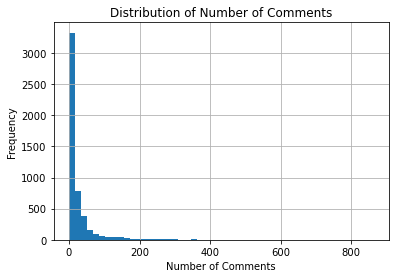

In [7]:
import matplotlib.pyplot as plt

# 绘制数值列（例如：评论数）的直方图
df['num_comments'].hist(bins=50)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


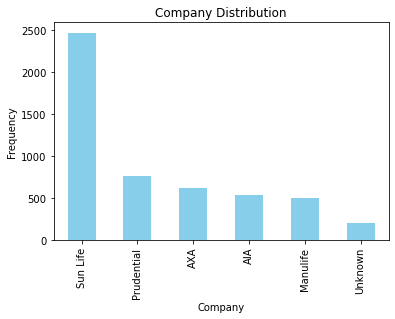

In [8]:
# 绘制公司分布的条形图
df['company'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Company Distribution')
plt.xlabel('Company')
plt.ylabel('Frequency')
plt.show()

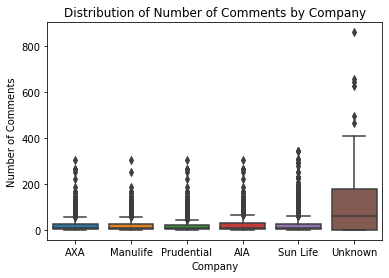

In [9]:
import seaborn as sns

# 绘制箱线图，查看不同公司评论数的分布
sns.boxplot(x='company', y='num_comments', data=df)
plt.title('Distribution of Number of Comments by Company')
plt.xlabel('Company')
plt.ylabel('Number of Comments')
plt.show()

In [10]:
df.head(5)

,subreddit,company,title,url,score,num_comments,created_utc,content,comments
0,insurance,AXA,AXA INSURANCE IS UNETHICAL,https://www.reddit.com/r/Insurance/comments/lf...,0,10,2021-02-08 16:28:45,AXA INSURANCE IS UNETHICAL AND CONDUCT DISGUST...,"[{'author': 'Toltec123', 'body': 'So should we..."
1,insurance,AXA,Travel Insurance Denied My Claim After Ski Acc...,https://www.reddit.com/r/Insurance/comments/1i...,0,5,2025-01-24 14:23:03,"Hi Reddit,\n\nI’m hoping to get some advice ab...","[{'author': 'Dry_Winter7073', 'body': 'As per ..."
2,insurance,AXA,Travel Insurance recommendations UK,https://www.reddit.com/r/Insurance/comments/1i...,0,0,2025-02-20 10:13:04,"Hi -- we're currently waiting (and waiting, an...",[]
3,insurance,AXA,UK dental insurance,https://www.reddit.com/r/Insurance/comments/1g...,1,0,2024-11-25 23:10:41,"Looking for a UK dental insurance plan, curren...",[]
4,insurance,AXA,Widowed persons higher home premium?,https://www.reddit.com/r/Insurance/comments/1g...,0,3,2024-10-24 09:34:18,I went to get my buildings and contents insura...,"[{'author': 'bradbrla', 'body': 'For whatever ..."


# 数据清理

In [11]:
# 删除"deleted"或"removed"的无效帖子
df = df[~df['content'].str.contains("deleted|removed", na=False)]
df = df[~df['title'].str.contains("deleted|removed", na=False)]

# 填充缺失的 `content` 列（如果为空，则用 `title` 代替）
df['content'] = df['content'].fillna(df['title'])

# 删除过短的文本（少于 10 个字符的帖子）
df = df[df['content'].str.len() > 10]

# 处理评论数据，展开为单独的 DataFrame（用于后续情感分析）
comments_data = []
for _, row in df.iterrows():
    for comment in row['comments']:
        comments_data.append({
            "company": row['company'],
            "subreddit": row['subreddit'],
            "post_title": row['title'],
            "comment_text": comment['body'],
            "comment_score": comment['score']
        })

df_comments = pd.DataFrame(comments_data)

# 保存清理后的数据
df.to_json("cleaned_reddit_insurance_reviews.json", orient="records", indent=4)
df_comments.to_json("cleaned_reddit_comments.json", orient="records", indent=4)

print(f"✅ 清理完成，剩余帖子数：{len(df)}")
print(f"✅ 清理完成，剩余评论数：{len(df_comments)}")


✅ 清理完成，剩余帖子数：4892
✅ 清理完成，剩余评论数：120691


# 文本清理

In [12]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 下载 NLTK 需要的词库
nltk.download('stopwords')
nltk.download('wordnet')

# 初始化词形还原工具 & 停用词
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """ 处理文本：转换小写、去除特殊字符、去停用词、词形还原 """
    if pd.isna(text) or not isinstance(text, str):  # 处理 NaN 和非字符串值
        return ""
    
    text = text.lower()  # 转换为小写
    text = re.sub(r'\W+', ' ', text)  # 移除非字母数字字符
    words = text.split()
    words = [word for word in words if word not in stop_words]  # 去除停用词
    words = [lemmatizer.lemmatize(word) for word in words]  # 词形还原
    return " ".join(words)

# 读取清理后的 Reddit 数据
df = pd.read_json("cleaned_reddit_insurance_reviews.json")
df_comments = pd.read_json("cleaned_reddit_comments.json")

# 处理帖子文本
df['cleaned_content'] = df['content'].apply(clean_text)
# 处理评论文本
df_comments['cleaned_comment'] = df_comments['comment_text'].apply(clean_text)

# **删除清理后为空的帖子**
df = df[df['cleaned_content'].str.strip() != ""]
df_comments = df_comments[df_comments['cleaned_comment'].str.strip() != ""]

# **删除清理后过短的文本**
df = df[df['cleaned_content'].str.len() > 10]  # 过滤掉过短的帖子
df_comments = df_comments[df_comments['cleaned_comment'].str.len() > 5]  # 过滤掉过短的评论

# 保存清理后的数据
df.to_json("processed_reddit_insurance_reviews.json", orient="records", indent=4)
df_comments.to_json("processed_reddit_comments.json", orient="records", indent=4)

# 打印最终剩余的数据量
print(f"✅ 文本预处理完成，最终剩余帖子数：{len(df)}")
print(f"✅ 文本预处理完成，最终剩余评论数：{len(df_comments)}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ 文本预处理完成，最终剩余帖子数：4890
✅ 文本预处理完成，最终剩余评论数：118488


# 情感分析

Textblob

In [5]:
from textblob import TextBlob
import pandas as pd

# 读取数据
df = pd.read_json("processed_reddit_insurance_reviews.json")
df_comments = pd.read_json("processed_reddit_comments.json")

# 计算 TextBlob 情感得分
df['textblob_sentiment'] = df['cleaned_content'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_comments['textblob_sentiment'] = df_comments['cleaned_comment'].apply(lambda text: TextBlob(text).sentiment.polarity)

# 计算每个公司的平均情感得分
sentiment_by_company = df.groupby('company')['textblob_sentiment'].mean()
sentiment_by_company_comments = df_comments.groupby('company')['textblob_sentiment'].mean()

print("📊 平均情感得分（TextBlob） - 帖子")
print(sentiment_by_company)

print("📊 平均情感得分（TextBlob） - 评论")
print(sentiment_by_company_comments)


📊 平均情感得分（TextBlob） - 帖子
company
AIA           0.078484
AXA           0.084163
Manulife      0.081438
Prudential    0.096888
Sun Life      0.091069
Unknown       0.098030
Name: textblob_sentiment, dtype: float64
📊 平均情感得分（TextBlob） - 评论
company
AIA           0.056988
AXA           0.058444
Manulife      0.056729
Prudential    0.069368
Sun Life      0.081101
Unknown       0.055805
Name: textblob_sentiment, dtype: float64


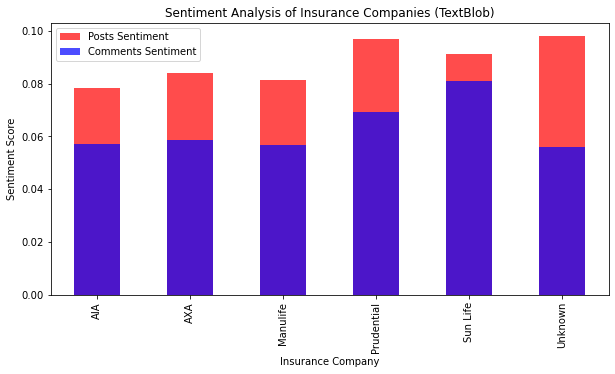

In [8]:
import matplotlib.pyplot as plt

# 计算平均情感得分
plt.figure(figsize=(10,5))
textblob_sentiment_by_company = sentiment_by_company
textblob_sentiment_by_company_comments = sentiment_by_company_comments

# 可视化情感得分
textblob_sentiment_by_company.plot(kind='bar', color='red', alpha=0.7, label="Posts Sentiment")
textblob_sentiment_by_company_comments.plot(kind='bar', color='blue', alpha=0.7, label="Comments Sentiment")

plt.xlabel("Insurance Company")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis of Insurance Companies (TextBlob)")
plt.legend()
plt.show()


Vader

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 计算 VADER 情感得分
df['vader_sentiment'] = df['cleaned_content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
df_comments['vader_sentiment'] = df_comments['cleaned_comment'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# 计算每个公司的平均情感得分
vader_sentiment_by_company = df.groupby('company')['vader_sentiment'].mean()
vader_sentiment_by_company_comments = df_comments.groupby('company')['vader_sentiment'].mean()

print("📊 平均情感得分（VADER） - 帖子")
print(vader_sentiment_by_company)

print("📊 平均情感得分（VADER） - 评论")
print(vader_sentiment_by_company_comments)


📊 平均情感得分（VADER） - 帖子
company
AIA           0.190521
AXA           0.260599
Manulife      0.252848
Prudential    0.325126
Sun Life      0.300185
Unknown       0.287333
Name: vader_sentiment, dtype: float64
📊 平均情感得分（VADER） - 评论
company
AIA           0.081232
AXA           0.082631
Manulife      0.076652
Prudential    0.117439
Sun Life      0.175369
Unknown       0.061420
Name: vader_sentiment, dtype: float64


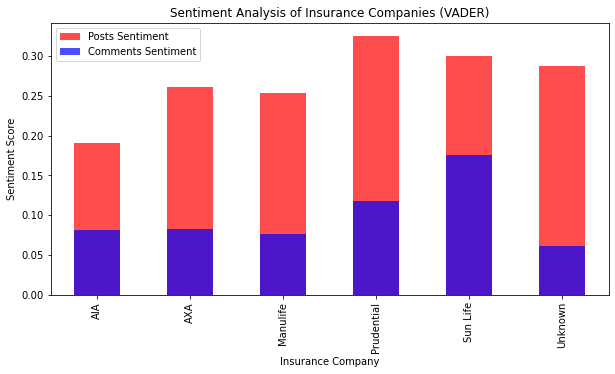

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
vader_sentiment_by_company.plot(kind='bar', color='red', alpha=0.7, label="Posts Sentiment")
vader_sentiment_by_company_comments.plot(kind='bar', color='blue', alpha=0.7, label="Comments Sentiment")

plt.xlabel("Insurance Company")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis of Insurance Companies (VADER)")
plt.legend()
plt.show()

逻辑回归

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 读取 Reddit 数据
df = pd.read_json("processed_reddit_insurance_reviews.json")

# 初始化 VADER
analyzer = SentimentIntensityAnalyzer()

# 计算 VADER 评分
df['vader_sentiment'] = df['cleaned_content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# **自动生成情感标签**
def get_sentiment_label(score):
    if score >= 0.3:
        return 1  # 正面
    elif score <= -0.3:
        return -1  # 负面
    else:
        return 0  # 中性

df['auto_label'] = df['vader_sentiment'].apply(get_sentiment_label)

# **TF-IDF 向量化**
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_content'])
y = df['auto_label']

# **划分训练集和测试集**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **训练 Logistic Regression 模型**
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# **评估模型**
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print("📊 Logistic Regression 评估:")
print(classification_report(y_test, y_pred))


📊 Logistic Regression 评估:
              precision    recall  f1-score   support

          -1       0.94      0.86      0.90       217
           0       0.98      0.40      0.57       108
           1       0.84      0.99      0.91       458

    accuracy                           0.87       783
   macro avg       0.92      0.75      0.79       783
weighted avg       0.89      0.87      0.86       783



In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 🔹 1. 读取数据
df = pd.read_json("processed_reddit_insurance_reviews.json")

# 🔹 2. 计算 VADER 评分并自动标注情感
analyzer = SentimentIntensityAnalyzer()
df['vader_sentiment'] = df['cleaned_content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

def get_sentiment_label(score):
    if score >= 0.3:
        return 1  # 正面
    elif score <= -0.3:
        return -1  # 负面
    else:
        return 0  # 中性

df['auto_label'] = df['vader_sentiment'].apply(get_sentiment_label)

# 🔹 3. 处理文本特征（TF-IDF）
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_content'])  # 变成词向量
y = df['auto_label']  # 使用 VADER 生成的标签

# 🔹 4. 划分训练集 & 测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 5. 训练随机森林分类器
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# 🔹 6. 评估模型
y_pred_rf = rf_model.predict(X_test)

print("📊 Random Forest 评估：")
print(classification_report(y_test, y_pred_rf))

# 🔹 7. 计算准确率
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"✅ Random Forest 准确率: {accuracy:.2f}")


📊 Random Forest 评估：
              precision    recall  f1-score   support

          -1       0.99      0.83      0.91       217
           0       1.00      0.63      0.77       108
           1       0.86      1.00      0.93       458

    accuracy                           0.90       783
   macro avg       0.95      0.82      0.87       783
weighted avg       0.92      0.90      0.90       783

✅ Random Forest 准确率: 0.90


In [10]:
# 重新编码标签，使其变为 [0, 1, 2] 而不是 [-1, 0, 1]
y_train_encoded = y_train.replace({-1: 0, 0: 1, 1: 2})
y_test_encoded = y_test.replace({-1: 0, 0: 1, 1: 2})

# 训练 XGBoost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# 预测
y_pred_xgb = xgb_model.predict(X_test)

# 还原类别（将 0 -> -1, 1 -> 0, 2 -> 1）
y_pred_xgb = pd.Series(y_pred_xgb).replace({0: -1, 1: 0, 2: 1})

# 评估模型
from sklearn.metrics import classification_report
print("📊 XGBoost 评估：")
print(classification_report(y_test, y_pred_xgb))


📊 XGBoost 评估：
              precision    recall  f1-score   support

          -1       0.90      0.90      0.90       217
           0       0.91      0.68      0.78       108
           1       0.91      0.97      0.94       458

    accuracy                           0.91       783
   macro avg       0.91      0.85      0.87       783
weighted avg       0.91      0.91      0.90       783



In [13]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 9.7/9.7 MB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 204.1/204.1 MB 7.0 MB/s eta 0:00:00
   ---------------------------------------- 6.2/6.2 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 2.4/2.4 MB 5.9 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.10.1
    Uninstalling sympy-1.10.1:
      Successfully uninstalled sympy-1.10.1
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.2.0
    Uninstalling fsspec-2022.2.0:
      Successfully uninstalled fsspec-2022.2.0


In [16]:
pip uninstall keras

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tf-keras

In [14]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# 1. 加载预训练的BERT模型和Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)  # 3 labels: negative, neutral, positive

# 2. 读取并准备数据
df = pd.read_json("processed_reddit_insurance_reviews.json")
df['labels'] = df['vader_sentiment'].apply(lambda x: 1 if x > 0.3 else (0 if x == 0 else 2))  # Mapping sentiments to [0, 1, 2]

# 3. 数据预处理：BERT tokenizer
def encode_text(text):
    return tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")

# 4. 创建Dataset对象
class RedditDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoded_text = encode_text(self.texts[idx])
        return { 
            'input_ids': encoded_text['input_ids'].flatten(), 
            'attention_mask': encoded_text['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# 5. 分割数据集为训练集和验证集
train_texts, val_texts, train_labels, val_labels = train_test_split(df['cleaned_content'], df['labels'], test_size=0.2)

train_dataset = RedditDataset(train_texts, train_labels)
val_dataset = RedditDataset(val_texts, val_labels)

# 6. 设置训练参数
training_args = TrainingArguments(
    output_dir='./results',          # 输出目录
    num_train_epochs=3,              # 训练3个epoch
    per_device_train_batch_size=8,   # 每个设备的训练batch大小
    per_device_eval_batch_size=16,   # 每个设备的验证batch大小
    warmup_steps=500,                # 预热步数
    weight_decay=0.01,               # 权重衰减
    logging_dir='./logs',            # 日志目录
    logging_steps=10,
)

trainer = Trainer(
    model=model,                         # 模型
    args=training_args,                  # 训练参数
    train_dataset=train_dataset,         # 训练数据集
    eval_dataset=val_dataset,            # 验证数据集
    compute_metrics=lambda p: classification_report(p.predictions, p.label_ids, output_dict=True)
)

# 7. 开始训练
trainer.train()

# 8. 评估模型
results = trainer.evaluate()
print("✅ BERT 模型评估结果：")
print(results)


RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

# 主题建模

In [12]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 下载 NLTK 需要的词库
nltk.download('stopwords')
nltk.download('wordnet')

# 初始化停用词和词形还原工具
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# 需要移除的高频词（根据 LDA 结果观察到的无意义词）
high_freq_words = {"insurance", "company", "year", "month", "time","customer","said","know",
                   "http","com","linkedin","www"}

def clean_text(text):
    """ 处理文本：转换小写、去特殊字符、去停用词、去高频词、词形还原 """
    if pd.isna(text) or not isinstance(text, str):  # 处理 NaN 和非字符串值
        return ""
    
    text = text.lower()  # 转换为小写
    text = re.sub(r'\W+', ' ', text)  # 移除非字母数字字符
    words = text.split()
    words = [word for word in words if word not in stop_words]  # 去除停用词
    words = [word for word in words if word not in high_freq_words]  # 额外去除高频词
    words = [lemmatizer.lemmatize(word) for word in words]  # 词形还原
    return " ".join(words)

# 读取清理后的 Reddit 数据
df = pd.read_json("cleaned_reddit_insurance_reviews.json")
df_comments = pd.read_json("cleaned_reddit_comments.json")

# 处理帖子文本
df['cleaned_content'] = df['content'].apply(clean_text)
# 处理评论文本
df_comments['cleaned_comment'] = df_comments['comment_text'].apply(clean_text)

# **删除清理后为空的帖子**
df = df[df['cleaned_content'].str.strip() != ""]
df_comments = df_comments[df_comments['cleaned_comment'].str.strip() != ""]

# **删除清理后过短的文本**
df = df[df['cleaned_content'].str.len() > 10]  # 过滤掉过短的帖子
df_comments = df_comments[df_comments['cleaned_comment'].str.len() > 5]  # 过滤掉过短的评论

# 保存清理后的数据
df.to_json("processed_reddit_insurance_reviews.json", orient="records", indent=4)
df_comments.to_json("processed_reddit_comments.json", orient="records", indent=4)

# 打印最终剩余的数据量
print(f"✅ 文本预处理完成，最终剩余帖子数：{len(df)}")
print(f"✅ 文本预处理完成，最终剩余评论数：{len(df_comments)}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ 文本预处理完成，最终剩余帖子数：4890
✅ 文本预处理完成，最终剩余评论数：118305


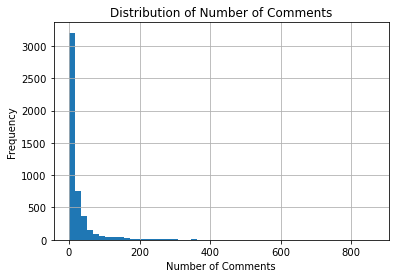

In [13]:
import matplotlib.pyplot as plt

# 绘制数值列（例如：评论数）的直方图
df['num_comments'].hist(bins=50)
plt.title('Distribution of Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.show()


In [14]:
pip install --upgrade pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


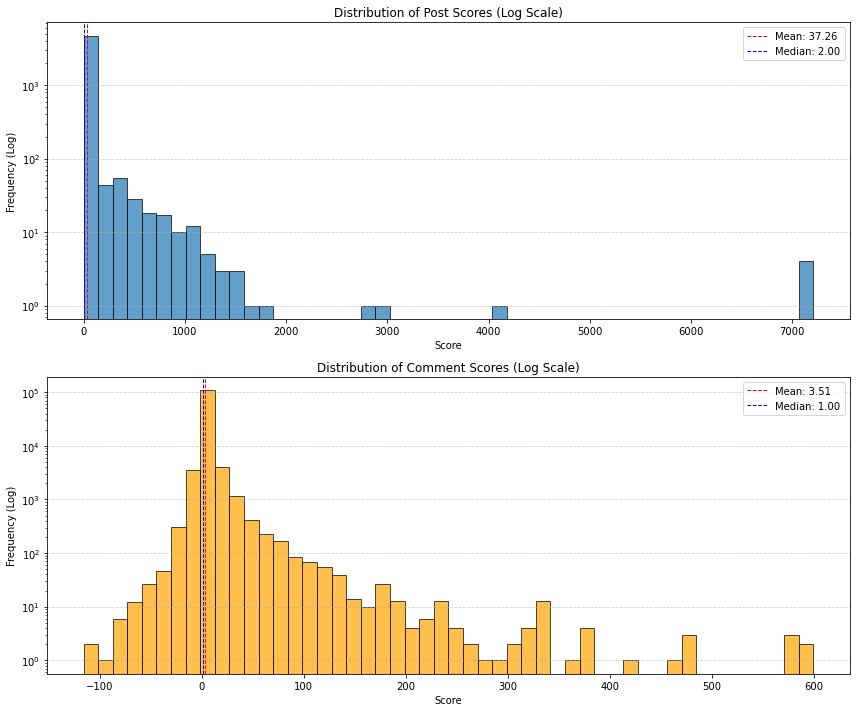

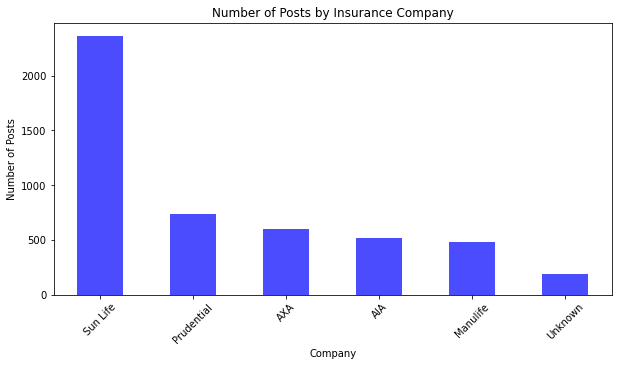

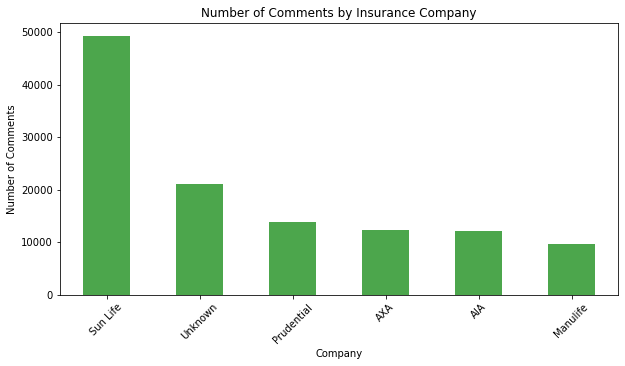

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 读取数据
df_reviews = pd.read_json("processed_reddit_insurance_reviews.json")
df_comments = pd.read_json("processed_reddit_comments.json")

# 清理数据
df_reviews['score'] = pd.to_numeric(df_reviews['score'], errors='coerce')
df_reviews = df_reviews.replace([np.inf, -np.inf], np.nan).dropna(subset=['score'])

df_comments['comment_score'] = pd.to_numeric(df_comments['comment_score'], errors='coerce')
df_comments = df_comments.replace([np.inf, -np.inf], np.nan).dropna(subset=['comment_score'])

# 设置画布
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# **1. 帖子得分分布（对数刻度）**
axes[0].hist(df_reviews['score'], bins=50, edgecolor='black', alpha=0.7, log=True)
axes[0].set_title("Distribution of Post Scores (Log Scale)")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frequency (Log)")
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# 标注均值、中位数
mean_score = np.mean(df_reviews['score'])
median_score = np.median(df_reviews['score'])
axes[0].axvline(mean_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_score:.2f}')
axes[0].axvline(median_score, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_score:.2f}')
axes[0].legend()

# **2. 评论得分分布（对数刻度）**
axes[1].hist(df_comments['comment_score'], bins=50, edgecolor='black', alpha=0.7, color='orange', log=True)
axes[1].set_title("Distribution of Comment Scores (Log Scale)")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Frequency (Log)")
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# 标注均值、中位数
mean_comment_score = np.mean(df_comments['comment_score'])
median_comment_score = np.median(df_comments['comment_score'])
axes[1].axvline(mean_comment_score, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_comment_score:.2f}')
axes[1].axvline(median_comment_score, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_comment_score:.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# **3. 保险公司帖子数量**
plt.figure(figsize=(10, 5))
df_reviews['company'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Number of Posts by Insurance Company")
plt.xlabel("Company")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

# **4. 保险公司评论数量**
plt.figure(figsize=(10, 5))
df_comments['company'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title("Number of Comments by Insurance Company")
plt.xlabel("Company")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.show()


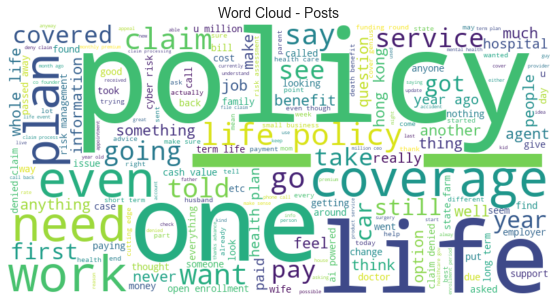

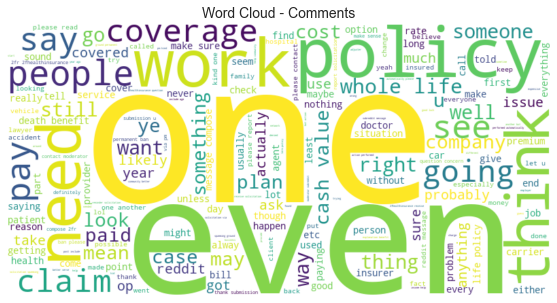

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# 读取数据
df_reviews = pd.read_json("processed_reddit_insurance_reviews.json")
df_comments = pd.read_json("processed_reddit_comments.json")

# 设置 Seaborn 风格
sns.set_style("whitegrid")

# ========================== 1. 词云 (Word Cloud) ==========================

def generate_wordcloud(texts, title):
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# 生成帖子内容和评论的词云
generate_wordcloud(df_reviews['cleaned_content'], "Word Cloud - Posts")
generate_wordcloud(df_comments['cleaned_comment'], "Word Cloud - Comments")




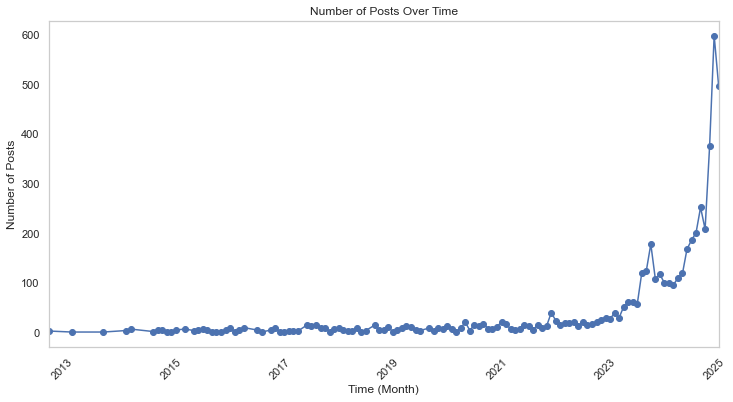

KeyError: 'vader_sentiment'

In [22]:
# ========================== 3. 时间趋势分析 ==========================

df_reviews['created_utc'] = pd.to_datetime(df_reviews['created_utc'])
df_reviews['month'] = df_reviews['created_utc'].dt.to_period('M')

df_time_series = df_reviews.groupby('month').size()

plt.figure(figsize=(12, 6))
df_time_series.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title("Number of Posts Over Time")
plt.xlabel("Time (Month)")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ========================== 4. 话题情感对比 ==========================

df_reviews['vader_sentiment'] = df_reviews['vader_sentiment'].astype(float)
df_sentiment_by_topic = df_reviews.groupby("dominant_topic")["vader_sentiment"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_sentiment_by_topic.index, y=df_sentiment_by_topic.values, palette="coolwarm")
plt.xlabel("Topic")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment by Topic")
plt.show()

# ========================== 5. 保险公司情感对比 ==========================

df_sentiment_by_company = df_reviews.groupby("company")["vader_sentiment"].mean()

plt.figure(figsize=(12, 5))
sns.barplot(x=df_sentiment_by_company.index, y=df_sentiment_by_company.values, palette="viridis")
plt.xlabel("Insurance Company")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment by Insurance Company")
plt.xticks(rotation=45)
plt.show()

# ========================== 6. 评论情绪分布 ==========================

plt.figure(figsize=(10, 5))
sns.histplot(df_comments['vader_sentiment'], bins=30, kde=True, color="orange")
plt.title("Distribution of Comment Sentiments")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



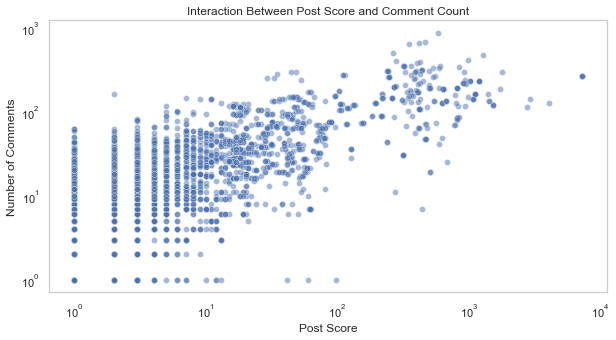

KeyError: 'author'

In [23]:
# ========================== 7. 交互模式分析 ==========================

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reviews['score'], y=df_reviews['num_comments'], alpha=0.5)
plt.xlabel("Post Score")
plt.ylabel("Number of Comments")
plt.title("Interaction Between Post Score and Comment Count")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.show()

# ========================== 8. 用户活跃度分析 ==========================

top_users = df_comments['author'].value_counts().head(20)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")
plt.xlabel("User")
plt.ylabel("Number of Comments")
plt.title("Top 20 Most Active Users in Comments")
plt.xticks(rotation=90)
plt.show()




In [24]:
# ========================== 9. 负面反馈案例分析 ==========================

negative_comments = df_comments[df_comments['vader_sentiment'] < -0.5].sort_values(by='vader_sentiment').head(10)
print("Top 10 Most Negative Comments:")
print(negative_comments[['comment_text', 'vader_sentiment']])

import ace_tools as tools

# 显示 DataFrame
tools.display_dataframe_to_user(name="Top Negative Comments", dataframe=negative_comments[['comment_text', 'vader_sentiment']])

KeyError: 'vader_sentiment'

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 重新读取清理后的数据
df = pd.read_json("processed_reddit_insurance_reviews.json")

# 创建 CountVectorizer 并添加自定义停用词
vectorizer = CountVectorizer(
    max_df=0.95, 
    min_df=2, 
    stop_words=list(high_freq_words)  # 传入高频词作为停用词
)

# 生成词频矩阵
X = vectorizer.fit_transform(df['cleaned_content'])

# 训练 LDA
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# 获取词汇表
vocab = vectorizer.get_feature_names_out()

# 打印主题关键词
def print_topics(model, vectorizer, n_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

print_topics(lda, vectorizer)


Topic 1:
get would plan claim like coverage call life one agent
Topic 2:
cyber risk ai claim data business technology process solution insurer
Topic 3:
life policy plan health would get claim pay term premium
Topic 4:
policy life claim car would get back damage day like
Topic 5:
market business industry solution product technology service platform partnership global


In [19]:
from sklearn.decomposition import NMF

# 使用 NMF 进行主题建模
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(X)

# 打印每个主题的关键词
print_topics(nmf, vectorizer)


Topic 1:
ai claim platform ceo risk technology process solution insurtech data
Topic 2:
plan health state coverage income pay care medicaid enrollment service
Topic 3:
startup business innovation industry solution challenge zurich technology collaboration global
Topic 4:
cyber risk business policy insurer technology attack security data also
Topic 5:
policy get life claim would like one back call even


In [20]:
from sklearn.decomposition import TruncatedSVD

# 使用 LSA (SVD) 进行主题建模
lsa = TruncatedSVD(n_components=num_topics, random_state=42)
lsa.fit(X)

# 打印每个主题的关键词
print_topics(lsa, vectorizer)


Topic 1:
plan cyber ai risk business health claim coverage technology also
Topic 2:
plan health pay state income care premium coverage deductible enrollment
Topic 3:
cyber ai risk plan coverage insurer ceo platform health powered
Topic 4:
cyber policy risk attack get say security would back breach
Topic 5:
claim policy life get would ai told call got car


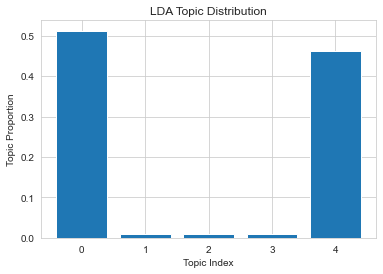

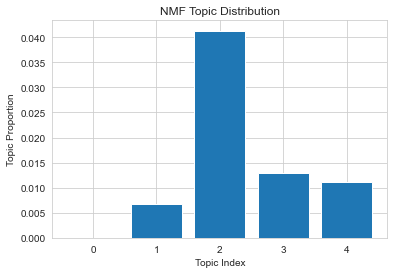

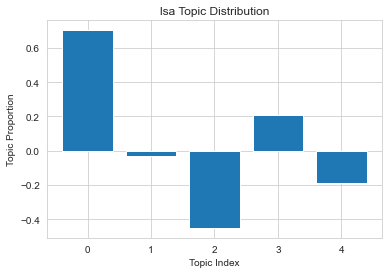

In [21]:
import matplotlib.pyplot as plt

# 绘制 LDA 主题分布
topic_distribution_lda = lda.transform(X)
plt.bar(range(len(topic_distribution_lda[0])), topic_distribution_lda[0])
plt.title("LDA Topic Distribution")
plt.xlabel("Topic Index")
plt.ylabel("Topic Proportion")
plt.show()

# 绘制 NMF 主题分布
topic_distribution_nmf = nmf.transform(X)
plt.bar(range(len(topic_distribution_nmf[0])), topic_distribution_nmf[0])
plt.title("NMF Topic Distribution")
plt.xlabel("Topic Index")
plt.ylabel("Topic Proportion")
plt.show()

# 绘制 LSA 主题分布
topic_distribution_lsa = lsa.transform(X)
plt.bar(range(len(topic_distribution_lsa[0])), topic_distribution_lsa[0])
plt.title("lsa Topic Distribution")
plt.xlabel("Topic Index")
plt.ylabel("Topic Proportion")
plt.show()


In [22]:
lda_perplexity = lda.perplexity(X)
print(f"LDA Perplexity: {lda_perplexity}")
nmf_reconstruction_error = nmf.reconstruction_err_
print(f"NMF Reconstruction Error: {nmf_reconstruction_error}")
# LSA 的重构误差，直接从模型中获取
# 计算重构数据：从 LSA 模型得到的 SVD 部分，重构原始数据
reconstructed_X = lsa.components_.T.dot(lsa.transform(X).T).T

# 计算重构误差：原始数据与重构数据之间的差异
lsa_reconstruction_error = np.linalg.norm(X - reconstructed_X, 'fro')
print(f"LSA Reconstruction Error: {lsa_reconstruction_error}")

LDA Perplexity: 2048.5452190355477
NMF Reconstruction Error: 1175.515580345758
LSA Reconstruction Error: 1173.1521199666745


结合情感分析与主题建模

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 创建 VADER 情感分析器
analyzer = SentimentIntensityAnalyzer()

# 假设 df['cleaned_content'] 是清洗后的评论文本
df['sentiment_score'] = df['cleaned_content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])


In [22]:
# 假设 df['dominant_topic'] 是每个评论的主要主题
# 将情感得分与主题对应起来
topic_sentiment = df.groupby('dominant_topic')['sentiment_score'].mean()

# 打印每个主题的情感得分
print("各个主题的平均情感得分：")
print(topic_sentiment)


各个主题的平均情感得分：
dominant_topic
0    0.869726
1    0.414809
2    0.184640
3    0.281770
4    0.497324
Name: sentiment_score, dtype: float64


D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39064 (\N{CJK UNIFIED IDEOGRAPH-9898}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda3\lib\site-packages\IPython\core\pylabt

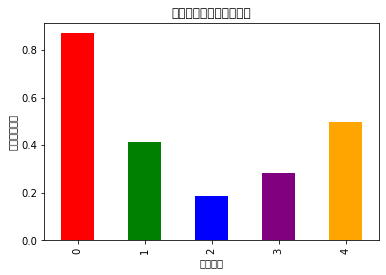

In [23]:
import matplotlib.pyplot as plt

# 绘制每个主题的情感分布
topic_sentiment.plot(kind='bar', color=['red', 'green', 'blue', 'purple', 'orange'])

plt.title("各个主题的平均情感得分")
plt.xlabel("主题编号")
plt.ylabel("平均情感得分")
plt.show()


In [54]:
pip install --upgrade pyLDAvis


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
pip install --upgrade pip

   ---------------------------------------- 1.8/1.8 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [59]:
import pyLDAvis
import pyLDAvis.lda_model  # 使用 `lda_model` 适配 sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 假设 results 是你从 Reddit 获取的数据
# 示例数据结构:
# results = [{'content': 'post content', 'comments': [{'body': 'comment 1'}, {'body': 'comment 2'}]}]

# 获取所有评论的文本
comments_text = [post['content'] for post in results]
for post in results:
    for comment in post['comments']:
        comments_text.append(comment['body'])

# 使用 CountVectorizer（LDA 适用于词频数据）
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(comments_text)

# 设置 LDA 主题数
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# 提取文档-主题分布
doc_topic_dist = lda.transform(X)

# 获取词汇表
vocab = vectorizer.get_feature_names_out()

# 计算 term_frequency（单词在所有文档中的出现频次）
term_frequency = np.array(X.sum(axis=0)).flatten()

# 计算文档长度（每篇文章的单词数）
doc_lengths = [len(doc.split()) for doc in comments_text]

# 归一化主题-词分布
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

# 使用 pyLDAvis 进行可视化
vis_data = pyLDAvis.prepare(
    topic_term_dists=topic_term_dists,  # 主题-词分布
    doc_topic_dists=doc_topic_dist,  # 文档-主题分布
    doc_lengths=doc_lengths,  # 每个文档的长度
    vocab=vocab,  # 词汇表
    term_frequency=term_frequency  # 词频
)

# 显示 pyLDAvis 可视化
pyLDAvis.display(vis_data)

# 打印每个主题的关键词
def print_topics(model, vectorizer, n_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]))

print_topics(lda, vectorizer)


Topic 1:
policy insurance life company pay benefit like death agent year
Topic 2:
insurance company coverage claim customer health business http insurer service
Topic 3:
http state insurance question thank post answer lead know help
Topic 4:
life insurance year policy term cash money value pay premium
Topic 5:
people insurance know like doctor need care thing make said


In [60]:
import pandas as pd

# 获取文档-主题分布
doc_topic_dist = lda.transform(X)

# 找出每个文档的主导主题
dominant_topics = doc_topic_dist.argmax(axis=1)

# 统计每个主题的文档数量
topic_counts = pd.Series(dominant_topics).value_counts().sort_index()

print("每个主题的文档数量分布：")
print(topic_counts)


每个主题的文档数量分布：
0    2416
1     770
2     625
3    2253
4    1859
Name: count, dtype: int64


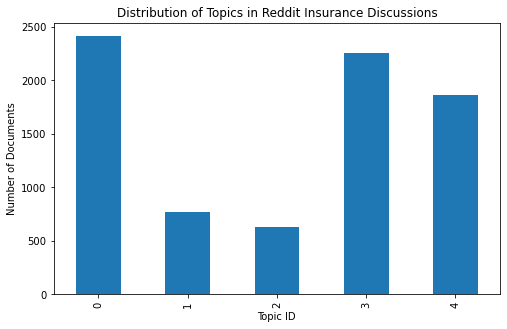

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
topic_counts.plot(kind='bar')
plt.xlabel("Topic ID")
plt.ylabel("Number of Documents")
plt.title("Distribution of Topics in Reddit Insurance Discussions")
plt.show()


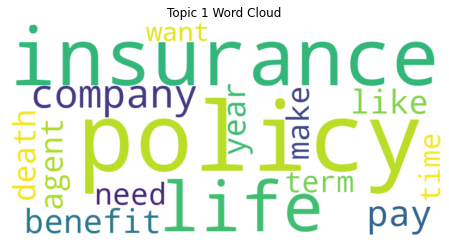

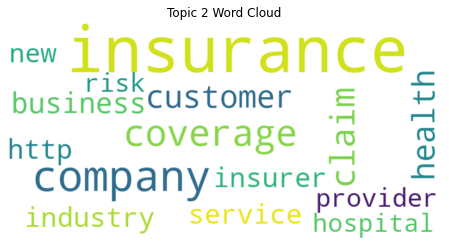

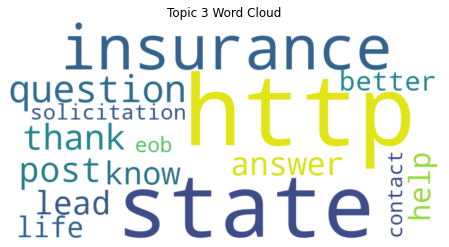

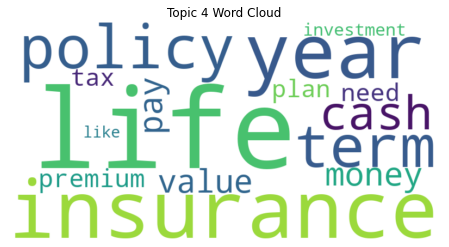

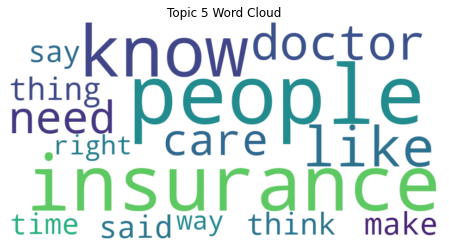

In [62]:
from wordcloud import WordCloud

# 生成每个主题的词云
for topic_idx, topic in enumerate(lda.components_):
    word_freq = {vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-15 - 1:-1]}  # 选前15个关键词
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1} Word Cloud")
    plt.show()


In [63]:
# 获取每个主题最相关的文档（得分最高的文档）
for topic_idx in range(num_topics):
    top_doc_idx = doc_topic_dist[:, topic_idx].argmax()  # 找到得分最高的文档
    print(f"Topic {topic_idx + 1} Representative Document:\n")
    print(comments_text[top_doc_idx])
    print("-" * 80)


Topic 1 Representative Document:

work death claim department life insurance company say aunt made claim got letter week later correspondence way sooner week likely claim number valid claim made call claim department send email tell insurance agent etc made claim would need formal denial letter explaining reason denial denial incredibly rare claim made valid policy also industry 10 year never heard word canceled used describe policy policy canceled usually referred specific word like expired term policy reached term surrendered policy policy owner cashed lapsed policy terminated due nonpayment premium reason think policy would suddenly canceled warning would term policy simply reached end every instance required correspondence company order stay legal compliance possible term policy weird coincidence coverage ended day died say got refund everything paid day death person dy premium due make lot sense extra payment sent back call standard premium refund insanely common people automatic 

In [67]:
print(results[0])  # 先检查数据结构


{'subreddit': 'insurance', 'company': 'AXA', 'title': 'AXA INSURANCE IS UNETHICAL', 'url': 'https://www.reddit.com/r/Insurance/comments/lffhi2/axa_insurance_is_unethical/', 'score': 0, 'num_comments': 10, 'created_utc': 1612801725.0, 'content': 'axa insurance unethical conduct disgusting business business warning future clientes choose another insurance company care wellbeing people cheat use position take advantage every possibile situation warned x200b axa insurace unethical', 'comments': [{'author': 'Toltec123', 'body': 'take word happened', 'score': 14, 'sentiment': 0.0}, {'author': 'Appygirl58', 'body': 'really fair state without context perhaps screw see situation allll time someone thought company acting illegally unethically fact op simply understand coverage bottom line giving limited one sided statement info one really know truth', 'score': 12, 'sentiment': 0.7156}, {'author': '[deleted]', 'body': 'nope either violated policy tried commit fraud got caught prove wrong', 'score

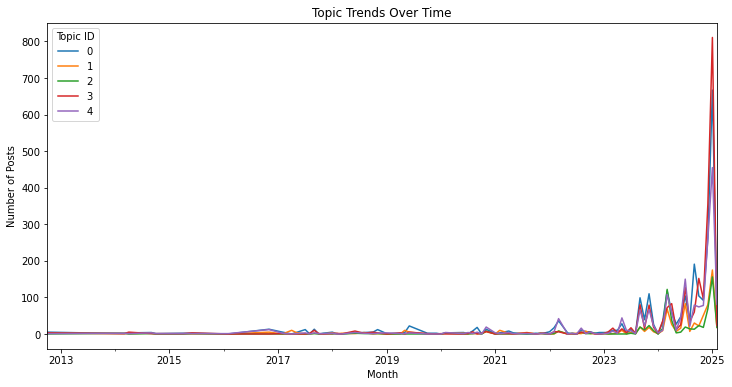

In [69]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# **提取时间戳**
timestamps = []
for post in results:
    if 'created_utc' in post:
        post_time = datetime.datetime.fromtimestamp(post['created_utc'])
        timestamps.append(post_time)  # 先添加帖子的时间
        for _ in post['comments']:  # 给每条评论也赋值帖子的时间
            timestamps.append(post_time)

# **确保 timestamps 和 dominant_topics 长度一致**
assert len(timestamps) == len(dominant_topics), f"Mismatch: {len(timestamps)} timestamps vs {len(dominant_topics)} topics"

# **创建 DataFrame**
df = pd.DataFrame({'timestamp': timestamps, 'dominant_topic': dominant_topics})

# **转换时间格式**
df['month'] = df['timestamp'].dt.to_period('M')

# **统计每个主题的时间趋势**
topic_trends = df.groupby(['month', 'dominant_topic']).size().unstack().fillna(0)

# **绘制折线图**
topic_trends.plot(figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Topic Trends Over Time")
plt.legend(title="Topic ID")
plt.show()


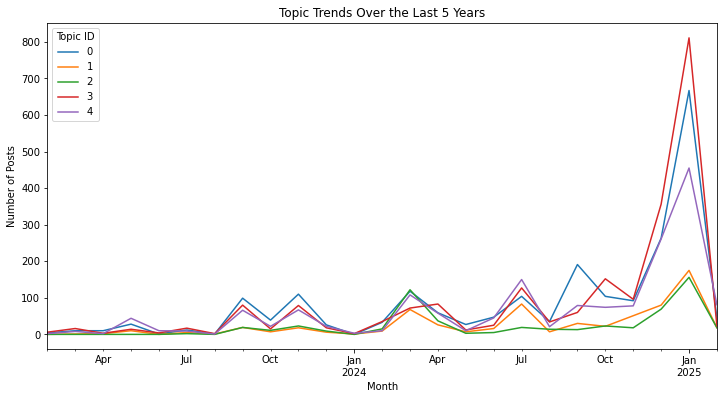

In [72]:
from datetime import datetime, timedelta

# **计算最近 5 年的起始时间**
cutoff_date = datetime.now() - timedelta(days=2*365)

# **筛选数据**
df_recent = df[df['timestamp'] >= cutoff_date]

# **统计每个主题的时间趋势**
topic_trends_recent = df_recent.groupby(['month', 'dominant_topic']).size().unstack().fillna(0)

# **绘制折线图**
topic_trends_recent.plot(figsize=(12, 6))
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Topic Trends Over the Last 5 Years")
plt.legend(title="Topic ID")
plt.show()


In [73]:
pip install textblob

   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


In [74]:
from textblob import TextBlob

# 计算每个帖子的情感得分
sentiments = [TextBlob(text).sentiment.polarity for text in comments_text]

# 创建 DataFrame
df['sentiment'] = sentiments

# 计算每个主题的平均情感得分
sentiment_by_topic = df.groupby('dominant_topic')['sentiment'].mean()

print("各主题的平均情感得分：")
print(sentiment_by_topic)


各主题的平均情感得分：
dominant_topic
0    0.083500
1    0.047532
2    0.141123
3    0.111390
4    0.087152
Name: sentiment, dtype: float64


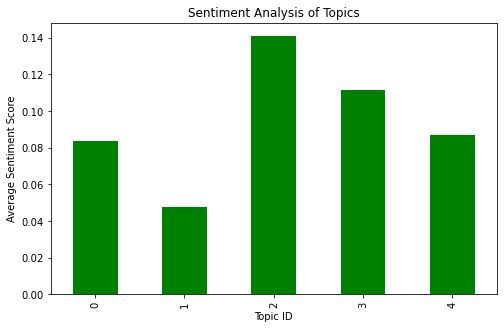

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sentiment_by_topic.plot(kind='bar', color=['red' if x < 0 else 'green' for x in sentiment_by_topic])
plt.xlabel("Topic ID")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Analysis of Topics")
plt.show()


各保险公司的平均情感得分：
company
AIA           0.110965
AXA           0.087489
Manulife      0.101939
Prudential    0.125911
Sun Life      0.089778
Name: sentiment, dtype: float64


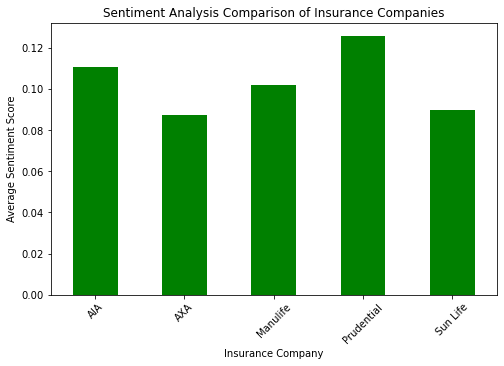

In [77]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# **计算每个文本（帖子+评论）的情感得分**
sentiments = [TextBlob(text).sentiment.polarity if text.strip() else 0 for text in comments_text]

# **创建 DataFrame**
df = pd.DataFrame({'sentiment': sentiments})

# **确保 `company` 对应每个帖子和评论**
company_list = []
for post in results:
    post_company = post['company']  # 该帖子的保险公司
    company_list.append(post_company)  # 先添加帖子的公司
    for _ in post['comments']:  # 每个评论也对应该公司的帖子
        company_list.append(post_company)

# **检查长度是否匹配**
assert len(company_list) == len(comments_text), f"Mismatch: {len(company_list)} companies vs {len(comments_text)} comments_text"

# **添加 `company` 列**
df['company'] = company_list

# **计算每家保险公司的平均情感得分**
sentiment_by_company = df.groupby('company')['sentiment'].mean()

# **打印结果**
print("各保险公司的平均情感得分：")
print(sentiment_by_company)

# **可视化比较**
plt.figure(figsize=(8, 5))
sentiment_by_company.plot(kind='bar', color=['red' if x < 0 else 'green' for x in sentiment_by_company])
plt.xlabel("Insurance Company")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Analysis Comparison of Insurance Companies")
plt.xticks(rotation=45)
plt.show()


In [66]:
for topic_idx in range(num_topics):
    top_keywords = " ".join([vectorizer.get_feature_names_out()[i] for i in lda.components_[topic_idx].argsort()[:-10 - 1:-1]])
    print(f"Topic {topic_idx + 1}: {top_keywords}")
    print(f"Summary: This topic mainly discusses {top_keywords.split()[:3]}, including {top_keywords.split()[3:6]}.")
    print("-" * 80)


Topic 1: policy insurance life company pay benefit like death agent year
Summary: This topic mainly discusses ['policy', 'insurance', 'life'], including ['company', 'pay', 'benefit'].
--------------------------------------------------------------------------------
Topic 2: insurance company coverage claim customer health business http insurer service
Summary: This topic mainly discusses ['insurance', 'company', 'coverage'], including ['claim', 'customer', 'health'].
--------------------------------------------------------------------------------
Topic 3: http state insurance question thank post answer lead know help
Summary: This topic mainly discusses ['http', 'state', 'insurance'], including ['question', 'thank', 'post'].
--------------------------------------------------------------------------------
Topic 4: life insurance year policy term cash money value pay premium
Summary: This topic mainly discusses ['life', 'insurance', 'year'], including ['policy', 'term', 'cash'].
---------

# LDA深入分析话题

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **1. 重新构建 df，确保包含 `text`（帖子+评论）**
df = pd.DataFrame(results)

# **2. 处理帖子文本**
df['text'] = df.get('content', df.get('selftext', df.get('title', '')))

# **3. 结合评论文本**
df['text'] = df['text'] + " " + df['comments'].apply(lambda x: " ".join([c['body'] for c in x if 'body' in c]))

# **4. 确保数据格式正确**
print("📌 确保 `df` 结构正确：", df.columns)
print(df[['company', 'text']].head())

# **5. 运行 LDA 主题建模**
company_topics = {}
num_topics = 5  # 设定每个公司提取的主题数

for company in df['company'].unique():
    print(f"\n📌 处理 {company} 的 LDA 主题建模...")

    # **筛选该公司的所有文本**
    company_texts = df[df['company'] == company]['text']

    if len(company_texts) < 10:  
        print(f"⚠️ {company} 只有 {len(company_texts)} 篇帖子，数据可能不足！")
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    X = vectorizer.fit_transform(company_texts)

    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        topics.append(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

    company_topics[company] = topics
    print(f"✅ {company} 主要话题：")
    for i, topic in enumerate(topics):
        print(f"  - 主题 {i + 1}: {topic}")

# **6. 存储 LDA 结果**
df_topics = pd.DataFrame.from_dict(company_topics, orient='index', columns=[f"Topic {i+1}" for i in range(num_topics)])
print("\n📌 各保险公司的 LDA 主题建模结果：")
print(df_topics)

# **7. 可视化不同公司的热门话题**
for company in company_topics:
    text = " ".join(company_topics[company])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{company} - Topic WordCloud")
    plt.show()


NameError: name 'results' is not defined

In [80]:
print(df.columns)

Index(['sentiment', 'company'], dtype='object')
